Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import ticker

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('default')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title
plt.rcParams['xtick.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=3.5  # fontsize of the figure title
#plt.rcParams['xtick.major.width']=1  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title

#Grid
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5


from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.rcParams['legend.fontsize'] = 22

In [3]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","loans" ,"persloans", "agloans", "reloans", "ciloans"]]

Get x-axis labels

In [4]:
df_forLabels = df.sort_values(by=["year", "quarter"])
df_forLabels = df_forLabels[["year", "quarter"]]
df_forLabels = df_forLabels.drop_duplicates()
labels = []
for row in df_forLabels.itertuples():
    dictRow = row._asdict()
    labels.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))
ser_labels = pd.Series(labels)
ser_labels.index

RangeIndex(start=0, stop=152, step=1)

In [5]:
pivot = pd.pivot_table(df, index=["year", "quarter"], values=["loans","persloans", "agloans", "reloans", "ciloans"], aggfunc={"agloans": np.sum, "ciloans": np.sum, "loans": np.sum,"persloans": np.sum, "reloans": np.sum})
#fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,150,10))
years = [str(year) for year in range(1975, 2014)]
pivot
#ax.set_xticklabels(years, rotation=60)
#pivot.plot(ax=ax)
#print(type(pivot.loans))
#print(pivot.loans)
#ax.set_xticklabels(labels, rotation=60)
#ax.plot(pivot)

agloans       ciloans         loans     persloans       reloans
year   quarter                                                                    
1976.0 1.0      20441221.0  1.676811e+08  4.979078e+08  1.060998e+08  1.376262e+08
       2.0      22177608.0  1.702594e+08  5.121950e+08  1.105997e+08  1.423676e+08
       3.0      22891098.0  1.703788e+08  5.198481e+08  1.151447e+08  1.447915e+08
       4.0      23236481.0  1.780387e+08  5.413140e+08  1.185939e+08  1.501127e+08
1977.0 1.0      23679447.0  1.794227e+08  5.443855e+08  1.203665e+08  1.527350e+08
       2.0      25654452.0  1.847227e+08  5.691111e+08  1.282208e+08  1.606904e+08
       3.0      26282762.0  1.873944e+08  5.894286e+08  1.349610e+08  1.698303e+08
       4.0      25738061.0  1.963861e+08  6.174419e+08  1.409665e+08  1.776548e+08
1978.0 1.0      25430487.0  2.019310e+08  6.254696e+08  1.434821e+08  1.822649e+08
       2.0      27004808.0  2.114837e+08  6.609582e+08  1.540780e+08  1.920315e+08
       3.0      28061878.0  2.136983e+08  6.857319e+08  1.622529e+08  2.027878e+08
       4.0      28644625.0  3.084827e+08  8.594126e+08  1.718011e+08  2.169374e+08
1979.0 1.0      28568803.0  3.150647e+08  8.658298e+08  1.740961e+08  2.226560e+08
       2.0      30246358.0  3.295213e+08  9.064511e+08  1.827398e+08  2.320669e+08
       3.0      31278178.0  3.415252e+08  9.395805e+08  1.891959e+08  2.423246e+08
       4.0      31429442.0  3.507394e+08  9.652473e+08  1.926479e+08  2.488118e+08
1980.0 1.0      31034808.0  3.553541e+08  9.711778e+08  1.894684e+08  2.545423e+08
       2.0      31669404.0  3.623253e+08  9.781737e+08  1.849286e+08  2.572971e+08
       3.0      32273954.0  3.728004e+08  9.987059e+08  1.859509e+08  2.624784e+08
       4.0      32283570.0  3.908470e+08  1.036911e+09  1.874048e+08  2.686496e+08
1981.0 1.0      32044443.0  3.938253e+08  1.038640e+09  1.829522e+08  2.723027e+08
       2.0      33934357.0  4.109977e+08  1.075055e+09  1.858841e+08  2.786202e+08
       3.0      34323327.0  4.290762e+08  1.110798e+09  1.898194e+08  2.855352e+08
       4.0      33651773.0  4.545068e+08  1.152175e+09  1.928928e+08  2.910453e+08
1982.0 1.0      34033761.0  4.665138e+08  1.163195e+09  1.889862e+08  2.957412e+08
       2.0      36514798.0  4.827501e+08  1.195489e+09  1.920335e+08  3.004897e+08
       3.0      37684890.0  4.955164e+08  1.220066e+09  1.951931e+08  3.044615e+08
       4.0      36997694.0  5.039821e+08  1.244356e+09  1.990085e+08  3.075774e+08
1983.0 1.0      37188834.0  5.056254e+08  1.242586e+09  1.957102e+08  3.101873e+08
       2.0      39234165.0  5.060385e+08  1.264439e+09  2.027290e+08  3.174297e+08
       3.0      39933165.0  5.068143e+08  1.284405e+09  2.124443e+08  3.270850e+08
       4.0      39875743.0  5.242839e+08  1.333719e+09  2.242292e+08  3.355642e+08
1984.0 1.0      40137879.0  5.350201e+08  1.396263e+09  2.266319e+08  3.478052e+08
       2.0      42181327.0  5.531802e+08  1.448122e+09  2.402929e+08  3.613137e+08
       3.0      42364096.0  5.528023e+08  1.472445e+09  2.517678e+08  3.724462e+08
       4.0      40380789.0  5.650937e+08  1.525527e+09  2.663935e+08  3.845076e+08
1985.0 1.0      38968524.0  5.685899e+08  1.535034e+09  2.721029e+08  3.935735e+08
       2.0      40466401.0  5.707313e+08  1.569728e+09  2.845533e+08  4.063826e+08
       3.0      39706640.0  5.744284e+08  1.607008e+09  2.968358e+08  4.224016e+08
       4.0      36105573.0  5.772415e+08  1.645063e+09  3.078026e+08  4.368293e+08
1986.0 1.0      34344965.0  5.797833e+08  1.654673e+09  3.076195e+08  4.497043e+08
       2.0      34657179.0  5.807040e+08  1.683284e+09  3.166298e+08  4.652730e+08
       3.0      34180775.0  5.716879e+08  1.694978e+09  3.244406e+08  4.847837e+08
       4.0      31590237.0  6.002406e+08  1.766921e+09  3.338706e+08  5.132286e+08
1987.0 1.0      29198820.0  5.845011e+08  1.750331e+09  3.269705e+08  5.305105e+08
       2.0      30819014.0  5.821576e+08  1.778808e+09  3.311859e+08  5.546770e+08
       3.0      31040308.0  5.79652

Loan Distribution. Loan types plotted. Sum of loan types.

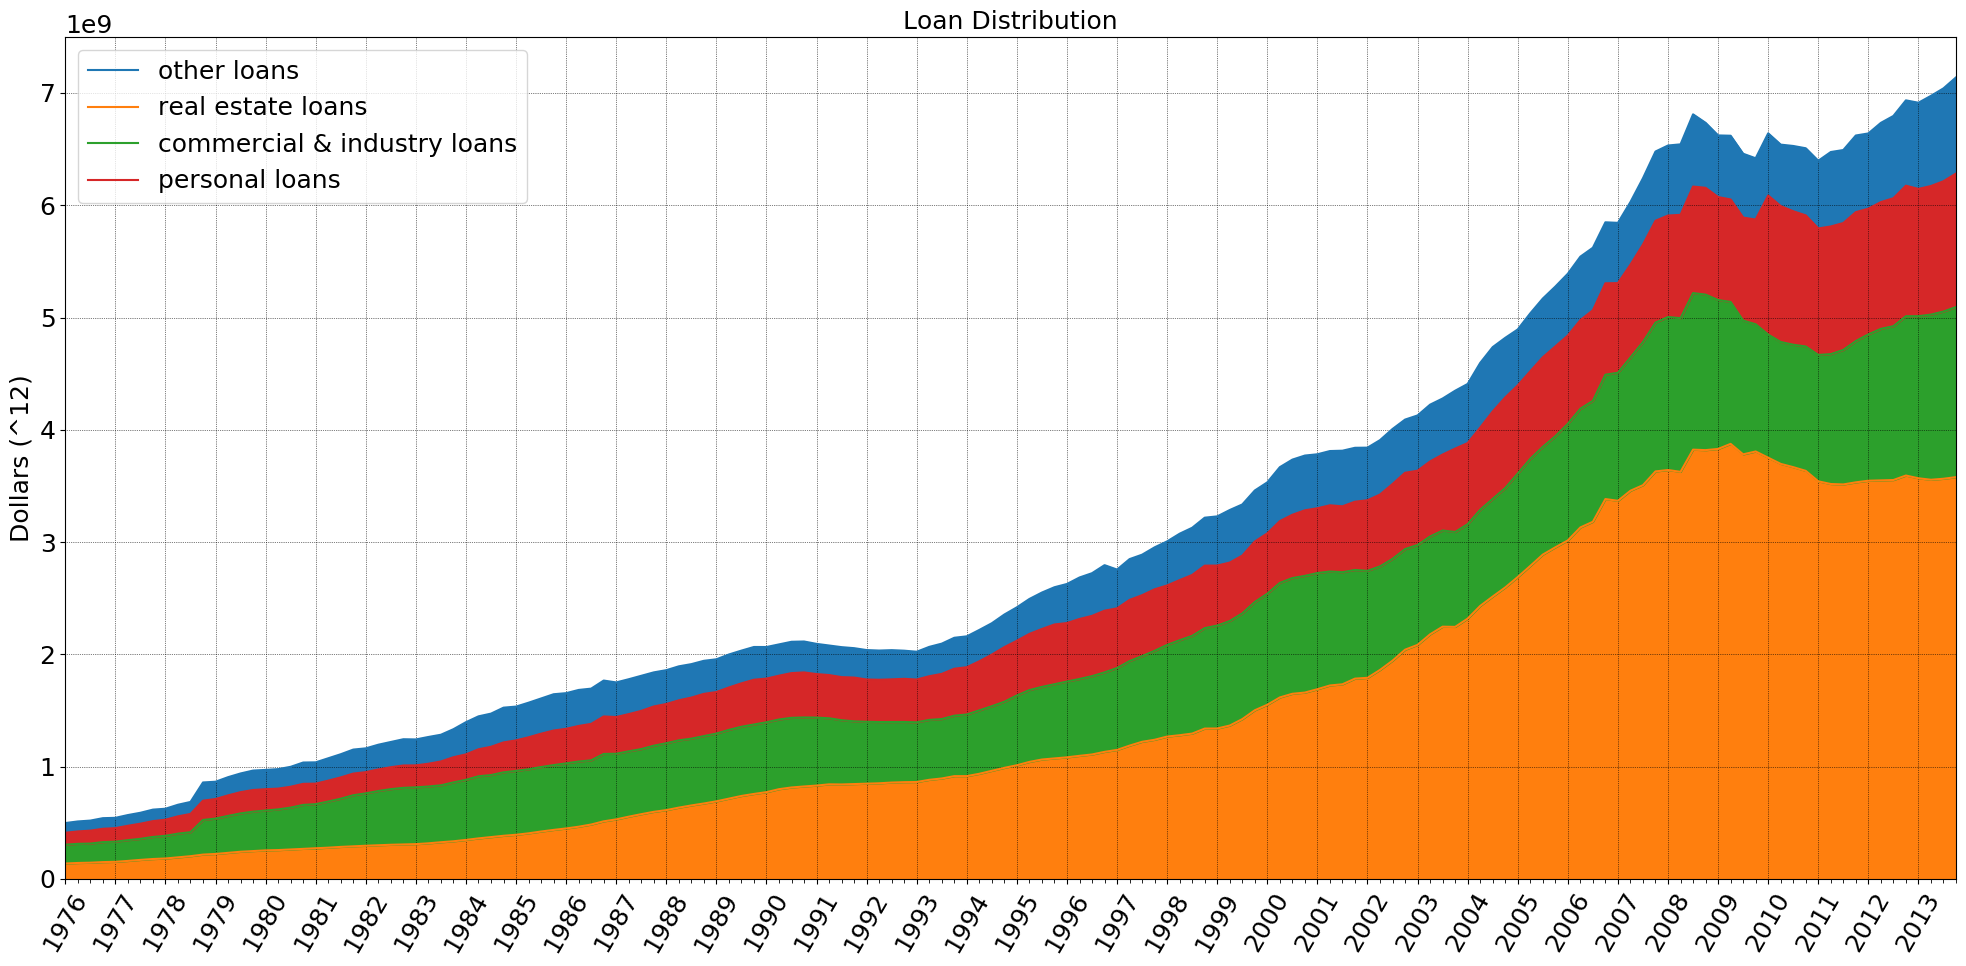

In [6]:
pivot_copy = pivot.copy()
pivot_copy = pivot.reset_index()
pivot_copy["re+ci"] = pivot_copy["reloans"] + pivot_copy["ciloans"]
pivot_copy["re+ci+pers"] = pivot_copy["re+ci"] + pivot_copy["persloans"]
#pivot_copy["re+ci+pers+ag"] = pivot_copy["re+ci+pers"] + pivot_copy["agloans"]
fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Loan Distribution")
pivot_copy.loans.plot.area(ax=ax)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
#pivot_copy.reloans.plot.area(ax=ax,stacked=True)
#pivot_copy["re+ci"].plot.area(ax=ax, stacked=True)
#pivot_copy["re+ci+pers"].plot(ax=ax)
#pivot_copy["re+ci+pers+ag"].plot(ax=ax)
pivot_copy.plot.area(ax=ax, y=["reloans", "ciloans", "persloans"])
ax.set_xticklabels(years, rotation=60)
ax.legend(["other loans", "real estate loans", "commercial & industry loans", "personal loans"])
ax.set_ylabel("Dollars (^12)")
ax.grid()
ax.set_xlim(0, 151)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LoanDistribution_7613')
#fig.("Loan Distribution")

Loans maturity analysis

In [7]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets","loans","persloans", "agloans", "reloans", "ciloans", "loansleases_less_3m", "loansleases_3m_1y","loansleases_1y_3y","loansleases_3y_5y","loansleases_5y_15y","loansleases_over_15y","resloans_less_3m","resloans_3m_1y","resloans_1y_3y",
"resloans_3y_5y","resloans_5y_15y"
,"resloans_over_15y"]]
df = df[df.year>=1997] #maturity data only available from 1997 onwards

#aggregate over year and quarter
df_agg_loans_maturity = df.groupby(["year", "quarter"]).sum()

df_agg_loans_maturity

rssdid        assets         loans     persloans     agloans       reloans       ciloans  loansleases_less_3m  loansleases_3m_1y  loansleases_1y_3y  loansleases_3y_5y  loansleases_5y_15y  loansleases_over_15y  resloans_less_3m  resloans_3m_1y  resloans_1y_3y  resloans_3y_5y  resloans_5y_15y  resloans_over_15y
year   quarter                                                                                                                                                                                                                                                                                                                              
1997.0 1.0      6.001297e+09  4.617155e+09  2.755303e+09  5.310003e+08  39325896.0  1.149223e+09  7.295488e+08         0.000000e+00                0.0                0.0                0.0                 0.0                   0.0               0.0             0.0             0.0             0.0              0.0                0.0
       2.0      6.004263e+09  4.746375e+09  2.848532e+09  5.445710e+08  43659925.0  1.187437e+09  7.531813e+08         1.309393e+09        436696609.0        421413346.0        284254405.0         254138981.0           120395966.0        63749439.0     154129577.0      76534708.0      48162492.0       94554175.0         81027260.0
       3.0      6.028993e+09  4.846712e+09  2.887924e+09  5.425045e+08  45020837.0  1.221494e+09  7.629102e+08         1.310262e+09        444884272.0        418314532.0        301474006.0         272004975.0           118465184.0        60073268.0     155012934.0      74827839.0      51871900.0      104935786.0         83923112.0
       4.0      6.088615e+09  4.989911e+09  2.953423e+09  5.475948e+08  44878118.0  1.239590e+09  7.923915e+08         1.337487e+09        449289931.0        428407685.0        305320964.0         287922326.0           122606691.0        62337471.0     153635990.0      75647510.0      52648073.0      107172157.0         87265757.0
1998.0 1.0      6.061302e+09  5.083924e+09  3.006531e+09  5.295050e+08  43051435.0  1.268103e+09  8.161768e+08         1.366148e+09        446701192.0        419516705.0        316309419.0         303037668.0           131923723.0        74396427.0     138093601.0      76041650.0      58993088.0      115881741.0         93833515.0
       2.0      6.135897e+09  5.156957e+09  3.074852e+09  5.355412e+08  47066668.0  1.280108e+09  8.460888e+08         1.382917e+09        456883689.0        416160373.0        330414386.0         323250761.0           142737321.0        72872843.0     127423110.0      73822119.0      61871482.0      123947638.0        100119335.0
       3.0      6.184073e+09  5.241902e+09  3.127678e+09  5.423046e+08  48201446.0  1.294690e+09  8.703045e+08         1.400375e+09        447880581.0        424644179.0        348073736.0         338043942.0           145400704.0        76198541.0     121877639.0      71784544.0      61338248.0      125237497.0        101367228.0
       4.0      6.218814e+09  5.412243e+09  3.217378e+09  5.565052e+08  46243093.0  1.339272e+09  8.943814e+08         1.424369e+09        462228195.0        425953062.0        354718916.0         355878249.0           170226390.0        83015410.0     113132063.0      68455122.0      59248412.0      133549617.0        125248561.0
1999.0 1.0      6.311133e+09  5.381566e+09  3.229028e+09  5.341217e+08  43947140.0  1.339915e+09  9.169769e+08         1.405083e+09        439089567.0        428044190.0        375959051.0         380272450.0           175535839.0        68870044.0     105438099.0      64832070.0      61231012.0      140121580.0        126838499.0
       2.0      6.400521e+09  5.437179e+09  3.285745e+09  5.204013e+08  46013790.0  1.366297e+09  9.308918e+08         1.427213e+09        434033233.0        431206727.0        389601737.0         391513074.0           187952355.0        65816803.0     101580612.0      63030745.0      65039161.0      146162805.0        133196813.0
       3.0      6.488877e+

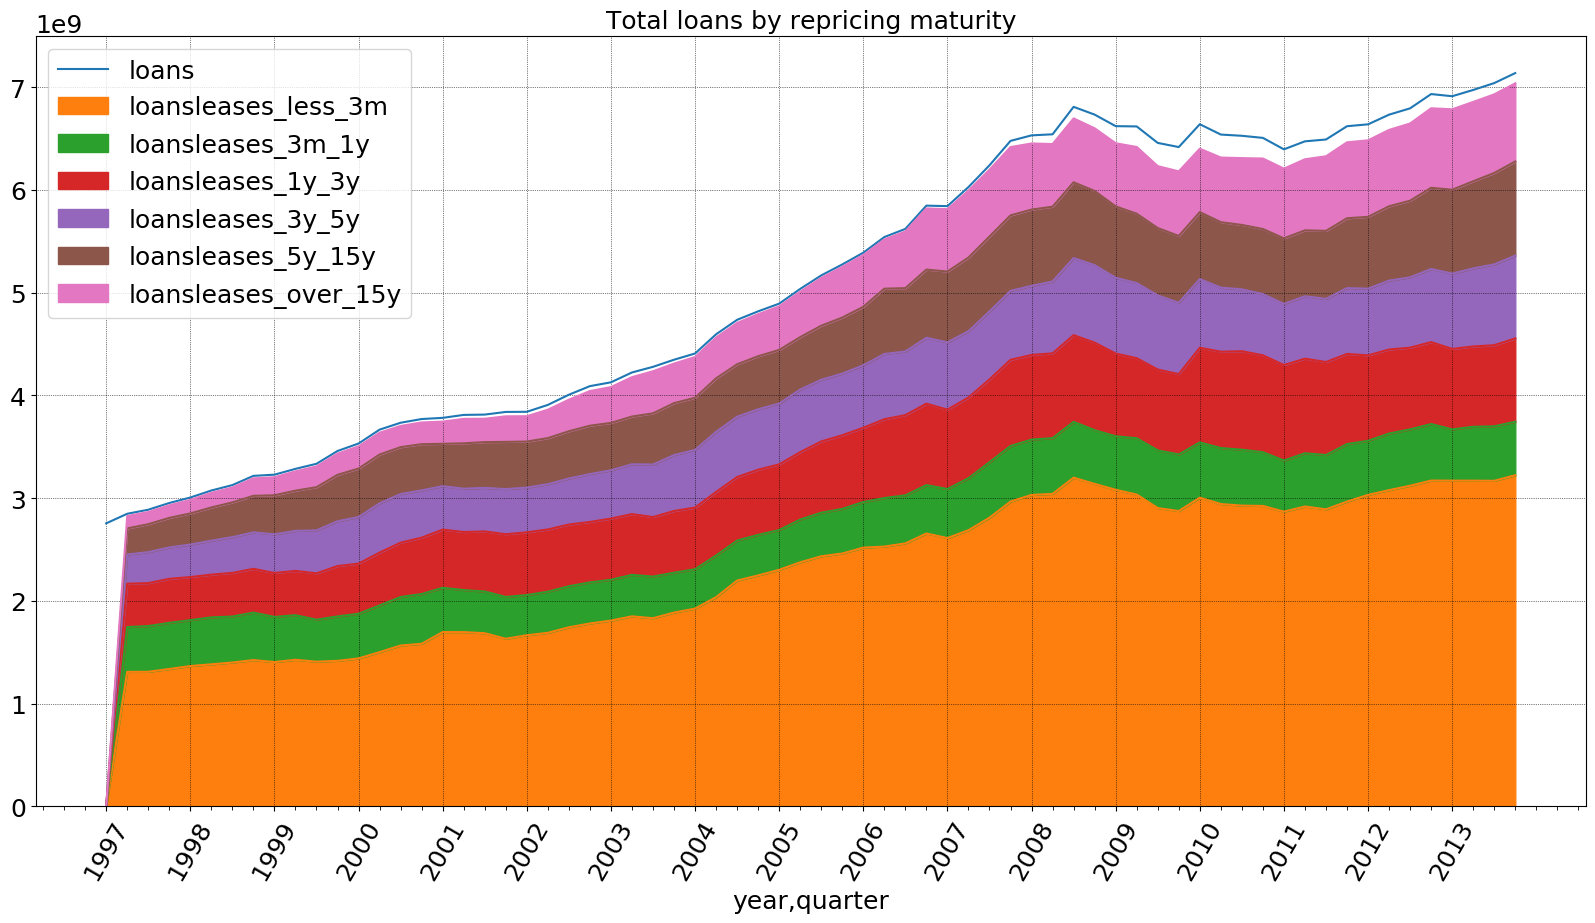

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,68,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
years = [str(year) for year in range(1997, 2014)]
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Total loans by repricing maturity")
#pivot2.plot(ax=ax2)
df_agg_loans_maturity.plot(ax=ax, y=["loans"])
df_agg_loans_maturity.plot.area(ax=ax, y=["loansleases_less_3m", "loansleases_3m_1y","loansleases_1y_3y","loansleases_3y_5y","loansleases_5y_15y","loansleases_over_15y"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid(True)

Share of loans by repricing maturity

In [9]:
df_agg_share_maturity = pd.DataFrame()

for (columnName, columnData) in df_agg_loans_maturity.iteritems():
    newcolumn = "share" + columnName
    df_agg_share_maturity[newcolumn] = df_agg_loans_maturity[columnName]/df_agg_loans_maturity.loans
    

#df_agg_share_maturity.drop(['shareresloans_less_3m', 'shareresloans_3m_1y', 'shareresloans_1y_3y', 'shareresloans_3y_5y', 'shareresloans_5y_15y', 'shareresloans_over_15y',"sharepersloans", "shareagloans", "sharereloans" , "shareciloans","sharerssdid" , "shareassets", "shareloans"], axis=1, inplace=True)


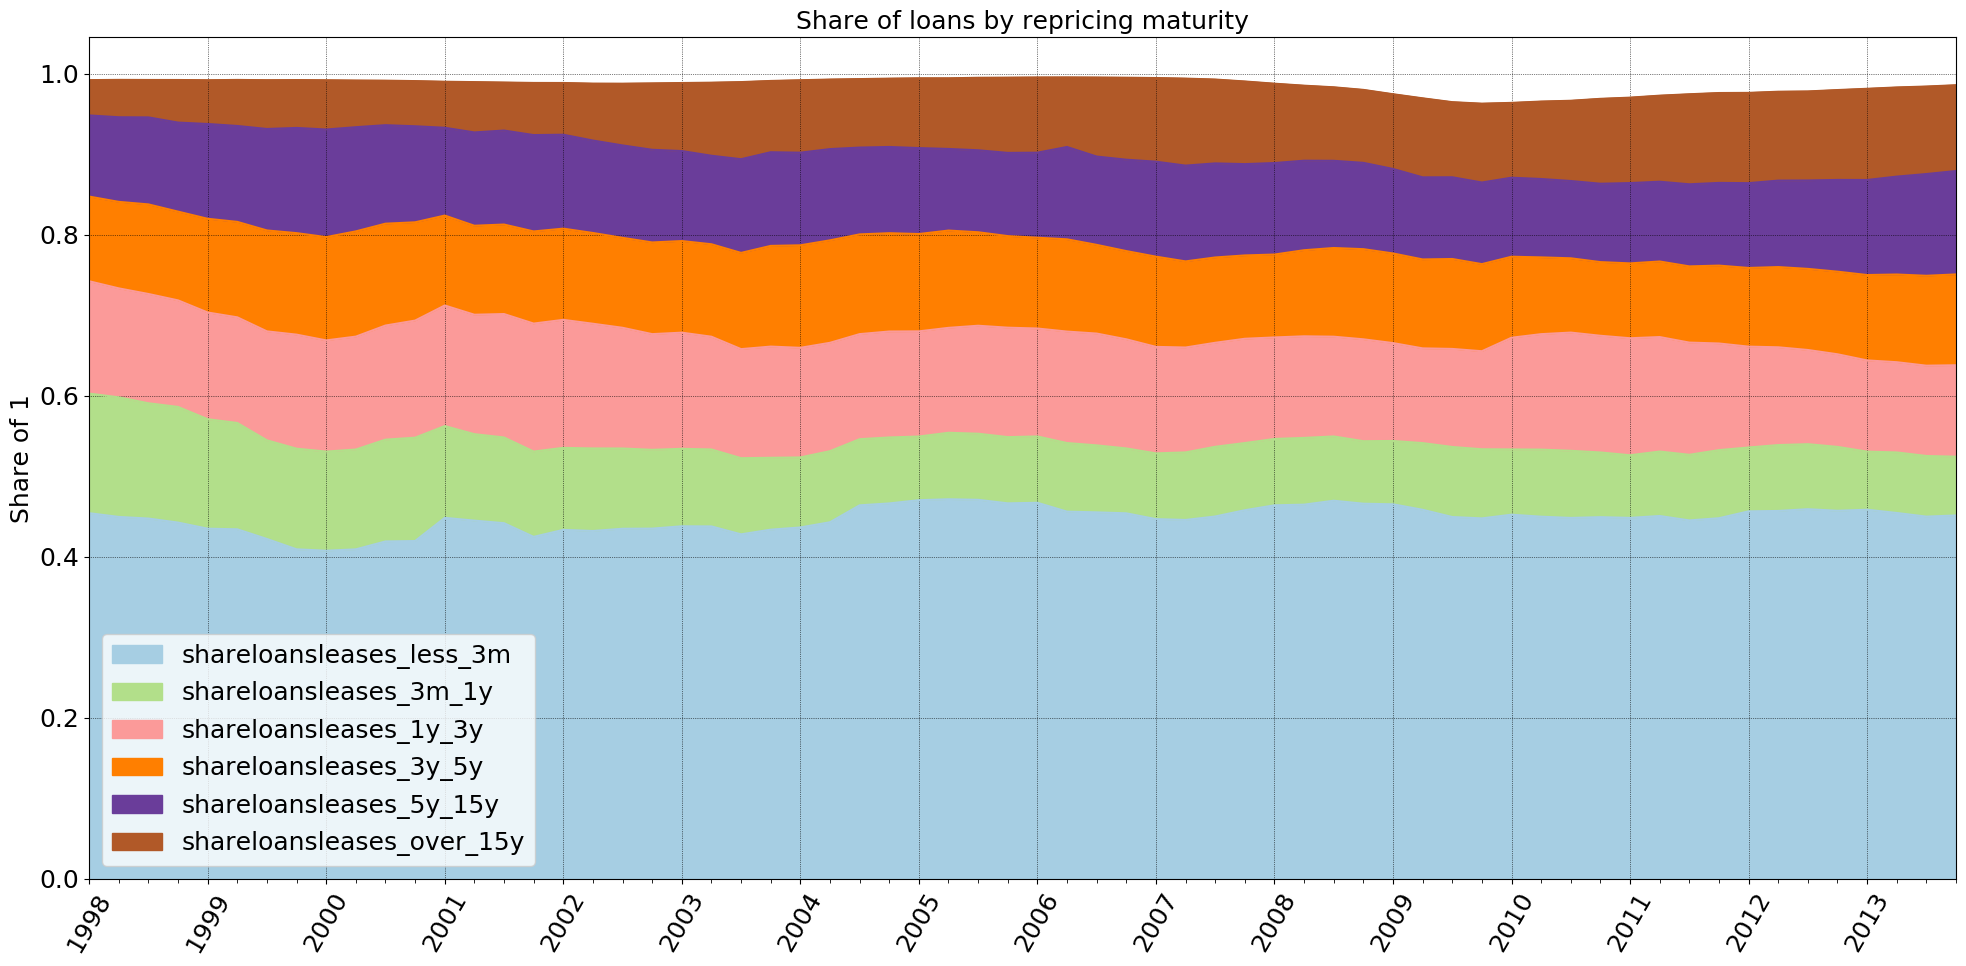

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1997, 2014)]
#ax.set_xticks(range(0,68,4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of loans by repricing maturity")
ax.set_ylabel("Share of 1")
#df_agg.assets.plot(ax=ax)
paired = cm.get_cmap('Paired', 12)
df_agg_share_maturity.plot.area(ax=ax, y=['shareloansleases_less_3m', 'shareloansleases_3m_1y', 'shareloansleases_1y_3y', 'shareloansleases_3y_5y', 'shareloansleases_5y_15y', 'shareloansleases_over_15y'], colormap=paired, use_index=False)
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid(True)
ax.set_xlim(4, 67)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofMaturityLoans_9713.png')

['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


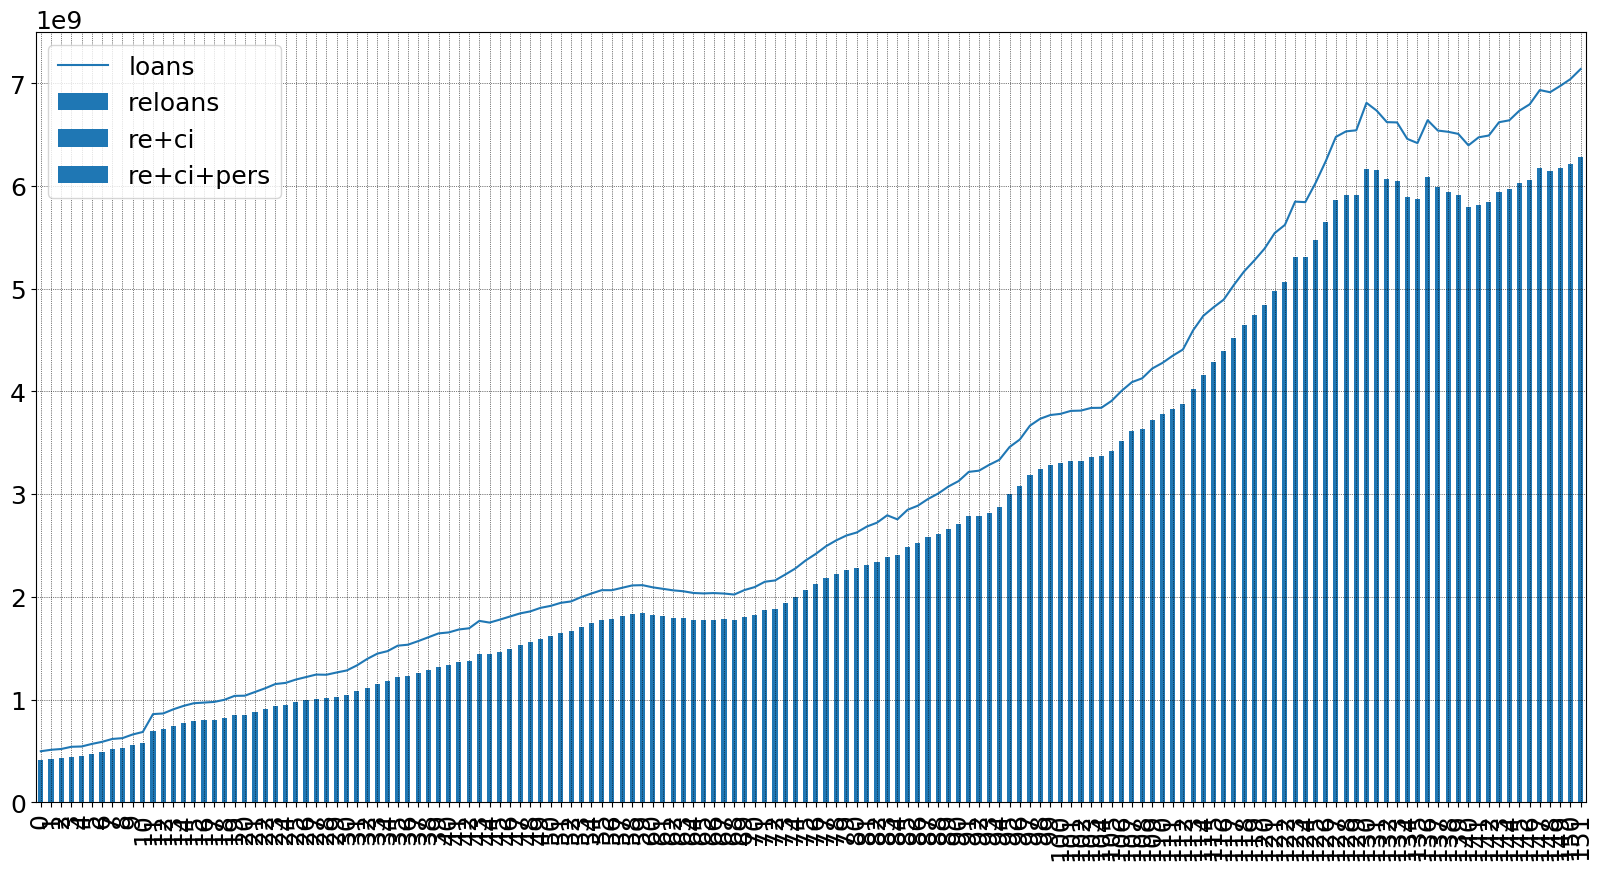

In [11]:
fig, ax1 = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
#ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
#ax.set_xticklabels(years, rotation=60)
pivot_copy.loans.plot(ax=ax1)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
pivot_copy.reloans.plot.bar(ax=ax1)
pivot_copy["re+ci"].plot.bar(ax=ax1)
pivot_copy["re+ci+pers"].plot.bar(ax=ax1)
#pivot_copy["re+ci+pers+ag"].plot.bar(ax=ax1)
ax1.legend()
ax1.grid()
print(years)

Residential loans

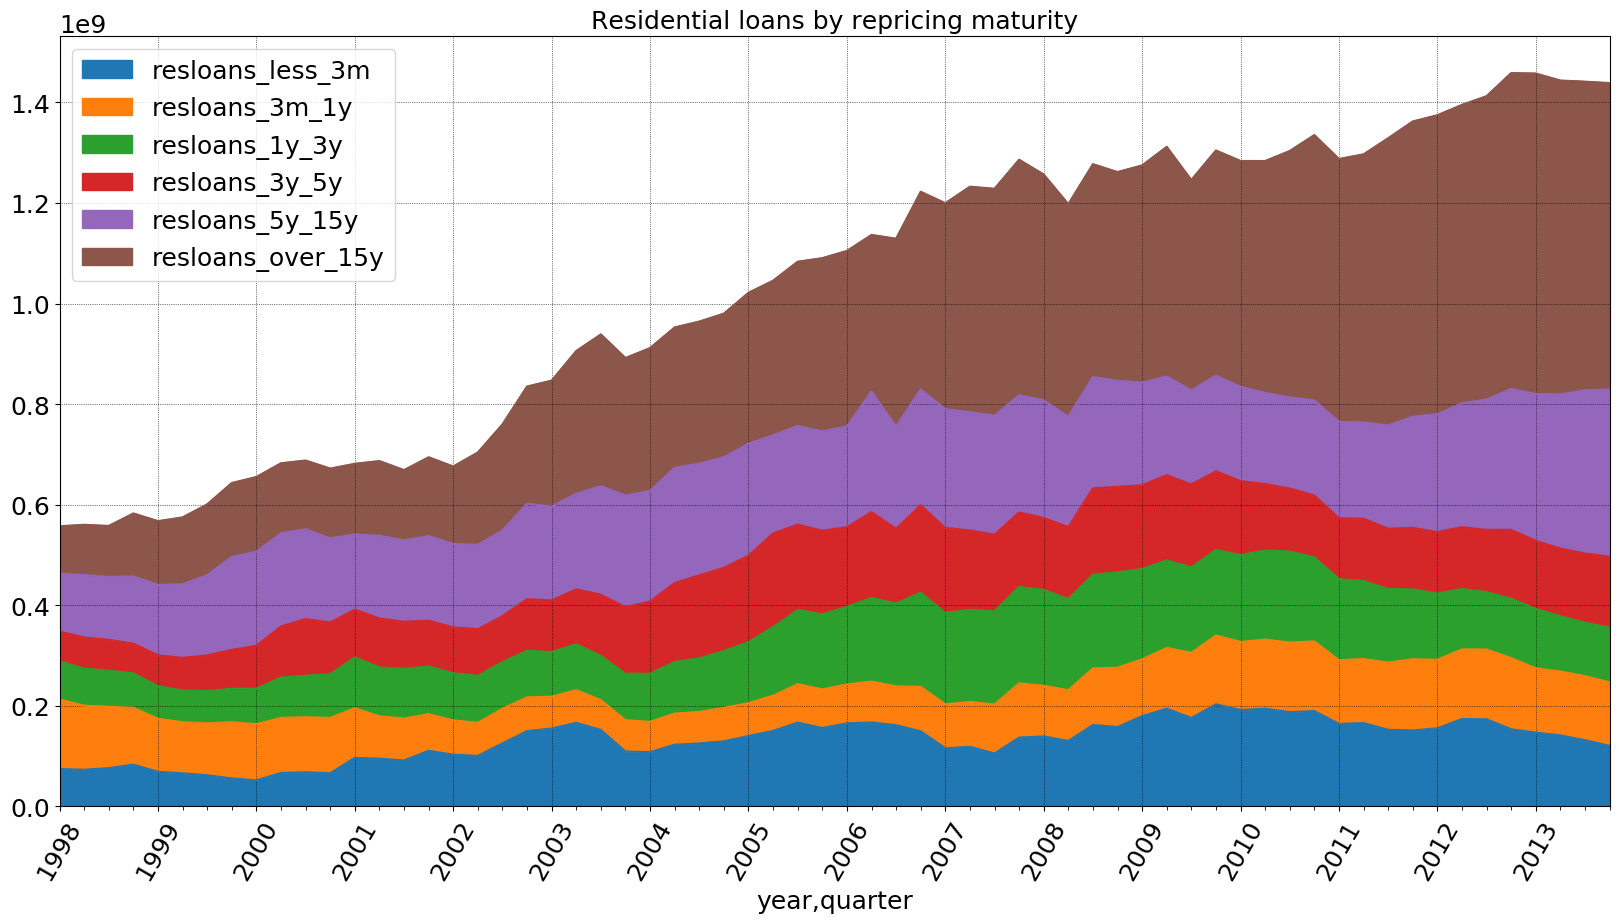

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,68,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
years = [str(year) for year in range(1997, 2014)]
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Residential loans by repricing maturity")
#pivot2.plot(ax=ax2)
df_agg_loans_maturity.plot.area(ax=ax, y=["resloans_less_3m","resloans_3m_1y","resloans_1y_3y","resloans_3y_5y","resloans_5y_15y","resloans_over_15y"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlim(4, 67)
ax.grid(True)
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_MaturityResLoans_9713.png')

Share of loans by repricing maturity

In [13]:
df_agg_loans_maturity["totalresloans"] = (df_agg_loans_maturity.iloc[:,13:19].sum(axis=1))

for (columnName, columnData) in df_agg_loans_maturity.iteritems():
    newcolumn = "share" + columnName
    df_agg_share_maturity[newcolumn] = df_agg_loans_maturity[columnName]/df_agg_loans_maturity.totalresloans
    

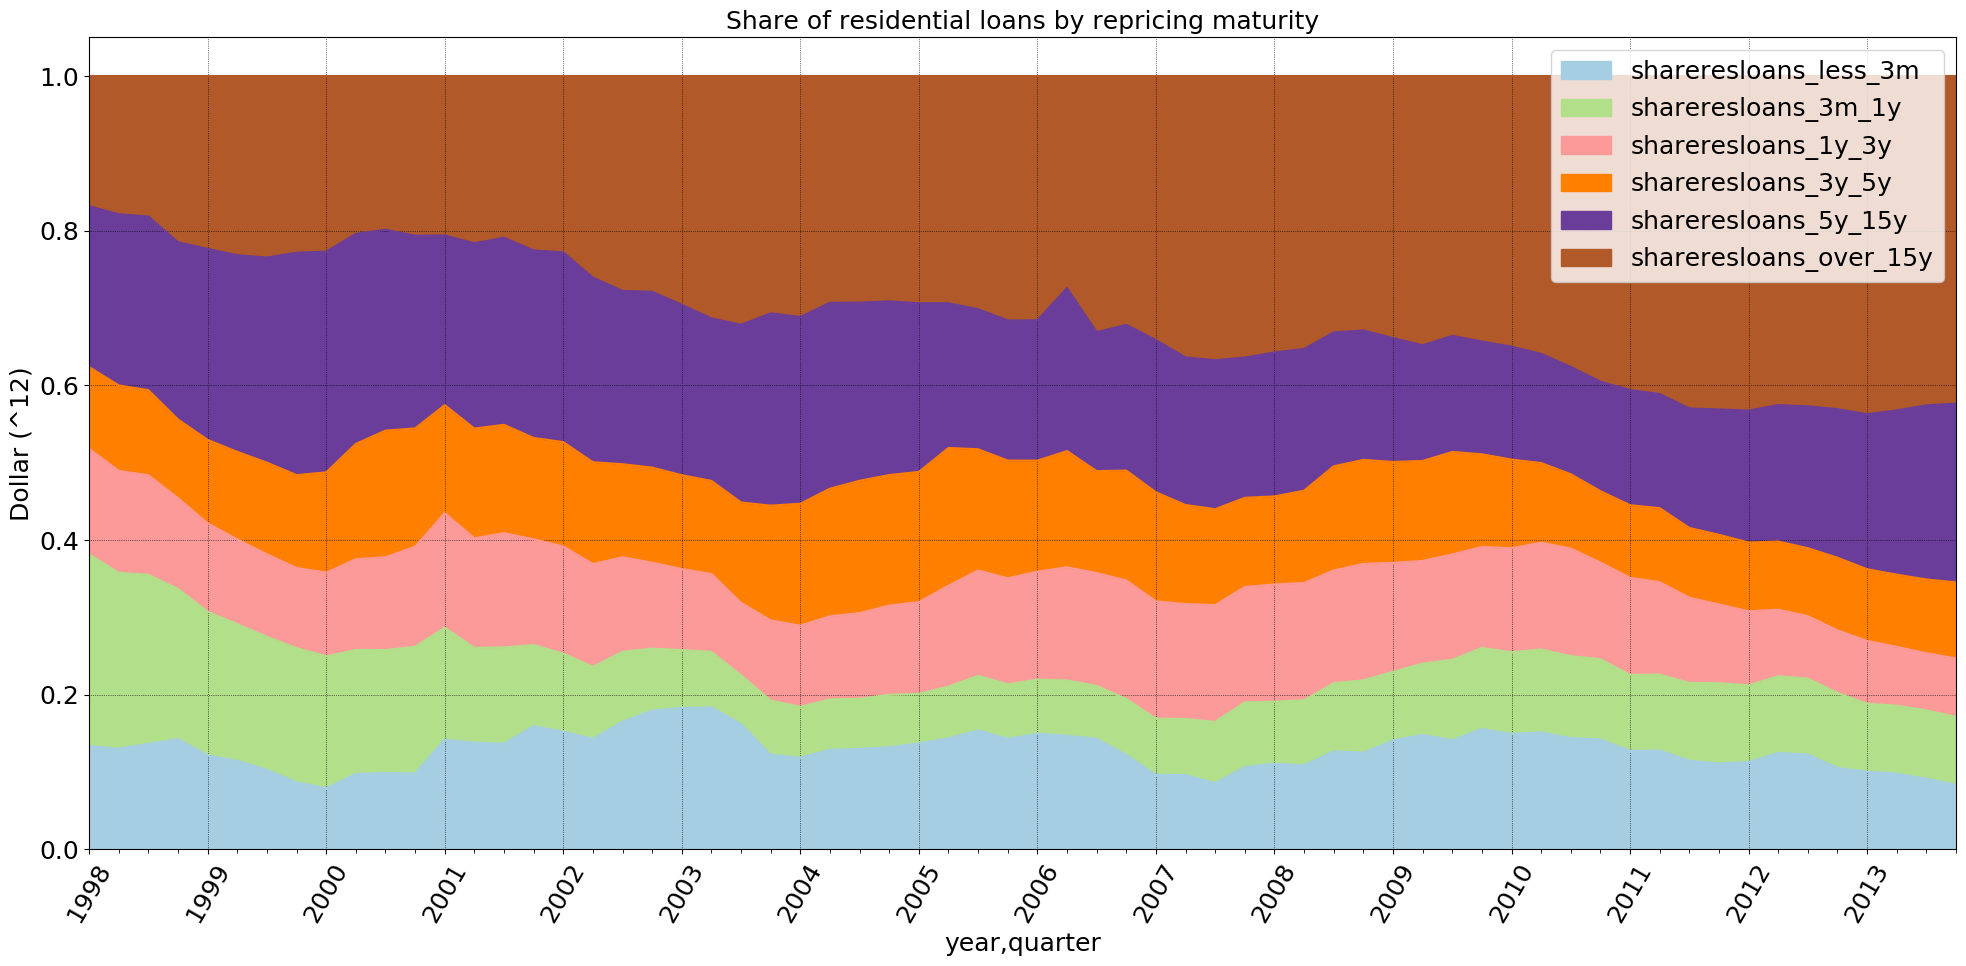

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1997, 2014)]
ax.set_xticks(range(0,68,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of residential loans by repricing maturity")
ax.set_ylabel("Dollar (^12)")
#df_agg.assets.plot(ax=ax)
paired = cm.get_cmap('Paired', 12)
#df_agg_share_maturity.plot.area(ax=ax, colormap=paired)
df_agg_share_maturity.plot.area(ax=ax, y=['shareresloans_less_3m', 'shareresloans_3m_1y', 'shareresloans_1y_3y', 'shareresloans_3y_5y', 'shareresloans_5y_15y', 'shareresloans_over_15y'], colormap=paired)
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
ax.set_xlim(4, 67)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofMaturityResLoans_9713.png')

Security Distribution

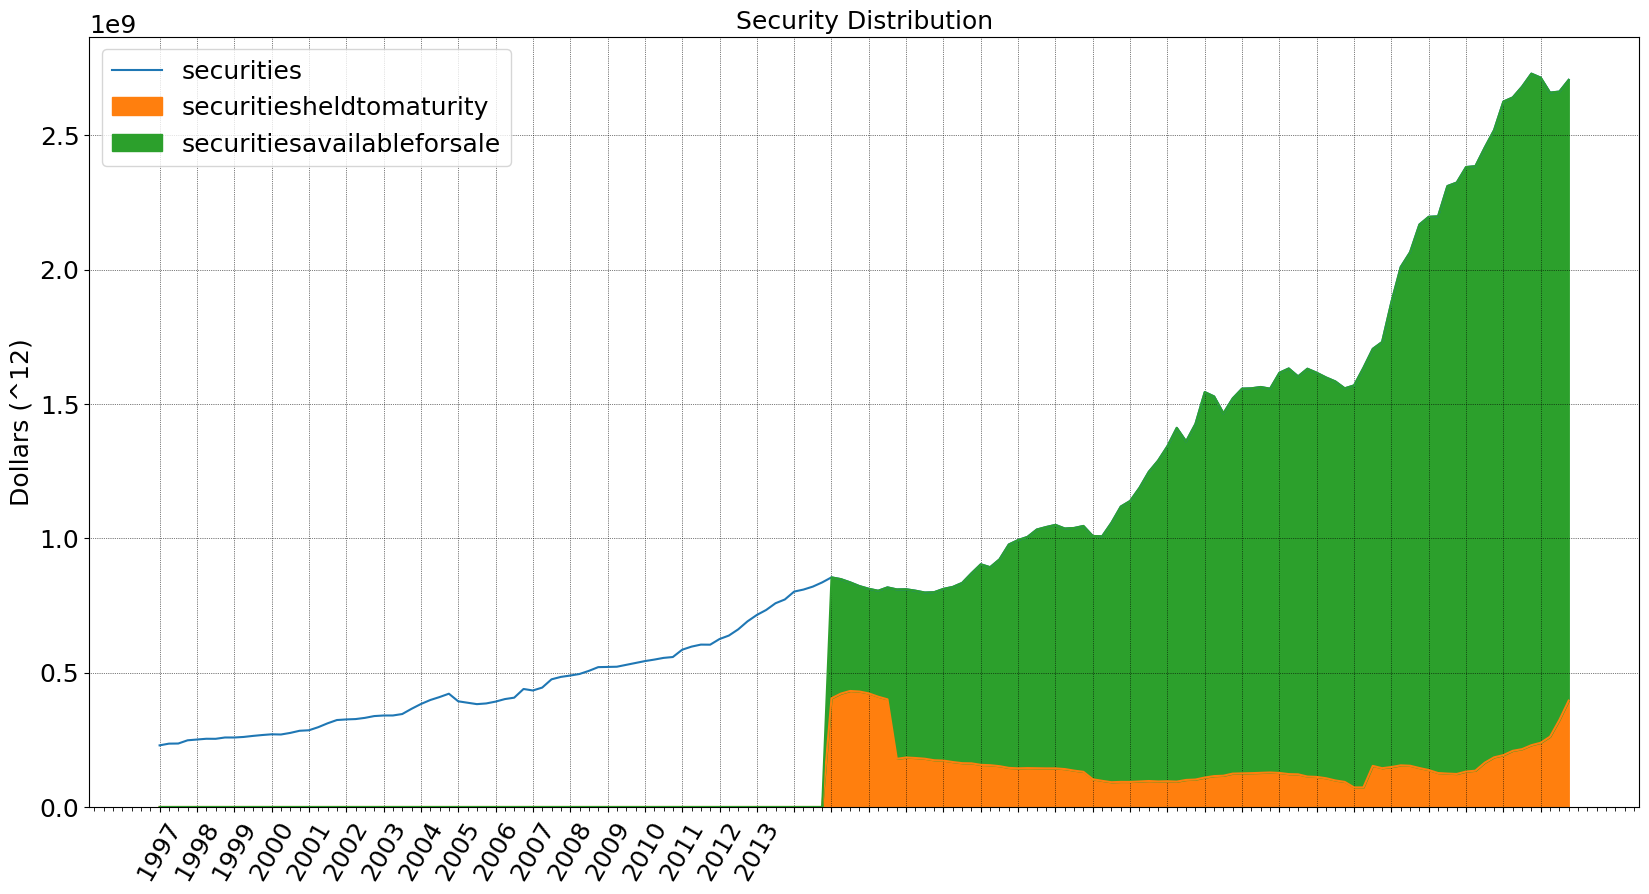

In [15]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"]]
pivot1 = pd.pivot_table(df, index=["year", "quarter"], values=["securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"], aggfunc={"securities": np.sum, "securitiesheldtomaturity": np.sum, "securities_ammcost": np.sum,"securitiesavailableforsale": np.sum})
pivot1 = pivot1.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Security Distribution")
pivot1.securities.plot(ax=ax2)
pivot1.plot.area(ax=ax2, y=["securitiesheldtomaturity", "securitiesavailableforsale"])
ax2.legend()
ax2.grid(True)
ax2.set_ylabel("Dollars (^12)")
ax2.set_xticklabels(years, rotation=60)
plt.savefig('LatexVorlage/graphs/Not Used/OtherAnalysis_SecurityDistribution_7613.png')

Analysis of deposits

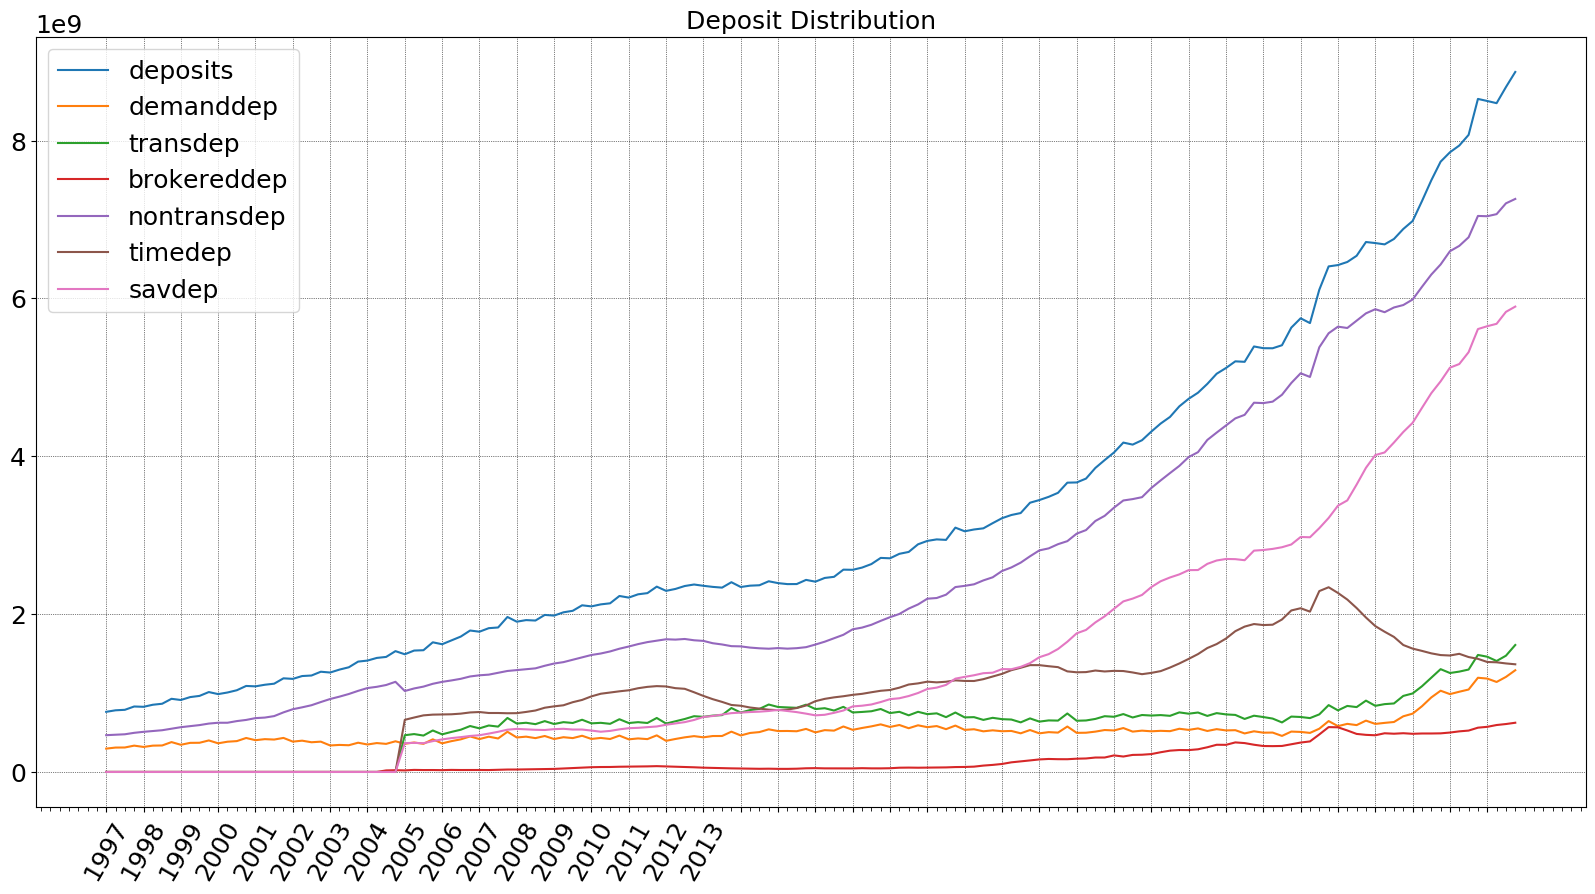

In [16]:
df = df_raw[["rssdid", "name", 'year', "quarter","deposits", "demanddep", "transdep","brokereddep" ,"timedepge100k", "timedeple100k", "timesavdep", "nontransdep", "timedep", "savdep"]]
pivot2 = pd.pivot_table(df, index=["year", "quarter"], values=["deposits", "demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"], aggfunc={"deposits": np.sum, "demanddep": np.sum, "transdep": np.sum, "brokereddep": np.sum,"nontransdep": np.sum, "timedep": np.sum, "savdep": np.sum})
pivot2 = pivot2.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))

ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
#pivot2.plot(ax=ax2)
pivot2.plot(ax=ax2, y=["deposits","demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"])
ax2.set_xticklabels(years, rotation=60)
ax2.legend()
ax2.grid()

Non-Transaction deposits compared with time and saving deposits

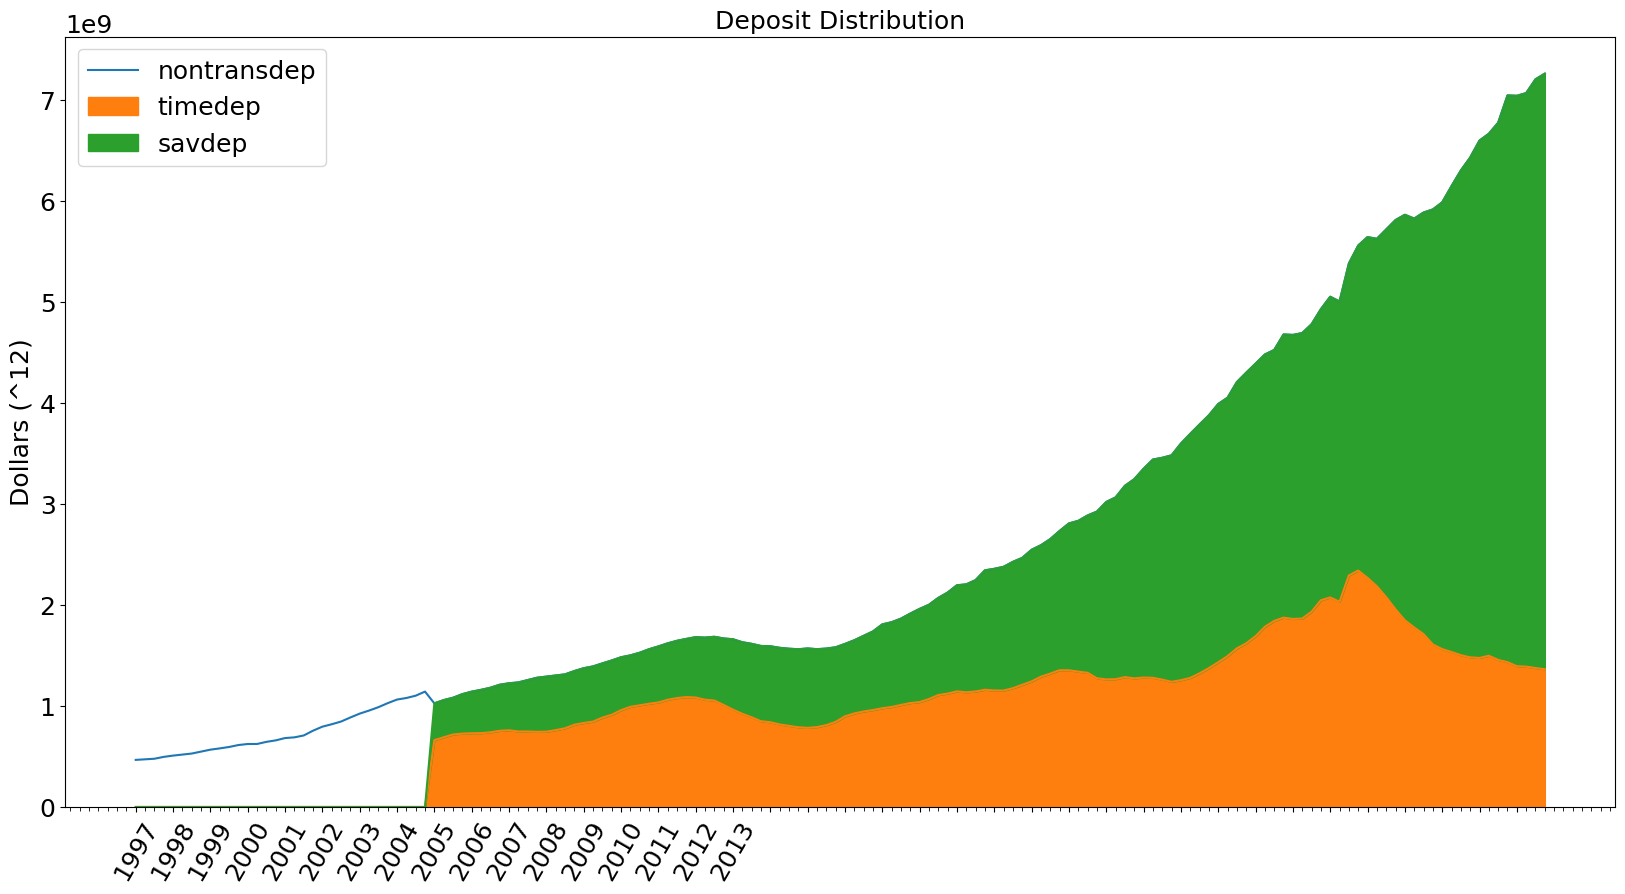

In [17]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
#ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.nontransdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["timedep", "savdep"])
ax2.set_xticklabels(years, rotation=60)

ax2.legend()
ax2.set_ylabel("Dollars (^12)")
plt.savefig('LatexVorlage/graphs/Not Used/OtherAnalysis_DepositDistribution_7613.png')

Transaction deposits analysed.

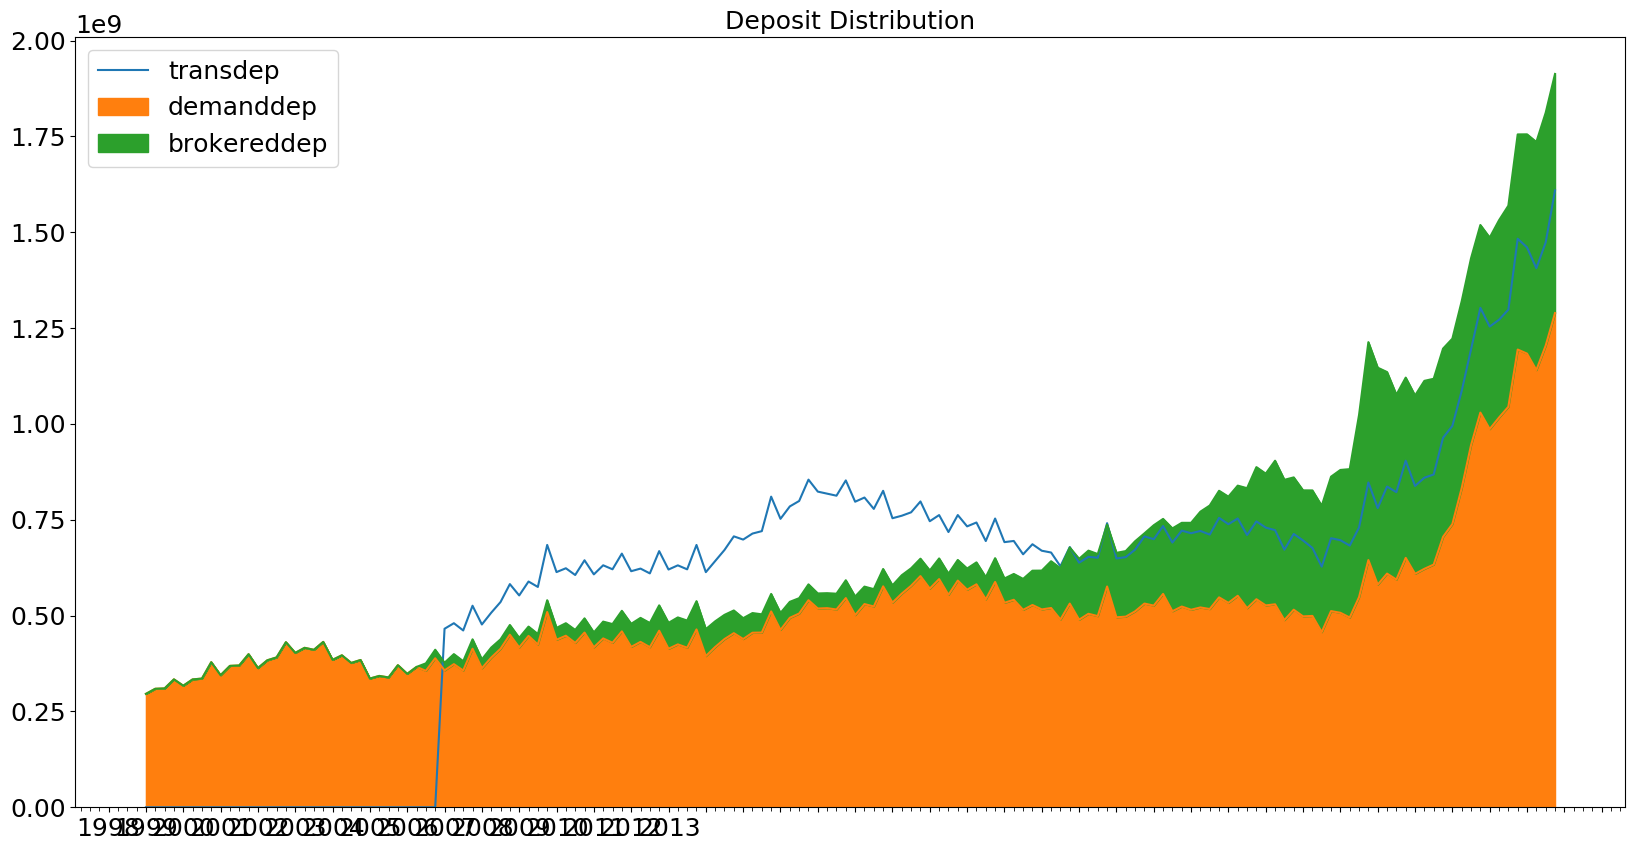

In [18]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.transdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["demanddep", "brokereddep"])
ax2.legend()

Total deposits = transdep + nontransdep

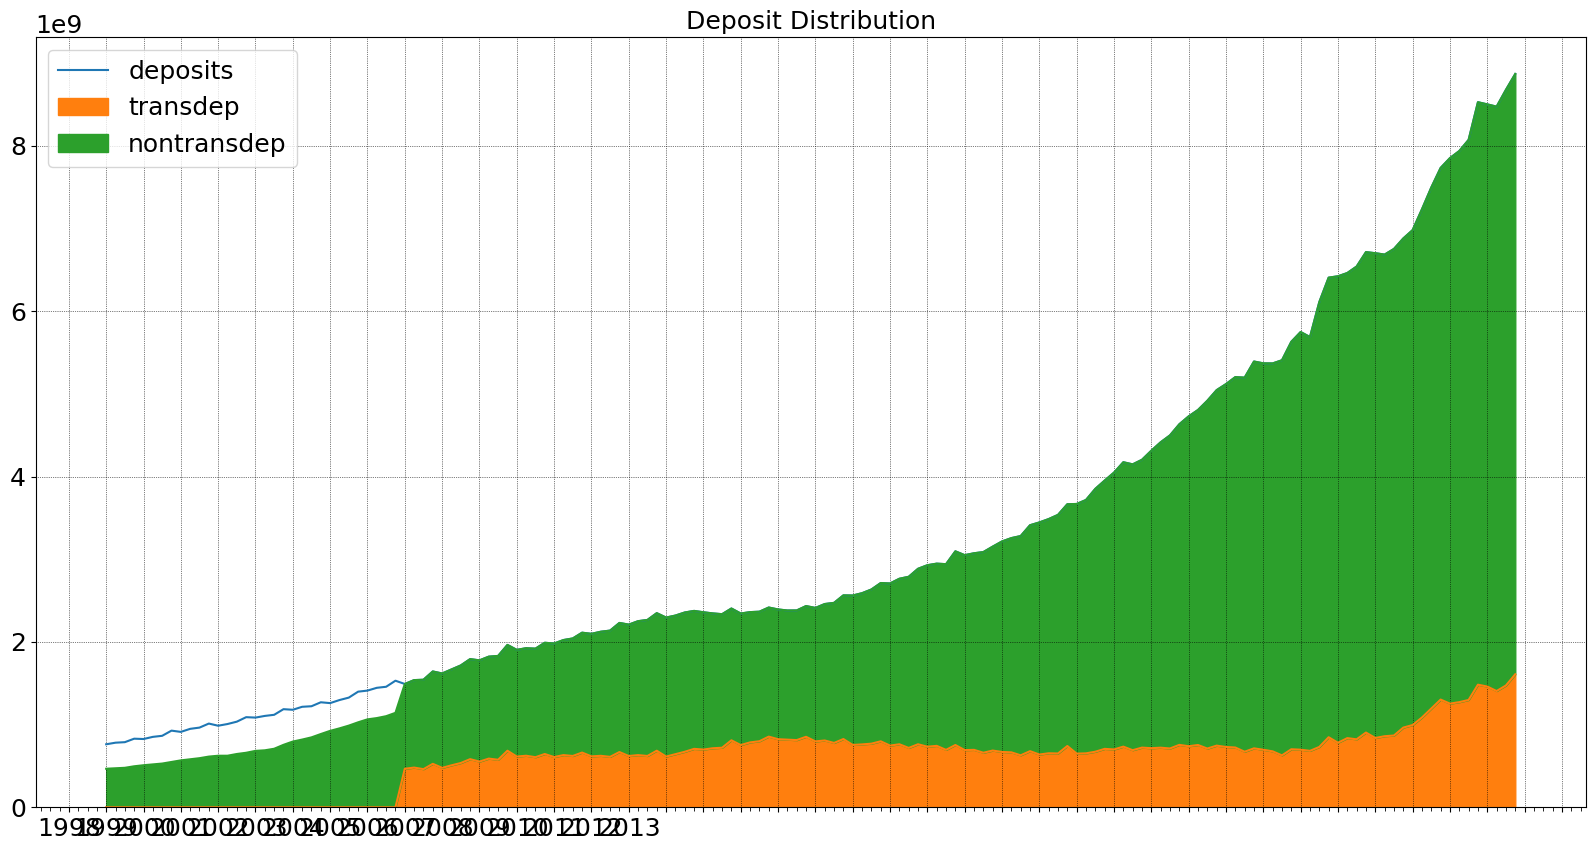

In [19]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.deposits.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["transdep", "nontransdep"])
ax2.legend()
ax2.grid()

Analysing liability side:

In [20]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities","subordinateddebt", "liabilities"]]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherliab"] = df_agg["assets"] - (df_agg.iloc[:,4:11].sum(axis=1))


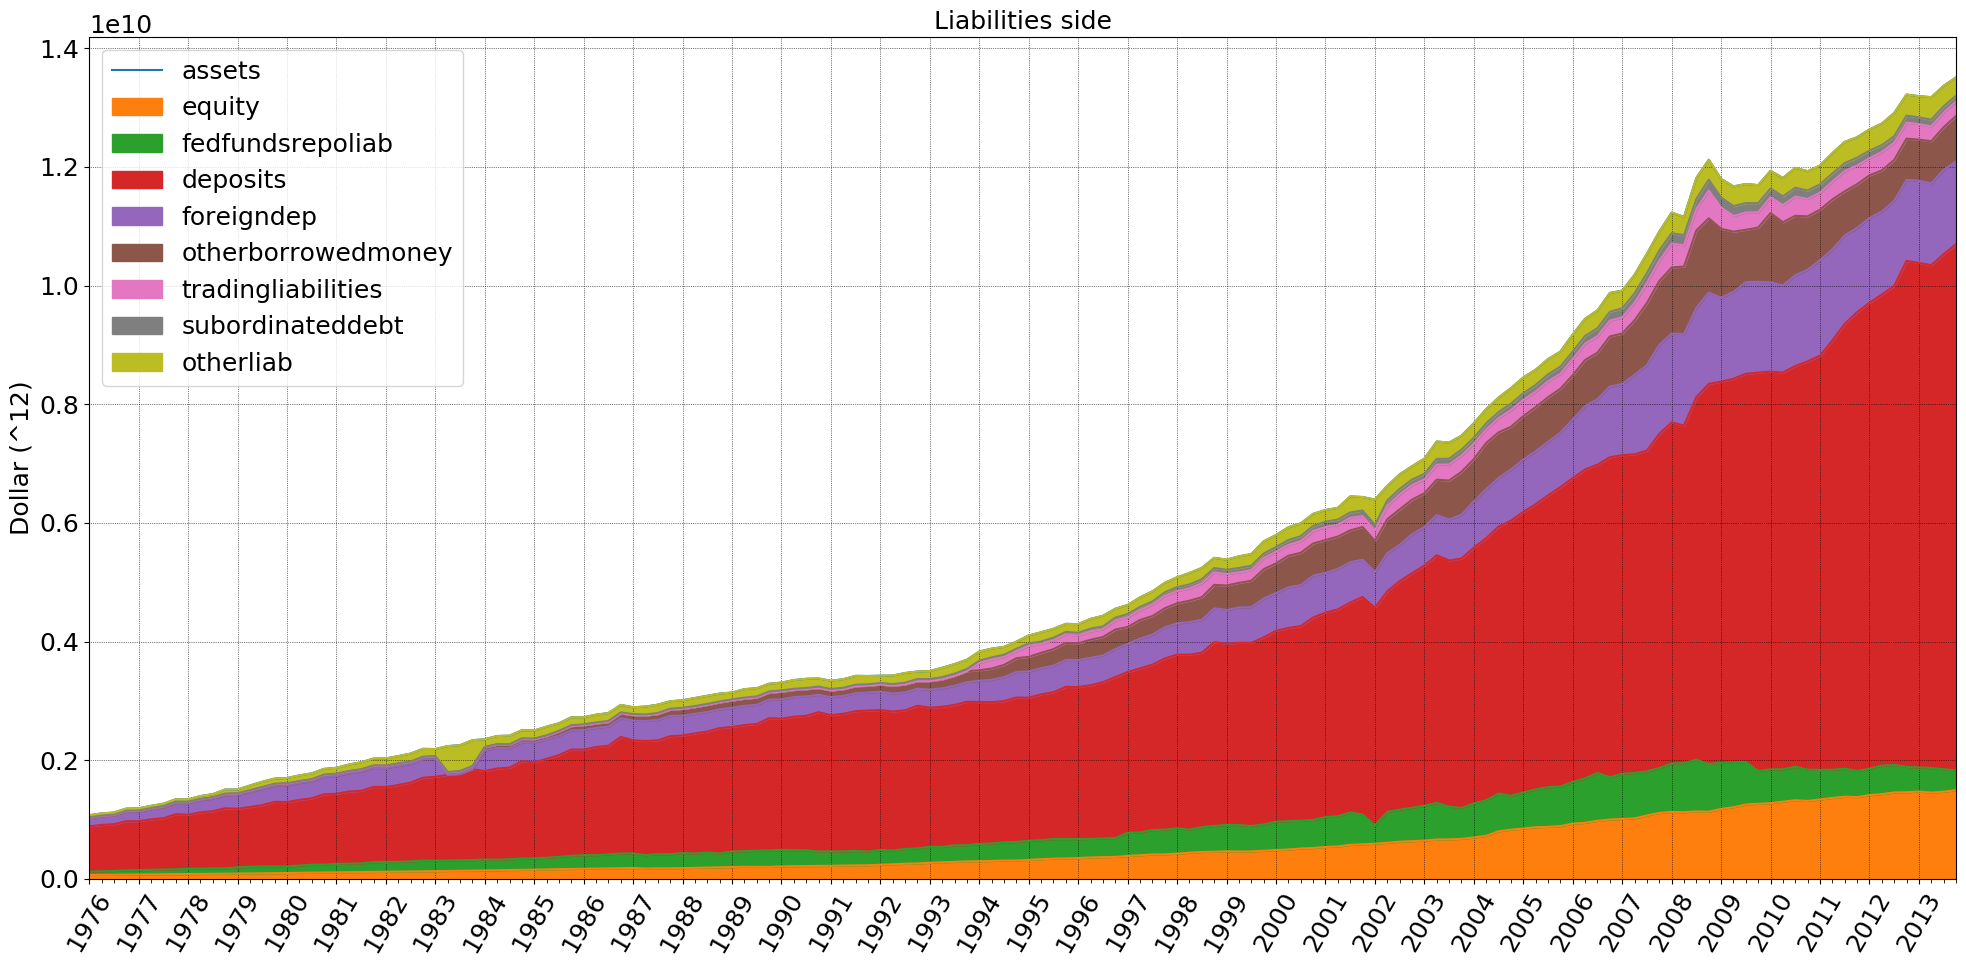

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))

ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
ax.set_ylabel("Dollar (^12)")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
ax.set_xlim(0, 151)
plt.tight_layout()
#ax.set_ylabel("Dollar (^12)")
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LiabilitiesDistribution_7613.png')

In [22]:
df_agg_corr = df_agg[["equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"]]

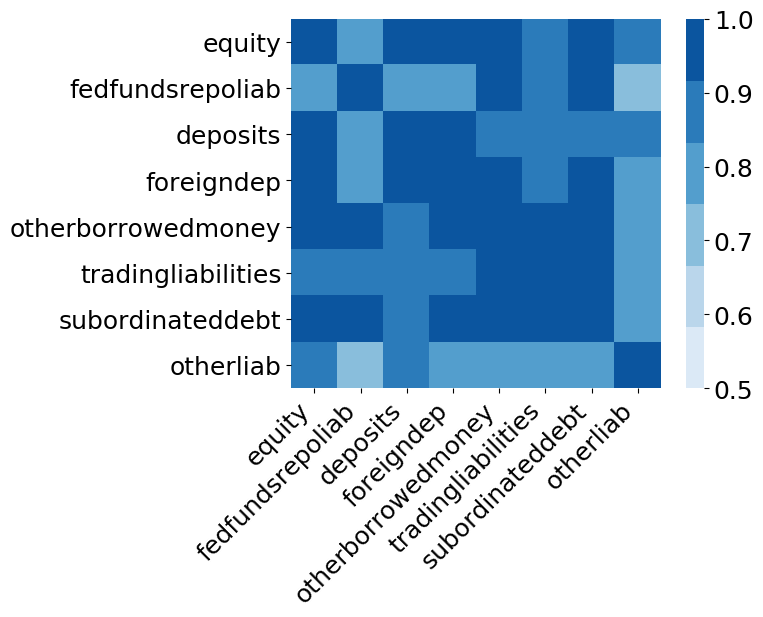

In [23]:
corr = df_agg_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=0.5, vmax=1, center=0.75,
    cmap=sns.color_palette("Blues"),
    square=True
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_LiabilitiesCorrelationHeatMap_7613.png', bbox_inches = "tight")


Share of balance sheet positions (liabilities side)

In [24]:
df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_agg.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

df_agg_share

shareequity  sharefedfundsrepoliab  sharedeposits  shareforeigndep  shareotherborrowedmoney  sharetradingliabilities  sharesubordinateddebt  shareotherliab
0       0.062882               0.053478       0.709711         0.132343                 0.007263                 0.000000               0.004340        0.029982
1       0.062743               0.053961       0.707007         0.131567                 0.007933                 0.000000               0.004610        0.032179
2       0.063333               0.057440       0.703650         0.132500                 0.007881                 0.000000               0.004518        0.030678
3       0.061085               0.059725       0.699568         0.138317                 0.008344                 0.000000               0.004456        0.028505
4       0.062045               0.062126       0.693934         0.137964                 0.008242                 0.000000               0.004425        0.031264
5       0.061568               0.062359       0.691204         0.139677                 0.009726                 0.000000               0.004481        0.030986
6       0.061430               0.063663       0.682043         0.145623                 0.010511                 0.000000               0.004397        0.032333
7       0.059169               0.062649       0.690358         0.142049                 0.010136                 0.000000               0.004397        0.031241
8       0.060454               0.067386       0.679138         0.145946                 0.010277                 0.000000               0.004360        0.032438
9       0.059590               0.064187       0.679195         0.146050                 0.012447                 0.000000               0.004176        0.034356
10      0.059966               0.064870       0.674097         0.148741                 0.012171                 0.000000               0.004259        0.035896
11      0.057956               0.060628       0.671577         0.146324                 0.013519                 0.000000               0.004085        0.045911
12      0.059490               0.070730       0.654530         0.155155                 0.014273                 0.000000               0.004083        0.041740
13      0.058732               0.071657       0.639657         0.159893                 0.016556                 0.000000               0.003952        0.049553
14      0.058125               0.069770       0.632006         0.166455                 0.016194                 0.000000               0.003799        0.053651
15      0.057428               0.066423       0.644407         0.161102                 0.015850                 0.000000               0.003697        0.051092
16      0.058734               0.065363       0.638145         0.164512                 0.018472                 0.000000               0.003604        0.051169
17      0.058686               0.071128       0.633255         0.163092                 0.015850                 0.000000               0.003786        0.054204
18      0.059158               0.075493       0.628335         0.160502                 0.017113                 0.000000               0.003722        0.055677
19      0.057927               0.071857       0.639657         0.158482                 0.017356                 0.000000               0.003531        0.051189
20      0.059190               0.077178       0.629596         0.160384                 0.017392                 0.000000               0.003451        0.052808
21      0.058921               0.074742       0.630613         0.159716                 0.016303                 0.000000               0.003380        0.056325
22      0.059242               0.074397       0.621609         0.163509                 0.018183                 0.000000               0.003252        0.059808
23      0.058266               0.080749       0.626051         0.156990                 0.018069                 0.000000               0.003

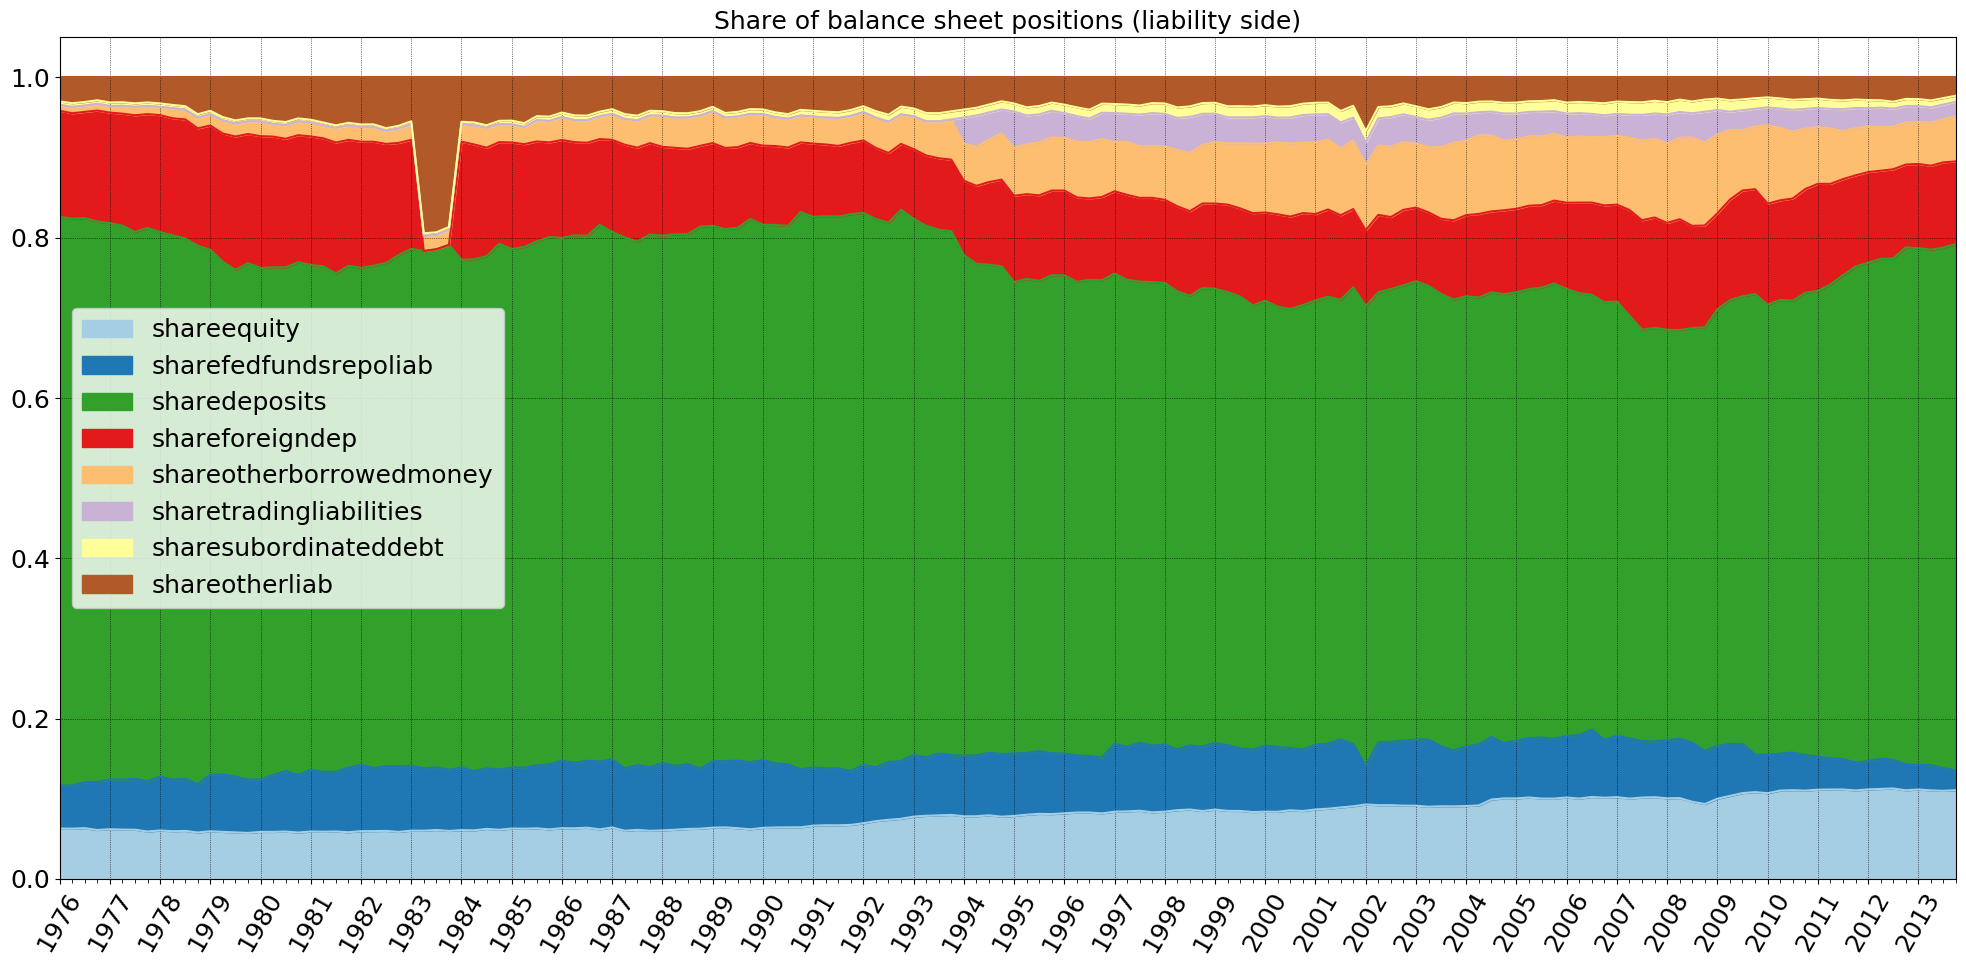

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
ax.set_xlim(0, 151)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofLiabilities_7613.png')


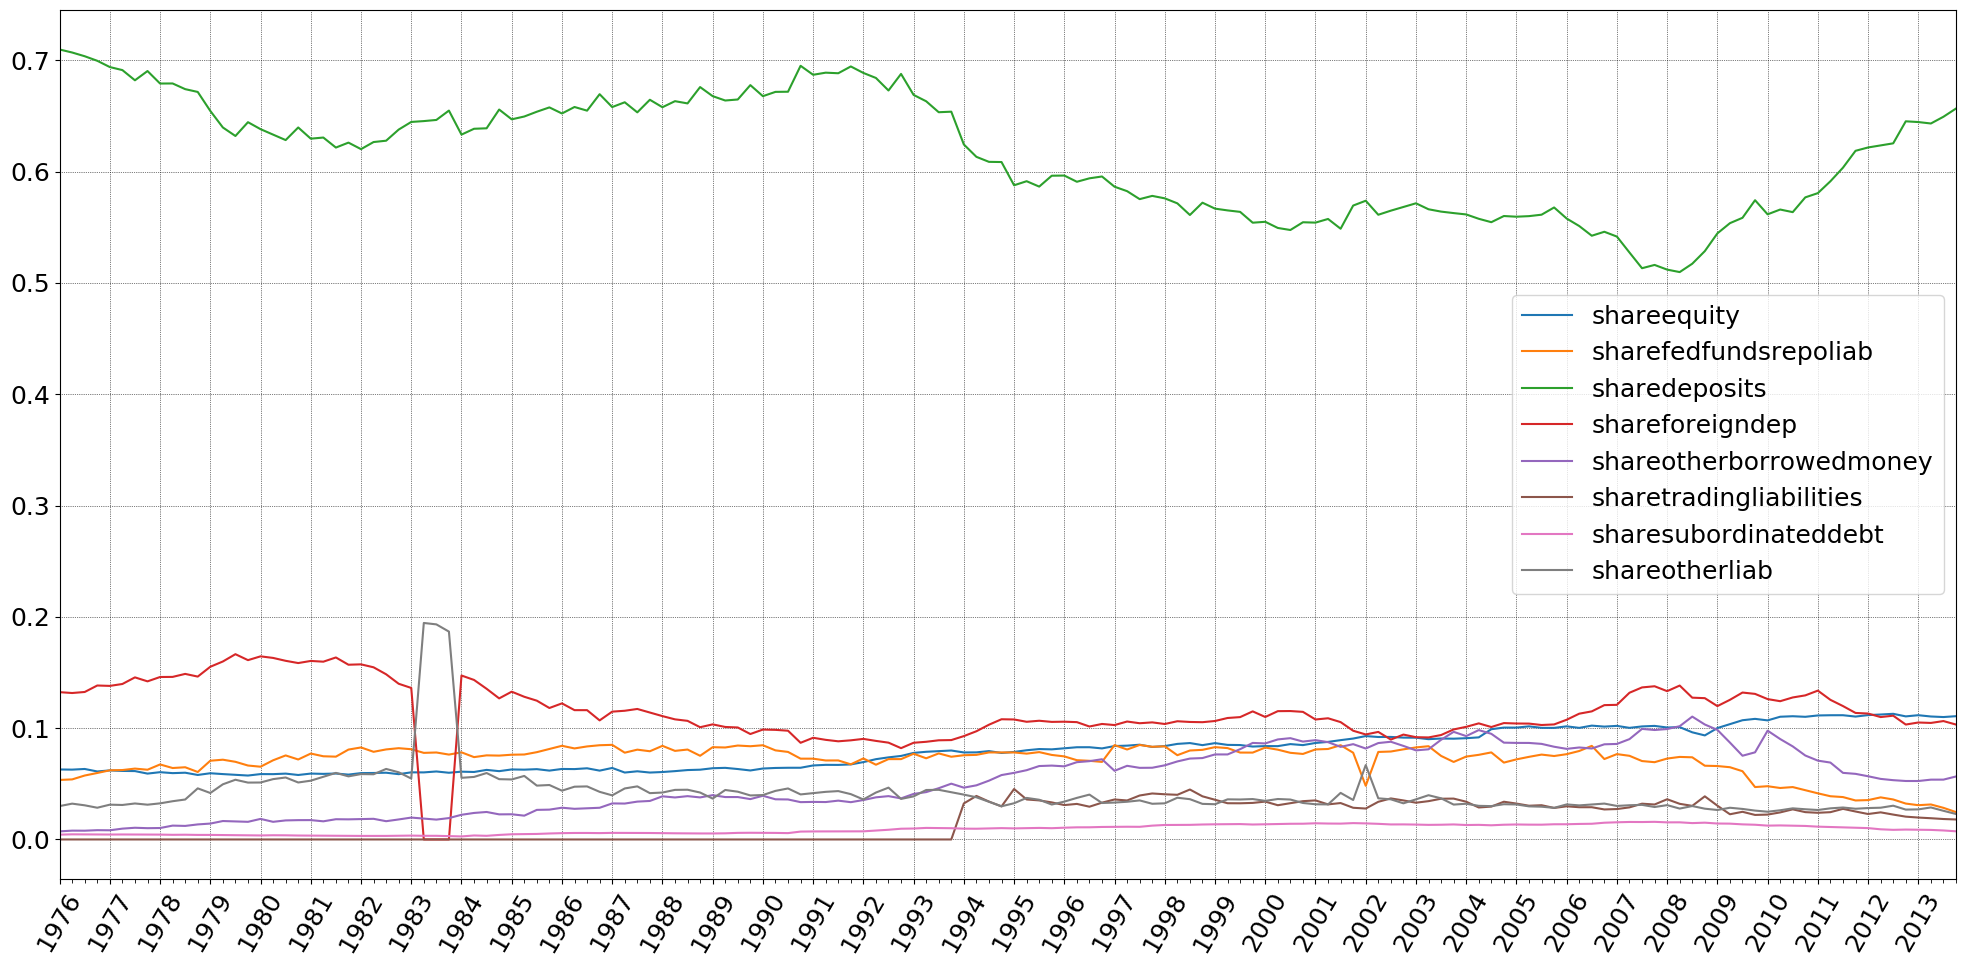

In [26]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1975, 2014)]

ax.set_xticklabels(years, rotation=60)
ax.plot(df_agg_share)

ax.legend(df_agg_share.columns)

ax.set_xlim(0,151)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))


ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofLiabilitiesPlot_7613.png')




No handles with labels found to put in legend.


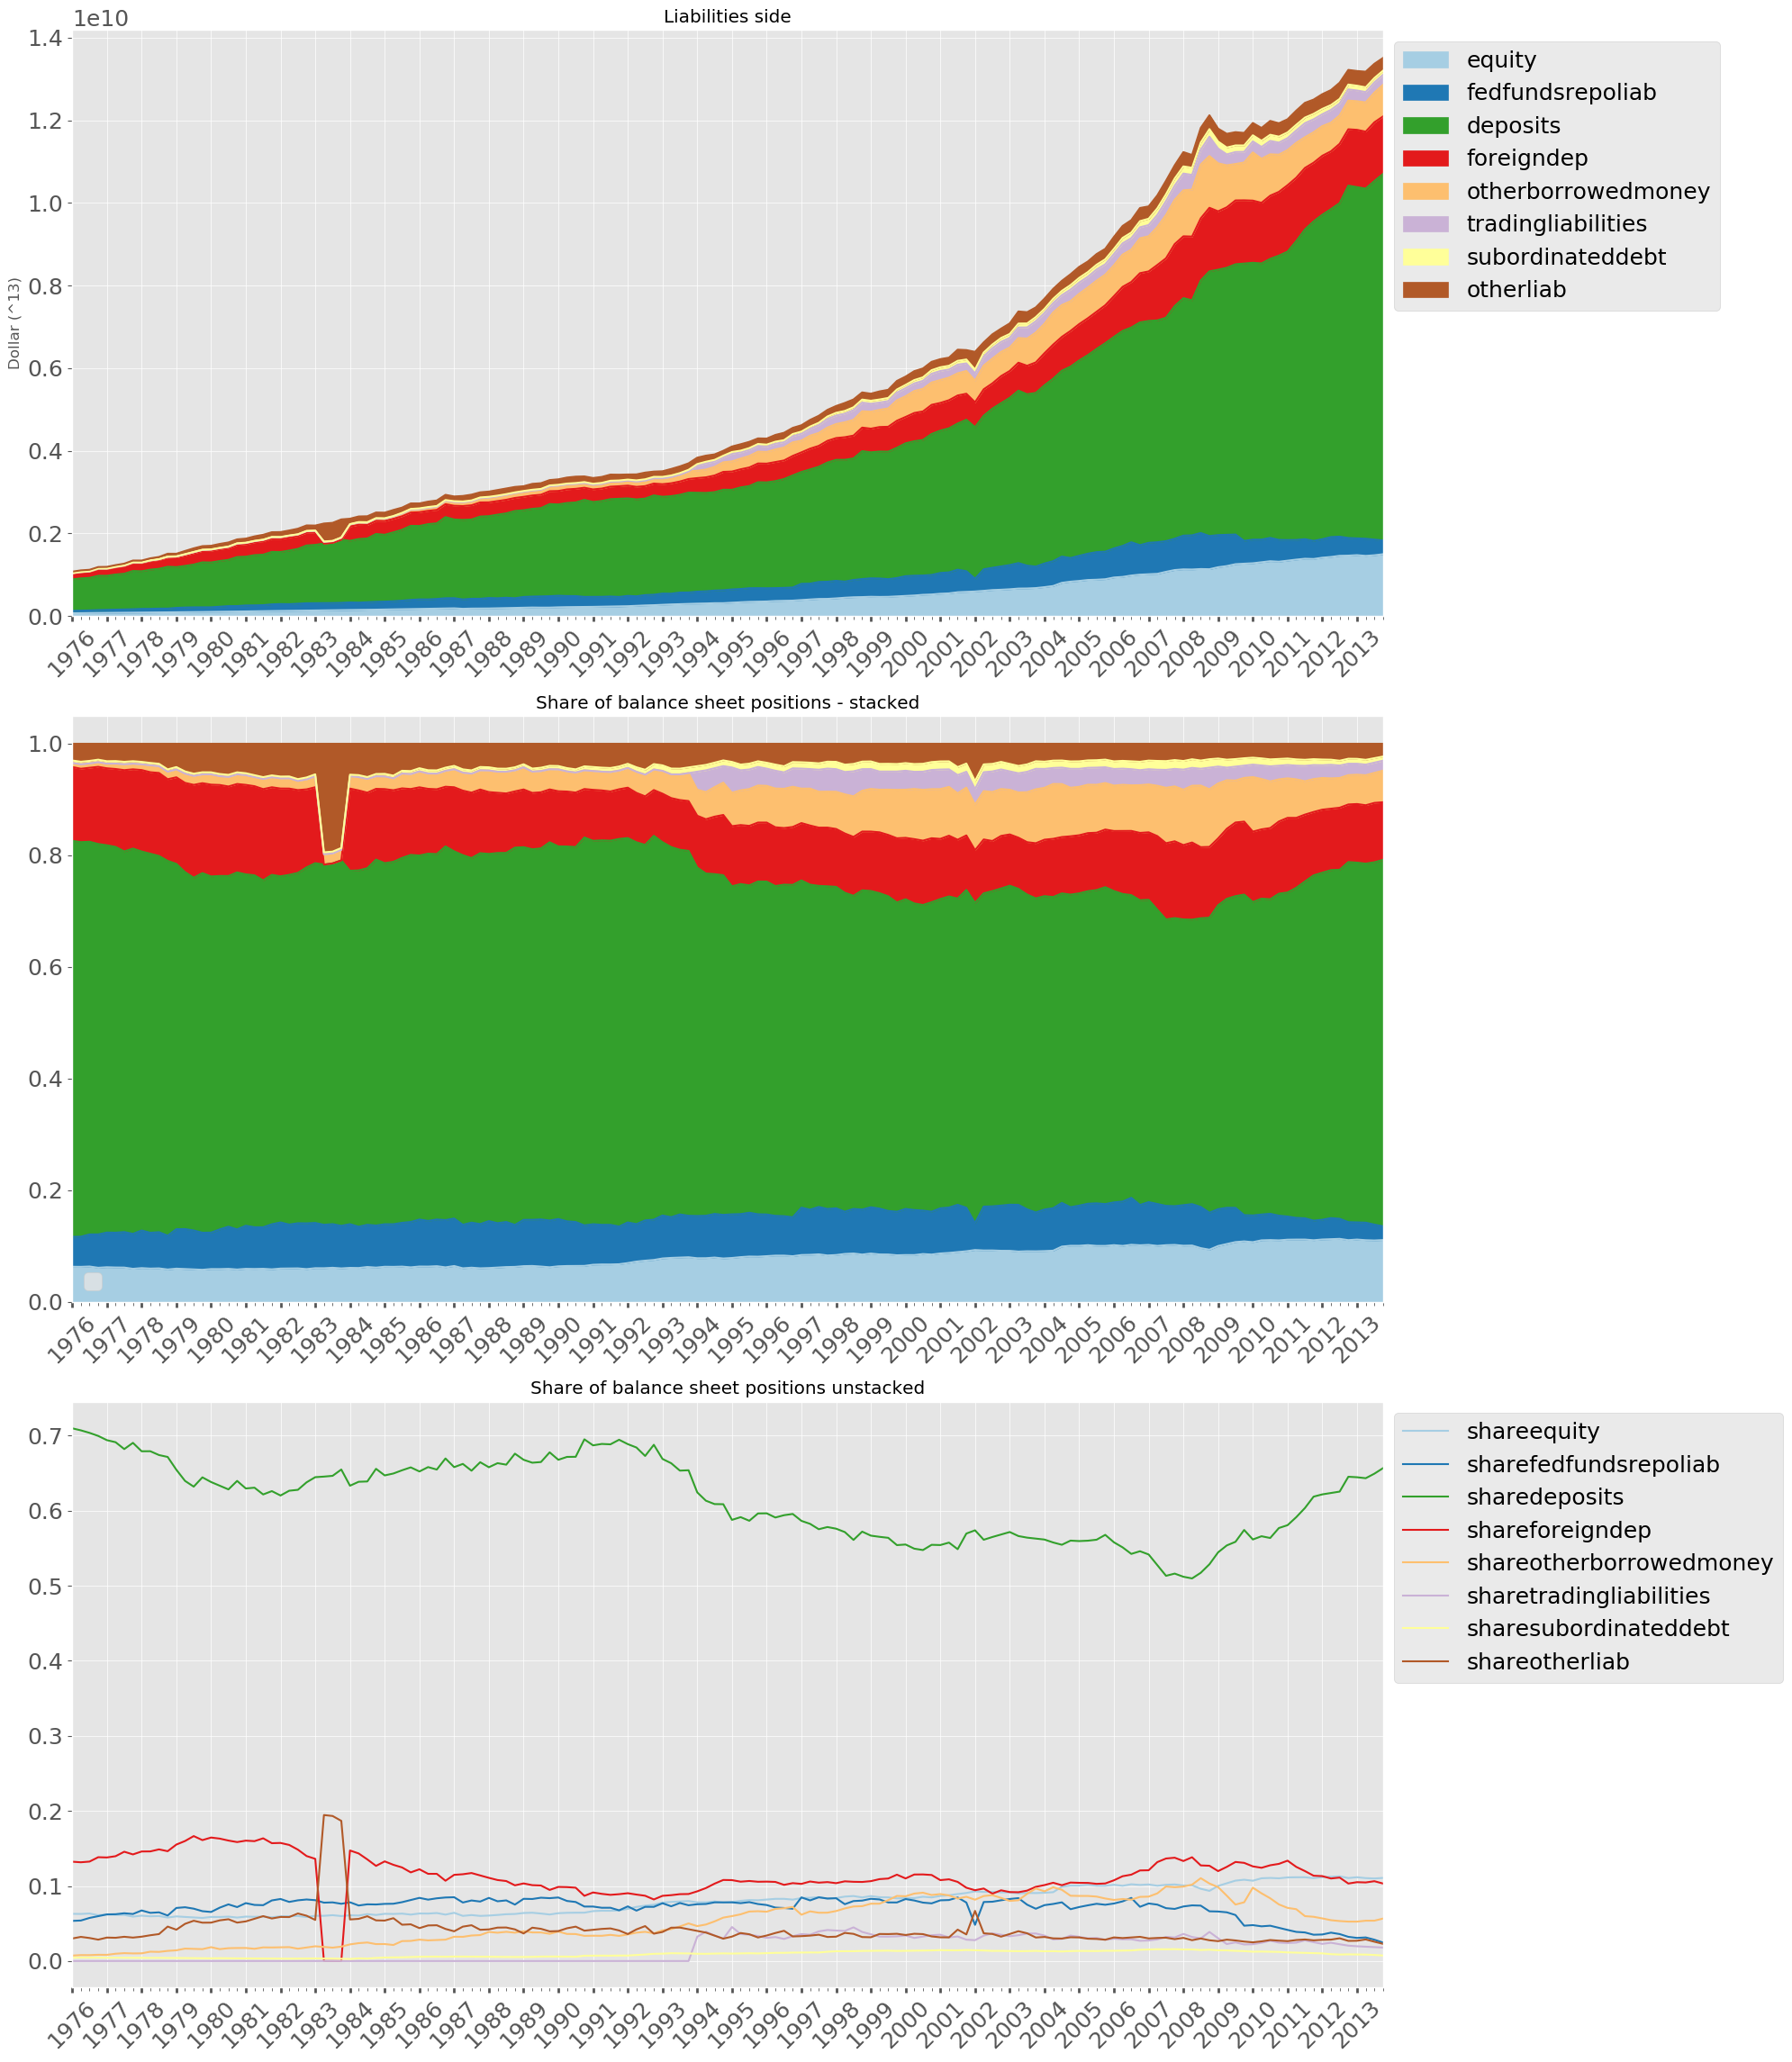

In [27]:
#use temporary different style
plt.style.use('ggplot')
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=4  # fontsize of the figure title
plt.rcParams['xtick.major.width']=2  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title

fig, ax = plt.subplots(3,1,figsize=(20,23))
ax.ravel()

viridis = cm.get_cmap('Paired', 12)


#First plot
#ax.set_xticks(range(0,152,4))

#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].set_title("Liabilities side")
ax[0].set_ylabel("Dollar (^13)")
df_agg.plot.area(ax=ax[0], y=["equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"], colormap=viridis)
ax[0].legend(bbox_to_anchor=(1, 1))
#ax.set_xticklabels(years, rotation=60)
#ax[0].legend()
#ax[0].grid()
#ax.set_xlim(0, 151)


#Second plot
#ax[1].set_xticks(range(0,152,4))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].set_title("Share of balance sheet positions - stacked")
ax[1].legend(bbox_to_anchor=(1, 1))
#df_agg.assets.plot(ax=ax)
df_agg_share.plot.area(ax=ax[1], colormap=viridis, legend=None)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
#ax.set_xticklabels(years, rotation=60)
#ax[1].legend()
#ax[1].grid()
#ax.set_xlim(0, 151)

#Third plot

#ax.set_xticklabels(years, rotation=60)
df_agg_share.plot(ax=ax[2], colormap=viridis)
ax[2].legend(bbox_to_anchor=(1, 1))
#ax[2].legend(df_agg_share.columns)

#ax.set_xlim(0,151)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))


#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
#ax.grid(True)
years = [str(year) for year in range(1975, 2014)]
ax[2].set_title("Share of balance sheet positions unstacked")

for i in range(0,3):
    ax[i].set_xlim(0,151)
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(4))
    ax[i].xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    ax[i].grid(True)
    ax[i].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofLiabilitiesAll3_7613.png')


In [28]:
#set back old style
plt.style.use('default')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title
plt.rcParams['xtick.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.major.size']=3.5  # fontsize of the figure title
#plt.rcParams['xtick.major.width']=1  # fontsize of the figure title
plt.rcParams['xtick.major.top']=False  # fontsize of the figure title
plt.rcParams['xtick.minor.bottom']=True  # fontsize of the figure title
plt.rcParams['xtick.minor.size']=3  # fontsize of the figure title

In [29]:
temp_df = df_agg_share.copy()

didx = pd.date_range('1976-01-01', "2013-12-31", freq='Q')

temp_df.set_index(didx, inplace=True)

#sns.plot(temp_df.index.to_pydatetime(), temp_df)

#temp_df.index.astype("Datetime")

temp_df.index.dtype

dtype('<M8[ns]')

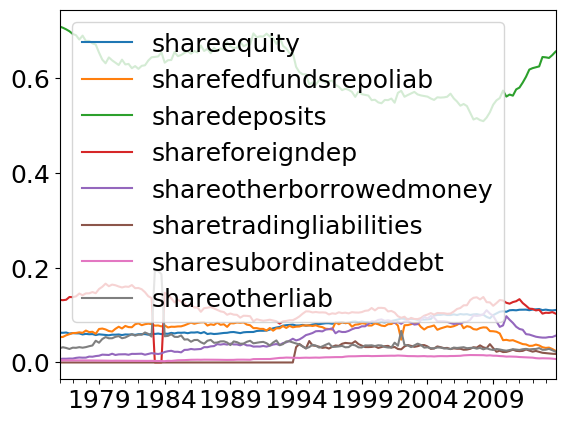

In [30]:
temp_df.index.astype("O", copy=False)


temp_df.plot()

ax = plt.gca()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


In [31]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.index

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24', '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30', '2004-08-31', '2004-09-01',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'], dtype='datetime64[ns]', name='Date', length=2863, freq=None)

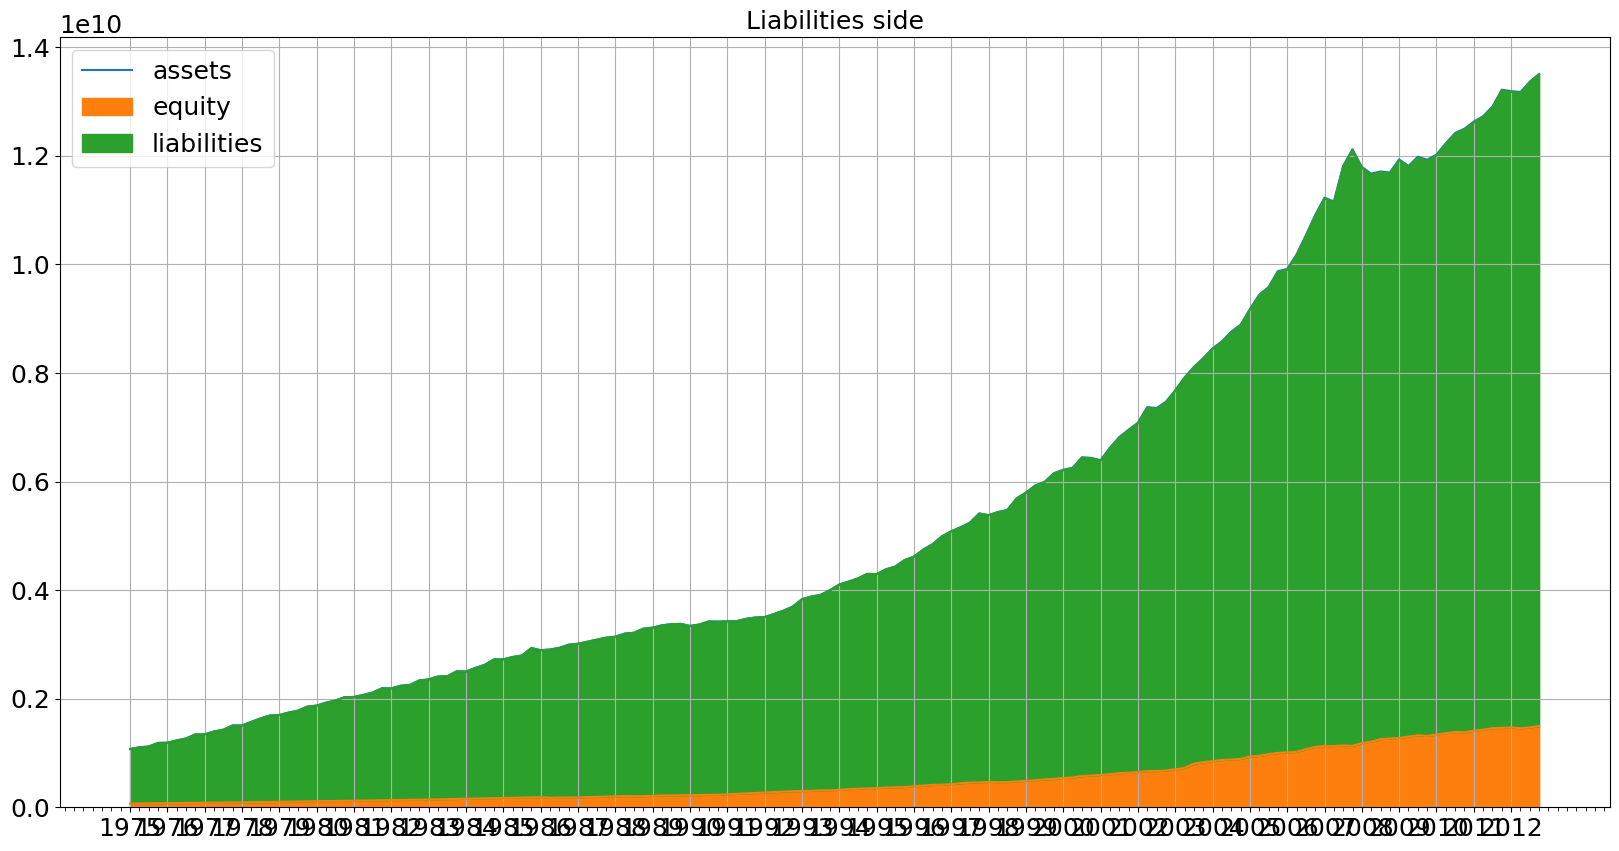

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","liabilities"])
ax.legend()
ax.grid()

Analysing assets side:

In [33]:
df = df_raw[["rssdid","bhcid",  "name", 'year', "quarter","assets", "cash"
             ,"fedfundsrepoasset" ,"securities","loansnet", "tradingassets"]]
df = df[(df.rssdid!=1456501) & (df.bhcid!=2380443)] #removing 2 Goldman Sachs and Morgan Stanley
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherassets"] = df_agg["assets"] - (df_agg.iloc[:,5:10].sum(axis=1))
#df_agg.iloc[:,5:11]


In [34]:
df_agg

year  quarter        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets
0    1976.0      1.0  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07
1    1976.0      2.0  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07
2    1976.0      3.0  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07
3    1976.0      4.0  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07
4    1977.0      1.0  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07
5    1977.0      2.0  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07
6    1977.0      3.0  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07
7    1977.0      4.0  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07
8    1978.0      1.0  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07
9    1978.0      2.0  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07
10   1978.0      3.0  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07
11   1978.0      4.0  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07
12   1979.0      1.0  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07
13   1979.0      2.0  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08
14   1979.0      3.0  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08
15   1979.0      4.0  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08
16   1980.0      1.0  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08
17   1980.0      2.0  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08
18   1980.0      3.0  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08
19   1980.0      4.0  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08
20   1981.0      1.0  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08
21   1981.0      2.0  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         72471117.0  3.271157e+08  1.028881e+09            0.0  1.539774e+08
22   1981.0      3.0  7.409360e+09  6.059058e+09  1.966138e+09  3.361760e+08         72501641.0  3.315889e+08  1.063394e+09            0.0  1.624773e+08
23   1981.0      4.0  7.390566e+09  6.336821e+09  2.028818e+09  3.274177e+08         91010685.0  3.382640e+08  1.103819e+09            0.0  1.683060e+08
24   1982.0      1.0  7.392721e+09  6.589202e+09  2.031773e+09  3.132988e+08         88633552.0  3.403949e+08  1.114602e+09            0.0  1.748435e+08
25   1982.0      2.0  7.40628

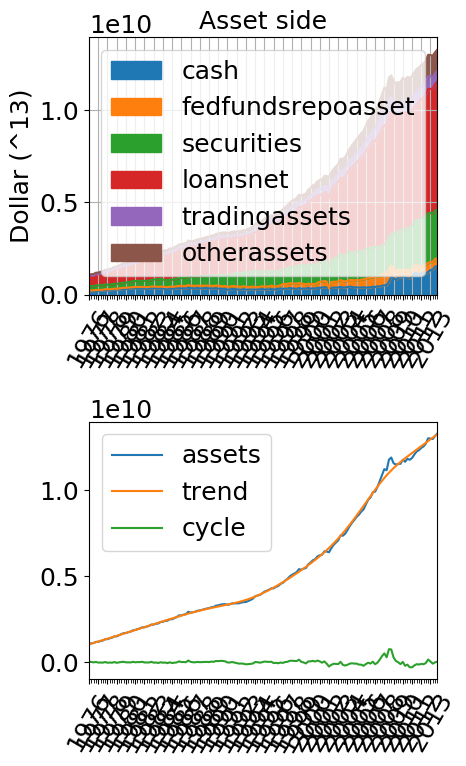

In [35]:
fig, ax = plt.subplots(2,1,figsize=(5,8))
ax.ravel()

#Graph 1
years = [str(year) for year in range(1976, 2014)]
ax[0].set_xticks(range(0,152,4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].set_title("Asset side")
ax[0].set_ylabel("Dollar (^13)")
df_agg.plot.area(ax=ax[0], y=["cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "otherassets"])
ax[0].set_xticklabels(years, rotation=60)
#ax[0].legend()
ax[0].grid()
ax[0].set_xlim(0, 151)


#Graph 2
cycle, trend = sm.tsa.filters.hpfilter(df_agg.assets, 1600)
assets_decomp = df_agg[["assets"]]
assets_decomp["cycle"] = cycle
assets_decomp["trend"] = trend
assets_decomp[["assets", "trend", "cycle"]].plot(ax=ax[1])

years = [str(year) for year in range(1975,2014)]
ax[1].set_xticklabels(years, rotation=60)
ax[1].set_xlim(0,151)
ax[1].xaxis.set_major_locator(MultipleLocator(4))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))


plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_AssetDistribution_7613.png')

Same graph, but transformed with log

#Log data
df_agg_log = np.log(df_agg)

fig, ax = plt.subplots(3,1,figsize=(20,15))
ax.ravel()

#Graph 1
years = [str(year) for year in range(1976, 2014)]
ax[0].set_xticks(range(0,152,4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].set_title("Asset side")
ax[0].set_ylabel("Dollar (^13)")
df_agg_log.plot.area(ax=ax[0], y=["cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "otherassets"])
ax[0].set_xticklabels(years, rotation=60)
ax[0].legend()
ax[0].grid()
ax[0].set_xlim(0, 151)


#Graph 2
cycle, trend = sm.tsa.filters.hpfilter(df_agg_log, 1600)
assets_decomp["assets"] = df_agg_log.assets
assets_decomp["cycle"] = cycle
assets_decomp["trend"] = trend
assets_decomp[["assets"]].plot(ax=ax[1])
assets_decomp[["cycle"]].plot(ax=ax[2])
#df_agg_log.plot(ax=ax[1])

years = [str(year) for year in range(1975,2014)]
ax[1].set_xticklabels(years, rotation=60)
ax[1].set_xlim(0,151)
ax[1].xaxis.set_major_locator(MultipleLocator(4))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))


plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_AssetDistributionLog_7613.png')

In [38]:
df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_agg.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_agg[columnName]/df_agg.assets
    
    
df_agg_share.drop(['shareyear', 'sharequarter', "sharerssdid" , "shareassets", "sharebhcid"], axis=1, inplace=True)

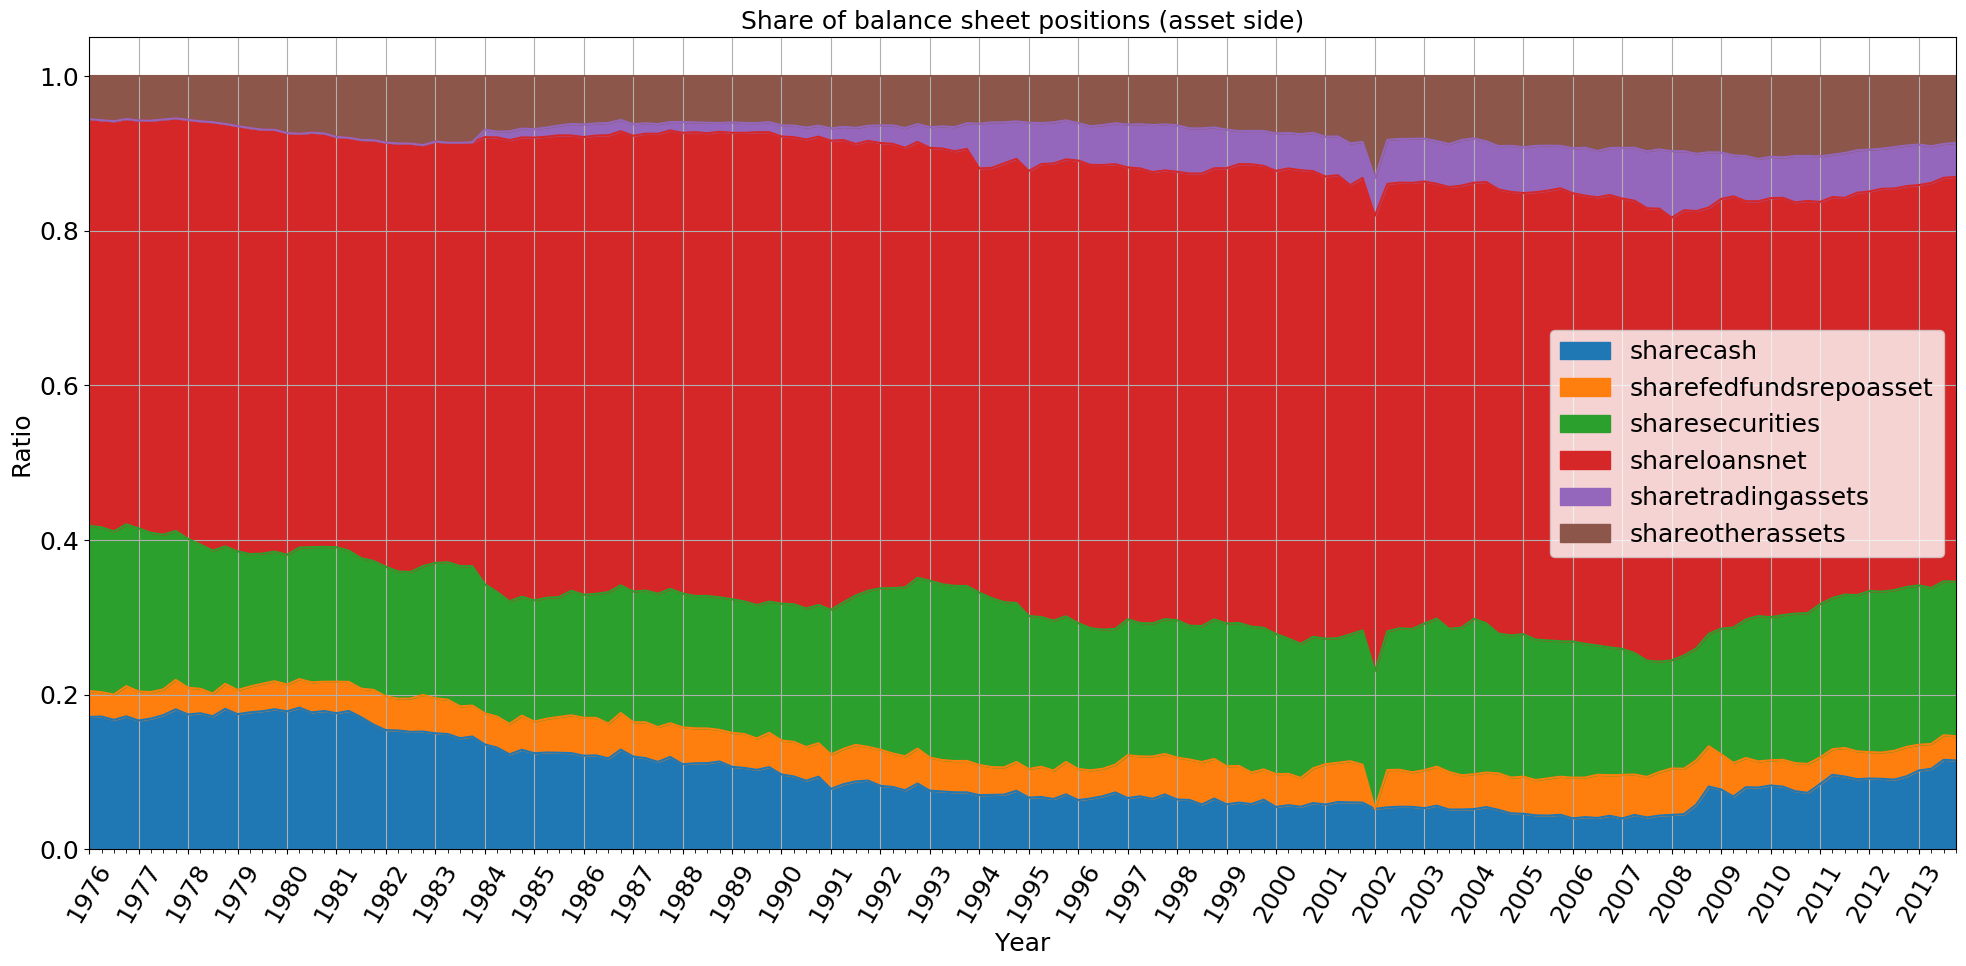

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (asset side)")
ax.set_ylabel("Ratio")
ax.set_xlabel("Year")
#df_agg.assets.plot(ax=ax)
df_agg_share.plot.area(ax=ax)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.grid()
ax.set_xlim(0, 151)
plt.tight_layout()
#plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofAssets_7613.png')

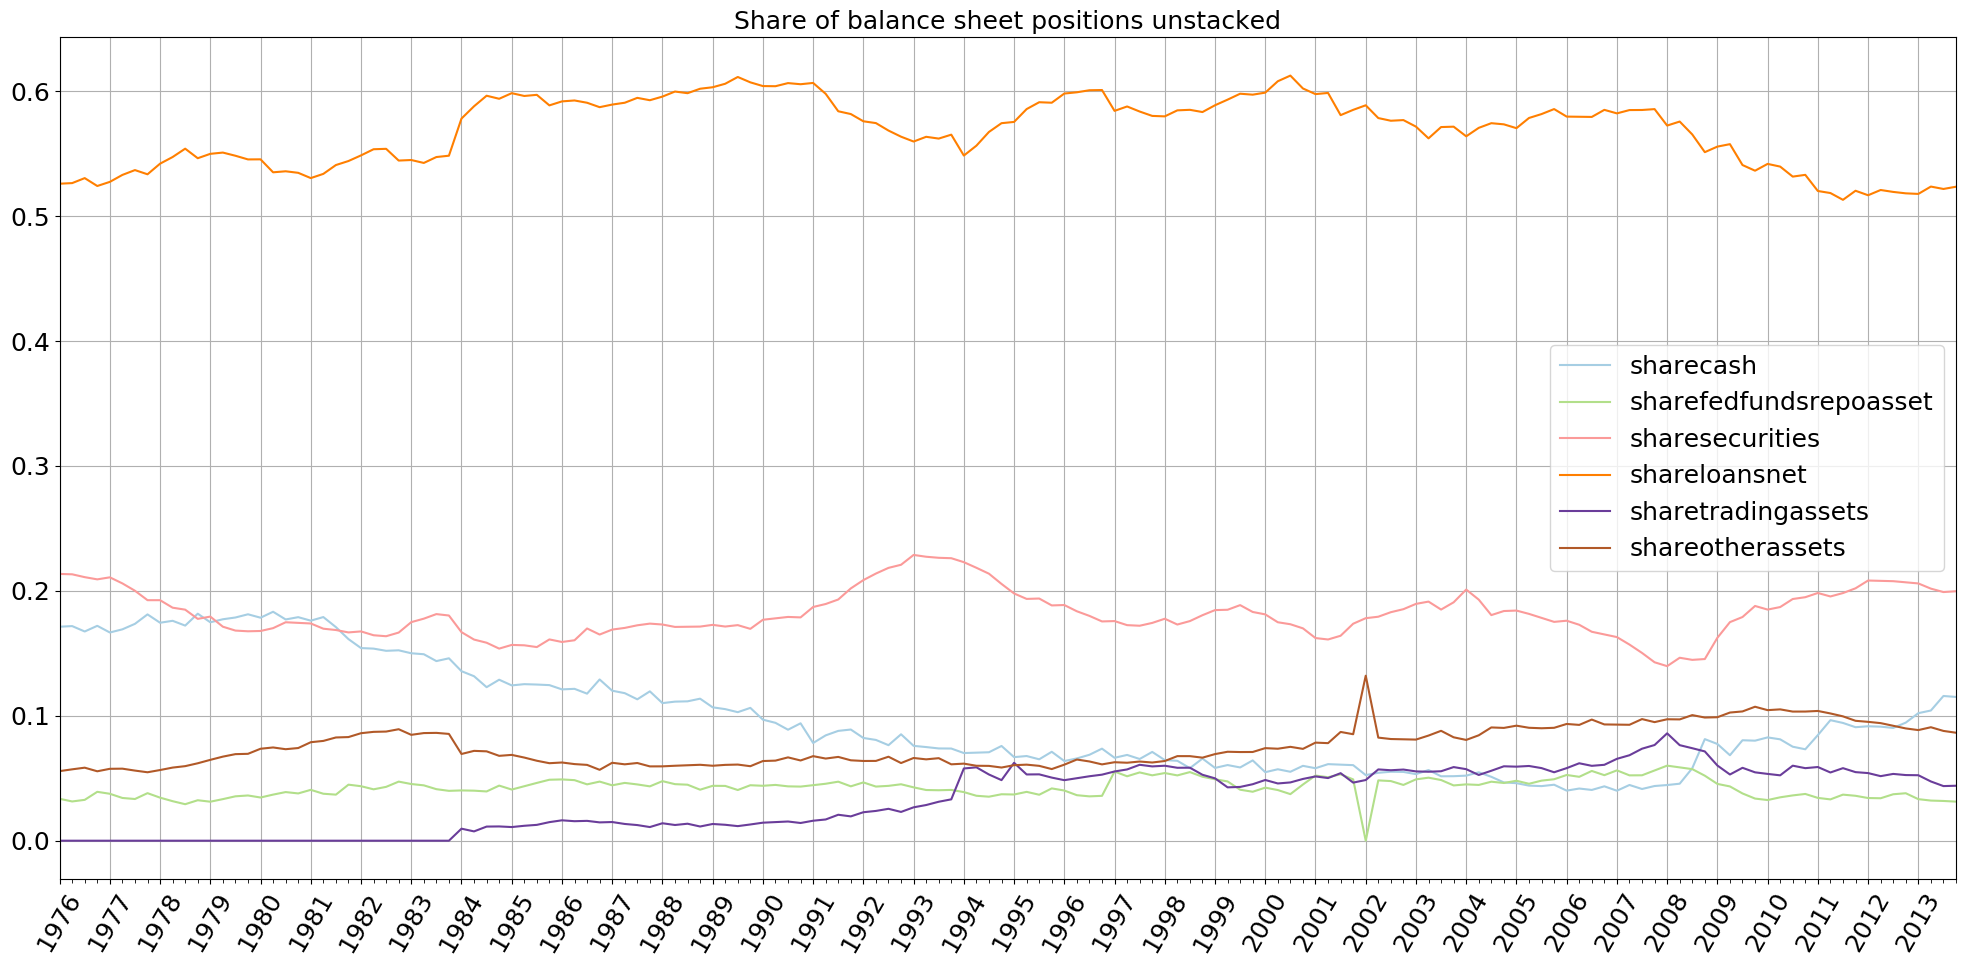

In [40]:
fig, ax = plt.subplots(figsize=(20,10))

df_agg_share.plot(ax=ax, colormap=viridis)
ax.legend()
#ax[2].legend(df_agg_share.columns)

ax.set_xlim(0,151)

ax.set_xticks(range(0,152,4))

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax.grid(True)
years = [str(year) for year in range(1976, 2014)]
ax.set_xticklabels(years, rotation=60)
ax.set_title("Share of balance sheet positions unstacked")
plt.tight_layout()
#plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofAssetsPlot_7613.png')

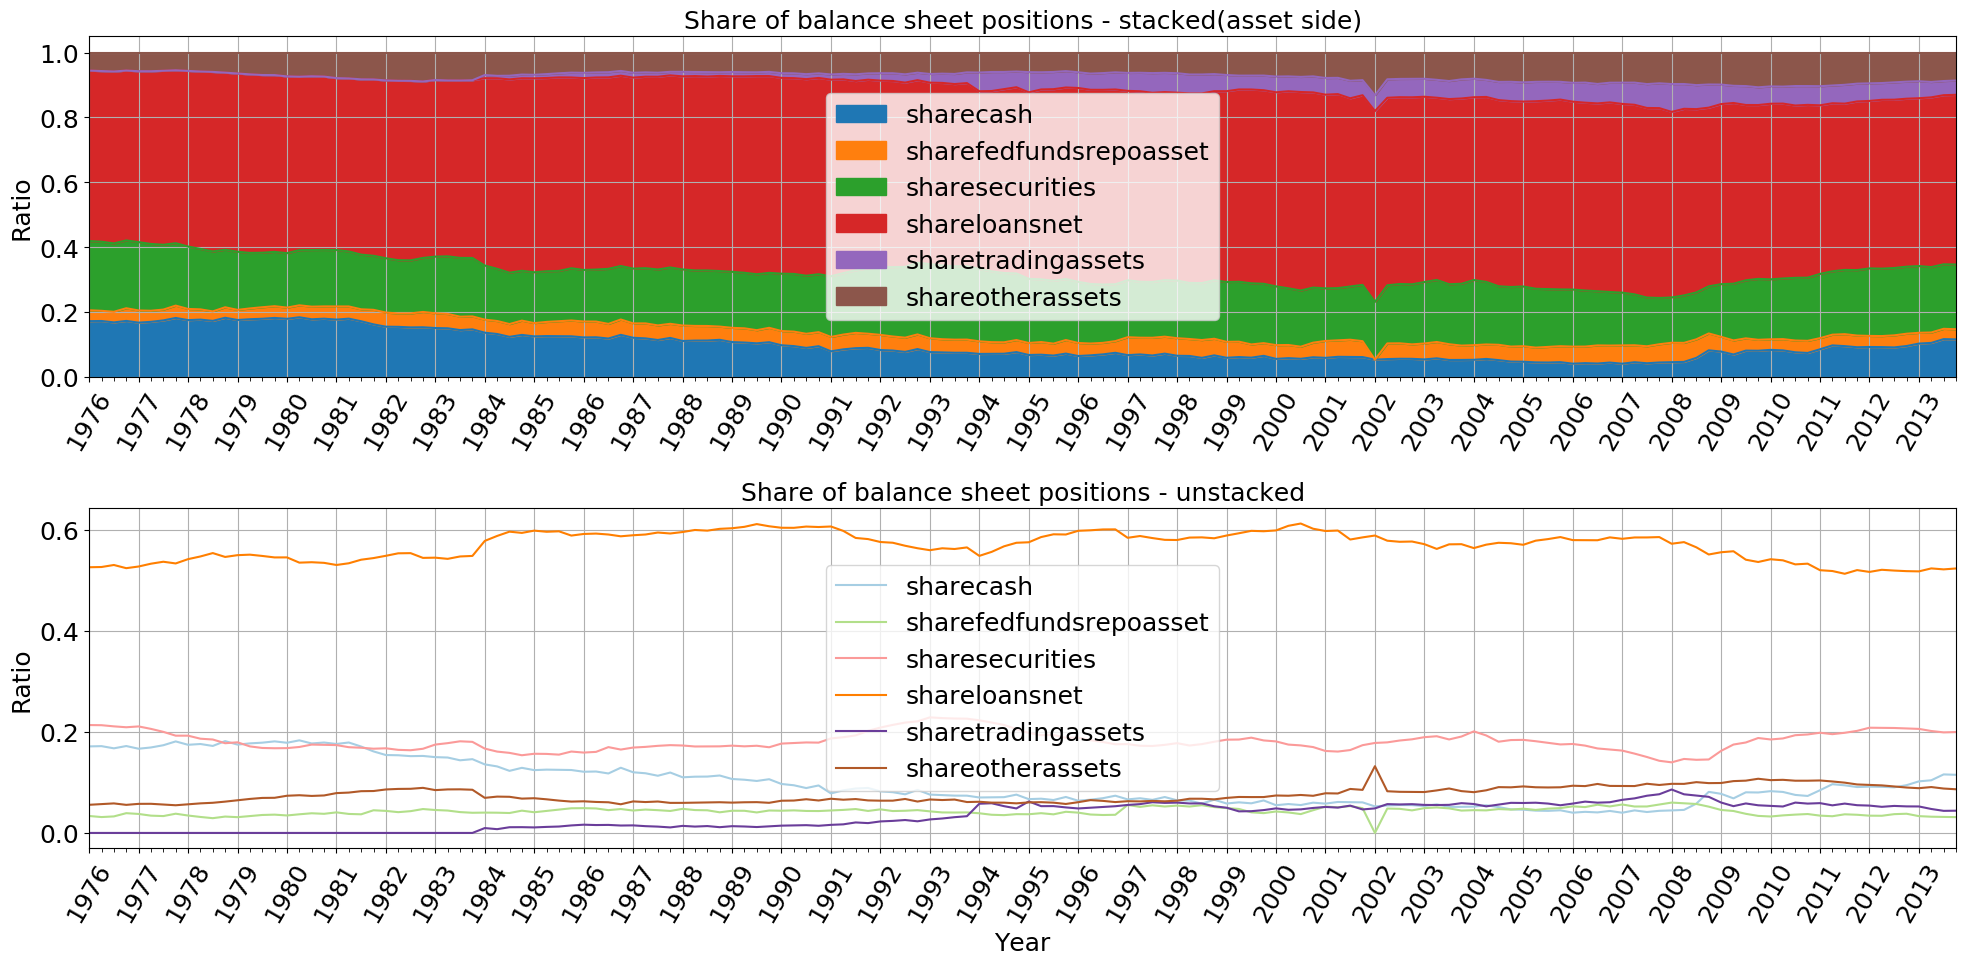

In [41]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
ax.ravel()


#Graph 1
years = [str(year) for year in range(1976, 2014)]
ax[0].set_xticks(range(0,152,4))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].set_title("Share of balance sheet positions - stacked(asset side)")
ax[0].set_ylabel("Ratio")
#df_agg.assets.plot(ax=ax)
df_agg_share.plot.area(ax=ax[0])
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax[0].set_xticklabels(years, rotation=60)
ax[0].legend()
ax[0].grid()
ax[0].set_xlim(0, 151)

#Graph 2
df_agg_share.plot(ax=ax[1], colormap=viridis)
ax[1].legend()
ax[1].set_xlim(0,151)

ax[1].set_xticks(range(0,152,4))

ax[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
ax[1].grid(True)
years = [str(year) for year in range(1976, 2014)]
ax[1].set_xticklabels(years, rotation=60)
ax[1].set_title("Share of balance sheet positions - unstacked")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Ratio")
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofAssetsPlot_7613.png')

Datasets for top 0.1%, 1%, 5%, 50%

In [42]:
year = 1976

topOnePercent = pd.DataFrame()
topFivePercent = pd.DataFrame()
topTenPercent = pd.DataFrame()
topFiftyPercent = pd.DataFrame()

topZeroOnePercentCount = []
topOnePercentCount = []
topTenPercentCount = []
topFiftyPercentCount = []
allCount = []


for i in range(38):
    quarter=1
    temp_df_year = df[df.year==year]
    #print(temp_df_year)
    #print(year)
    
    for j in range(4):
        #print(quarter)
        temp_df = temp_df_year[temp_df_year.quarter==quarter]
        temp_df = temp_df.sort_values(by=["assets"], ascending=False)
        onepercent = round(0.001*len(temp_df))
        fivepercent = round(0.01*len(temp_df))
        tenpercent = round(0.10*len(temp_df))
        fiftypercent = round(0.50*len(temp_df))
        #save bank counts of percentiles
        topZeroOnePercentCount.append(onepercent)
        topOnePercentCount.append(fivepercent)
        topTenPercentCount.append(tenpercent)
        topFiftyPercentCount.append(fiftypercent)
        allCount.append(len(temp_df))
        
        temp_df_One = temp_df.iloc[:onepercent,:]
        temp_df_Five = temp_df.iloc[:fivepercent, :]
        temp_df_Ten = temp_df.iloc[:tenpercent, :]
        temp_df_Fifty = temp_df.iloc[:fiftypercent, :]
        topOnePercent = topOnePercent.append(temp_df_One)
        topFivePercent = topFivePercent.append(temp_df_Five)
        topTenPercent = topTenPercent.append(temp_df_Ten)
        topFiftyPercent = topFiftyPercent.append(temp_df_Fifty)
        quarter = quarter + 1
    
    year = year + 1
    
#create dataframe out of count arrays
data = {"Top 0.1%" : topZeroOnePercentCount, 
        "Top 1%" : topOnePercentCount, 
        "Top 10%" : topTenPercentCount, 
        "Top 50%" : topFiftyPercentCount,
        "Total all banks" : allCount
       }

bankCounts_df = pd.DataFrame(data)




In [43]:
bankCounts_df

Top 0.1%  Top 1%  Top 10%  Top 50%  Total all banks
0          14     144     1437     7184            14367
1          14     144     1440     7199            14398
2          14     144     1439     7194            14388
3          14     144     1442     7210            14419
4          14     144     1440     7202            14405
5          14     144     1445     7223            14446
6          14     144     1442     7209            14418
7          14     144     1442     7208            14417
8          14     144     1437     7184            14369
9          14     144     1438     7189            14378
10         14     144     1438     7192            14385
11         14     144     1437     7187            14374
12         14     144     1437     7184            14367
13         14     144     1435     7176            14352
14         14     144     1438     7190            14380
15         14     143     1435     7174            14348
16         14     144     1437     7186            14373
17         14     144     1439     7194            14388
18         14     144     1441     7204            14407
19         14     144     1442     7208            14417
20         14     144     1442     7212            14425
21         14     144     1444     7220            14440
22         14     144     1444     7218            14435
23         14     144     1440     7200            14400
24         14     144     1440     7200            14400
25         14     144     1441     7205            14410
26         14     144     1444     7218            14437
27         14     144     1442     7212            14423
28         14     145     1446     7232            14465
29         14     145     1448     7238            14477
30         14     144     1444     7218            14435
31         14     144     1438     7192            14383
32         14     144     1440     7200            14399
33         14     144     1438     7190            14381
34         14     144     1439     7194            14388
35         14     144     1439     7194            14389
36         14     144     1438     7188            14377
37         14     144     1436     7178            14355
38         14     143     1434     7170            14341
39         14     143     1428     7138            14276
40         14     142     1425     7124            14249
41         14     142     1418     7090            14179
42         14     142     1417     7086            14173
43         14     141     1407     7033            14066
44         14     139     1395     6973            13946
45         14     138     1382     6910            13820
46         14     137     1372     6860            13721
47         14     136     1355     6777            13554
48         13     134     1340     6699            13398
49         13     133     1327     6634            13267
50         13     131     1310     6548            13096
51         13     130     1298     6491            12982
52         13     129     1286     6432            12864
53         13     128     1281     6404            12809
54         13     127     1269     6344            12689
55         13     126     1257     6286            12572
56         12     125     1246     6229            12458
57         12     124     1237     6184            12369
58         12     123     1228     6140            12279
59         12     122     1221     6106            12212
60         12     121     1212     6058            12117
61         12     120     1203     6014            12027
62         12     119     1195     5973            11946
63         12     118     1181     5904            11807
64         12     117     1170     5848            11695
65         12     116     1158     5788            11576
66         11     115     1149     5744            11487
67         11     114     1136     5682            11363
68         11     112     1124     5618            11236
69         11  

In [44]:
banks_everyfourthquarter = bankCounts_df.iloc[3::4,:]

years = [str(year) for year in range(1976,2014)]

banks_everyfourthquarter.set_index(pd.Index(years), "year", inplace=True)
#banks_everyfourthquarter

banks_everyfourthquarter.iloc[0::4,:]



Top 0.1%  Top 1%  Top 10%  Top 50%  Total all banks
1976        14     144     1442     7210            14419
1980        14     144     1442     7208            14417
1984        14     144     1439     7194            14389
1988        13     130     1298     6491            12982
1992        11     114     1136     5682            11363
1996         9      95      946     4732             9464
2000         8      83      825     4126             8252
2004         8      76      757     3784             7567
2008         7      70      702     3511             7022
2012         6      60      604     3018             6035

In [45]:
df_aggOnePercent = topOnePercent.groupby(["year", "quarter"]).sum()
df_aggFivePercent = topFivePercent.groupby(["year", "quarter"]).sum()
df_aggTenPercent = topTenPercent.groupby(["year", "quarter"]).sum()
df_aggFiftyPercent = topFiftyPercent.groupby(["year", "quarter"]).sum()

df_aggOnePercent

rssdid       bhcid        assets         cash  fedfundsrepoasset    securities      loansnet  tradingassets
year   quarter                                                                                                                
1976.0 1.0      6535757.0  14591644.0  3.491325e+08   87045246.0          4308002.0  3.528963e+07  1.954496e+08            0.0
       2.0      6535757.0  14591644.0  3.593915e+08   88716396.0          5918778.0  3.576165e+07  1.995210e+08            0.0
       3.0      6535757.0  14591644.0  3.632950e+08   88502319.0          5981483.0  3.549551e+07  2.031777e+08            0.0
       4.0      6535757.0  14591644.0  3.853249e+08   94608382.0          6048979.0  3.916268e+07  2.162038e+08            0.0
1977.0 1.0      6535757.0  14591644.0  3.876417e+08   93990052.0          8730545.0  3.802172e+07  2.146663e+08            0.0
       2.0      6535757.0  14591644.0  4.031120e+08   97836522.0          8856163.0  3.987126e+07  2.231225e+08            0.0
       3.0      6535757.0  14591644.0  4.187018e+08  107231376.0          8025745.0  4.001886e+07  2.305445e+08            0.0
       4.0      6535757.0  14591644.0  4.411731e+08  111343491.0          7927821.0  4.044998e+07  2.478269e+08            0.0
1978.0 1.0      6535757.0  14591644.0  4.450093e+08  114278334.0          9166972.0  3.894872e+07  2.477910e+08            0.0
       2.0      6535757.0  14591644.0  4.636093e+08  118464318.0         10887955.0  3.776763e+07  2.577631e+08            0.0
       3.0      6535757.0  14591644.0  4.780365e+08  120239328.0          9029187.0  3.877137e+07  2.687287e+08            0.0
       4.0      6535757.0  14591644.0  5.018763e+08  127070516.0          8423629.0  3.993266e+07  2.822974e+08            0.0
1979.0 1.0      6535757.0  14591644.0  5.088788e+08  130013311.0          9930431.0  4.077397e+07  2.813473e+08            0.0
       2.0      6535757.0  14591644.0  5.325349e+08  135613694.0         11243177.0  3.888977e+07  2.942607e+08            0.0
       3.0      6535757.0  14591644.0  5.622049e+08  146053976.0         11330162.0  4.035894e+07  3.079414e+08            0.0
       4.0      6535757.0  14591644.0  5.758526e+08  144801079.0          8648532.0  4.099419e+07  3.229466e+08            0.0
1980.0 1.0      5999409.0  14821025.0  5.816481e+08  148168187.0          9257737.0  3.863430e+07  3.233616e+08            0.0
       2.0      6800419.0  14856474.0  6.021761e+08  152915513.0          8438012.0  4.291020e+07  3.345330e+08            0.0
       3.0      6535757.0  14811250.0  6.084926e+08  147256138.0          8974109.0  4.418475e+07  3.438830e+08            0.0
       4.0      6535757.0  14811250.0  6.319115e+08  149094648.0          9877893.0  4.436239e+07  3.605654e+08            0.0
1981.0 1.0      6535757.0  14811250.0  6.419680e+08  148791136.0         13646762.0  4.353020e+07  3.626466e+08            0.0
       2.0      6255868.0  14604756.0  6.602731e+08  157232152.0         12283800.0  4.346073e+07  3.722187e+08            0.0
       3.0      5999409.0  14821025.0  6.831100e+08  159122129.0         13454597.0  4.210234e+07  3.895928e+08            0.0
       4.0      7056878.0  14860423.0  6.769385e+08  123965213.0         16520151.0  4.246658e+07  4.100072e+08            0.0
1982.0 1.0      7056878.0  14860423.0  6.744282e+08  122839188.0         11944490.0  4.192019e+07  4.104972e+08            0.0
       2.0      7056878.0  14860423.0  6.829592e+08  116517224.0         16967873.0  4.019719e+07  4.206581e+08            0.0
       3.0      7056878.0  14860423.0  6.985462e+08  114302509.0         21997509.0  4.080975e+07  4.314534e+08            0.0
       4.0      7056878.0  14860423.0  7.101426e+08  112559188.0         15502707.0  4.308580e+07  4.392377e+08            0.0
1983.0 1.0      6535757.0  15031468.0  6.951887e+08  111767694.0         15183498.0  4.310013e+07  4.356225e+08            0.0
       2.0      6535757.0  15031468.0  7.067330e+08  113562446.0         21113219.

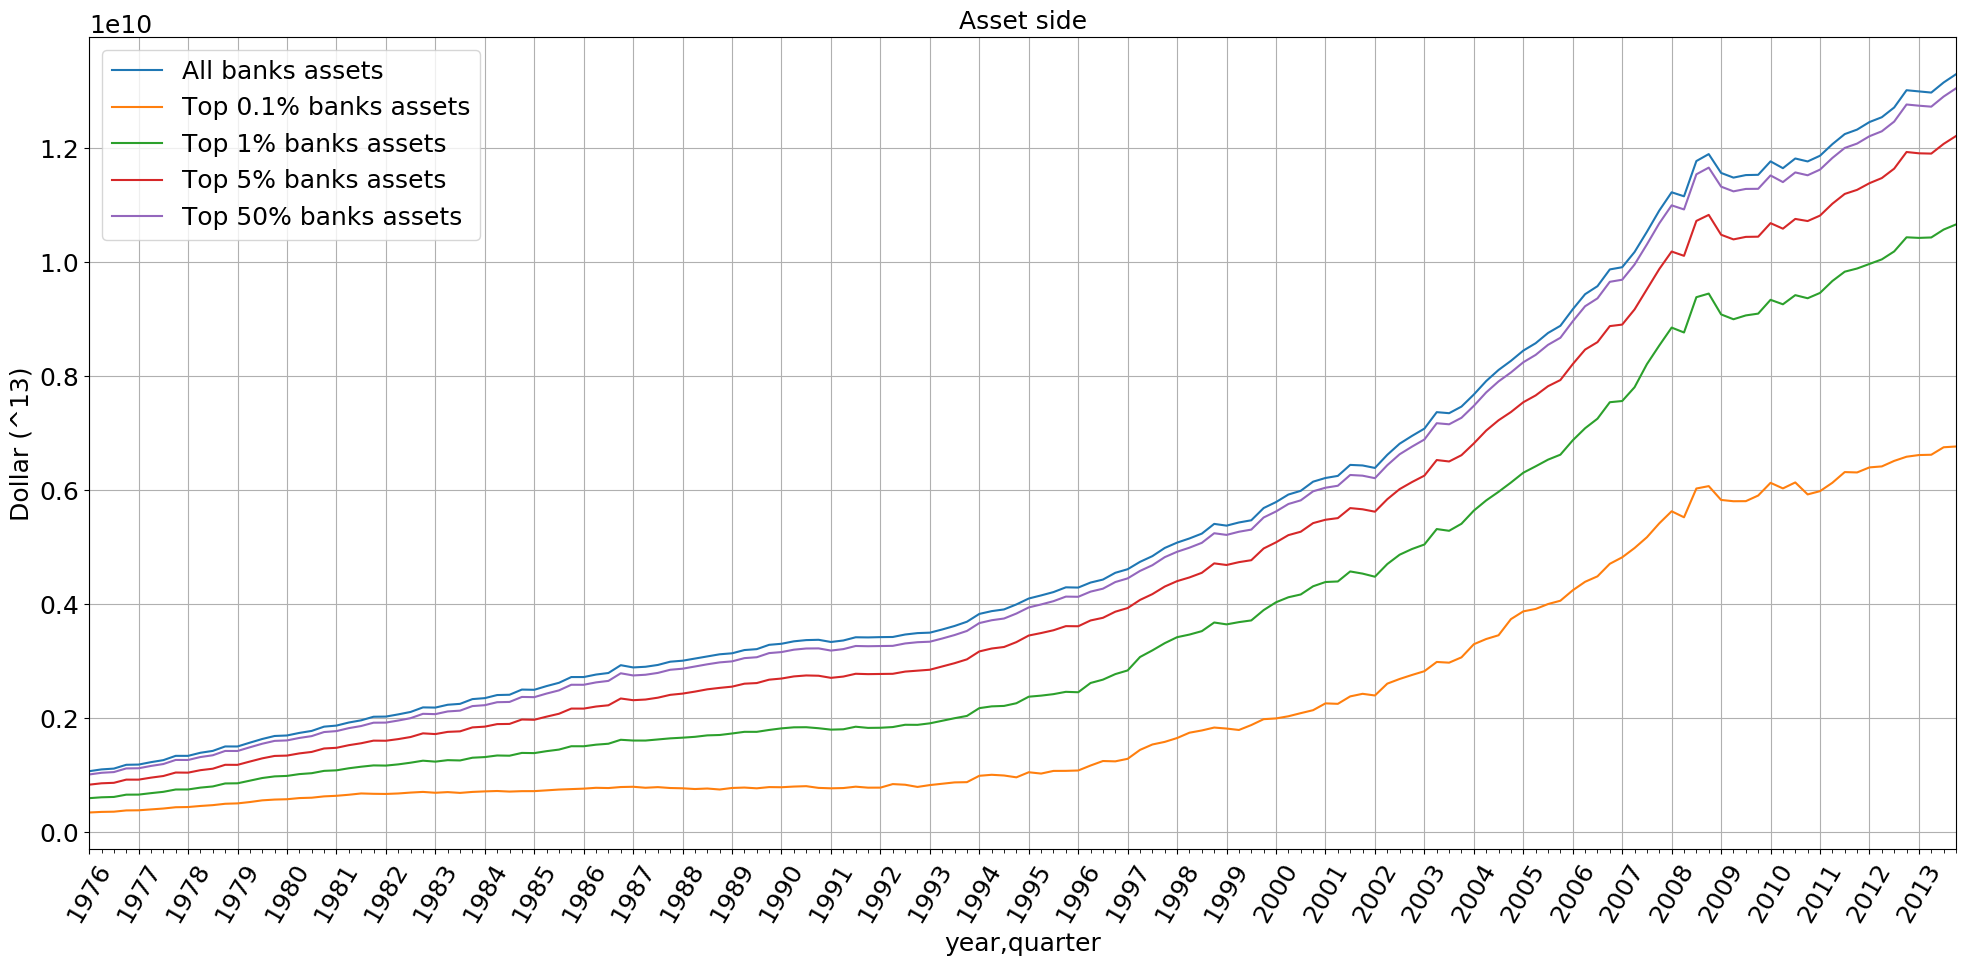

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^13)")
df_agg.assets.plot(ax=ax)
df_aggOnePercent.assets.plot(ax=ax) # actually 0.1%
df_aggFivePercent.assets.plot(ax=ax) # actually 1%
df_aggTenPercent.assets.plot(ax=ax)
df_aggFiftyPercent.assets.plot(ax=ax) 
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["All banks assets","Top 0.1% banks assets", "Top 1% banks assets", "Top 5% banks assets", "Top 50% banks assets"])
ax.grid()
ax.set_xlim(0, 151)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksPercentiles_7613.png')

Share of different banks percentiles

In [47]:
df_aggOnePercent.assets

year    quarter
1976.0  1.0        3.491325e+08
        2.0        3.593915e+08
        3.0        3.632950e+08
        4.0        3.853249e+08
1977.0  1.0        3.876417e+08
        2.0        4.031120e+08
        3.0        4.187018e+08
        4.0        4.411731e+08
1978.0  1.0        4.450093e+08
        2.0        4.636093e+08
        3.0        4.780365e+08
        4.0        5.018763e+08
1979.0  1.0        5.088788e+08
        2.0        5.325349e+08
        3.0        5.622049e+08
        4.0        5.758526e+08
1980.0  1.0        5.816481e+08
        2.0        6.021761e+08
        3.0        6.084926e+08
        4.0        6.319115e+08
1981.0  1.0        6.419680e+08
        2.0        6.602731e+08
        3.0        6.831100e+08
        4.0        6.769385e+08
1982.0  1.0        6.744282e+08
        2.0        6.829592e+08
        3.0        6.985462e+08
        4.0        7.101426e+08
1983.0  1.0        6.951887e+08
        2.0        7.067330e+08
        3.0        6.929

In [48]:

df_agg_share_percentiles = pd.DataFrame()

#remove indexes
ZeroOnePercentAssets = df_aggOnePercent.assets.copy()
OnePercentAssets = df_aggFivePercent.assets.copy()
TenOnePercentAssets = df_aggTenPercent.assets.copy()
FiftyPercentAssets = df_aggFiftyPercent.assets.copy()

ZeroOnePercentAssets.reset_index(drop=True,inplace=True)
OnePercentAssets.reset_index(drop=True,inplace=True)
TenOnePercentAssets.reset_index(drop=True,inplace=True)
FiftyPercentAssets.reset_index(drop=True,inplace=True)

df_agg_share_percentiles["01Share"] = ZeroOnePercentAssets/df_agg.assets
df_agg_share_percentiles["1PercentShare"] = OnePercentAssets/df_agg.assets
df_agg_share_percentiles["10PercentShare"] = TenOnePercentAssets/df_agg.assets
df_agg_share_percentiles["50PercentShare"] = FiftyPercentAssets/df_agg.assets

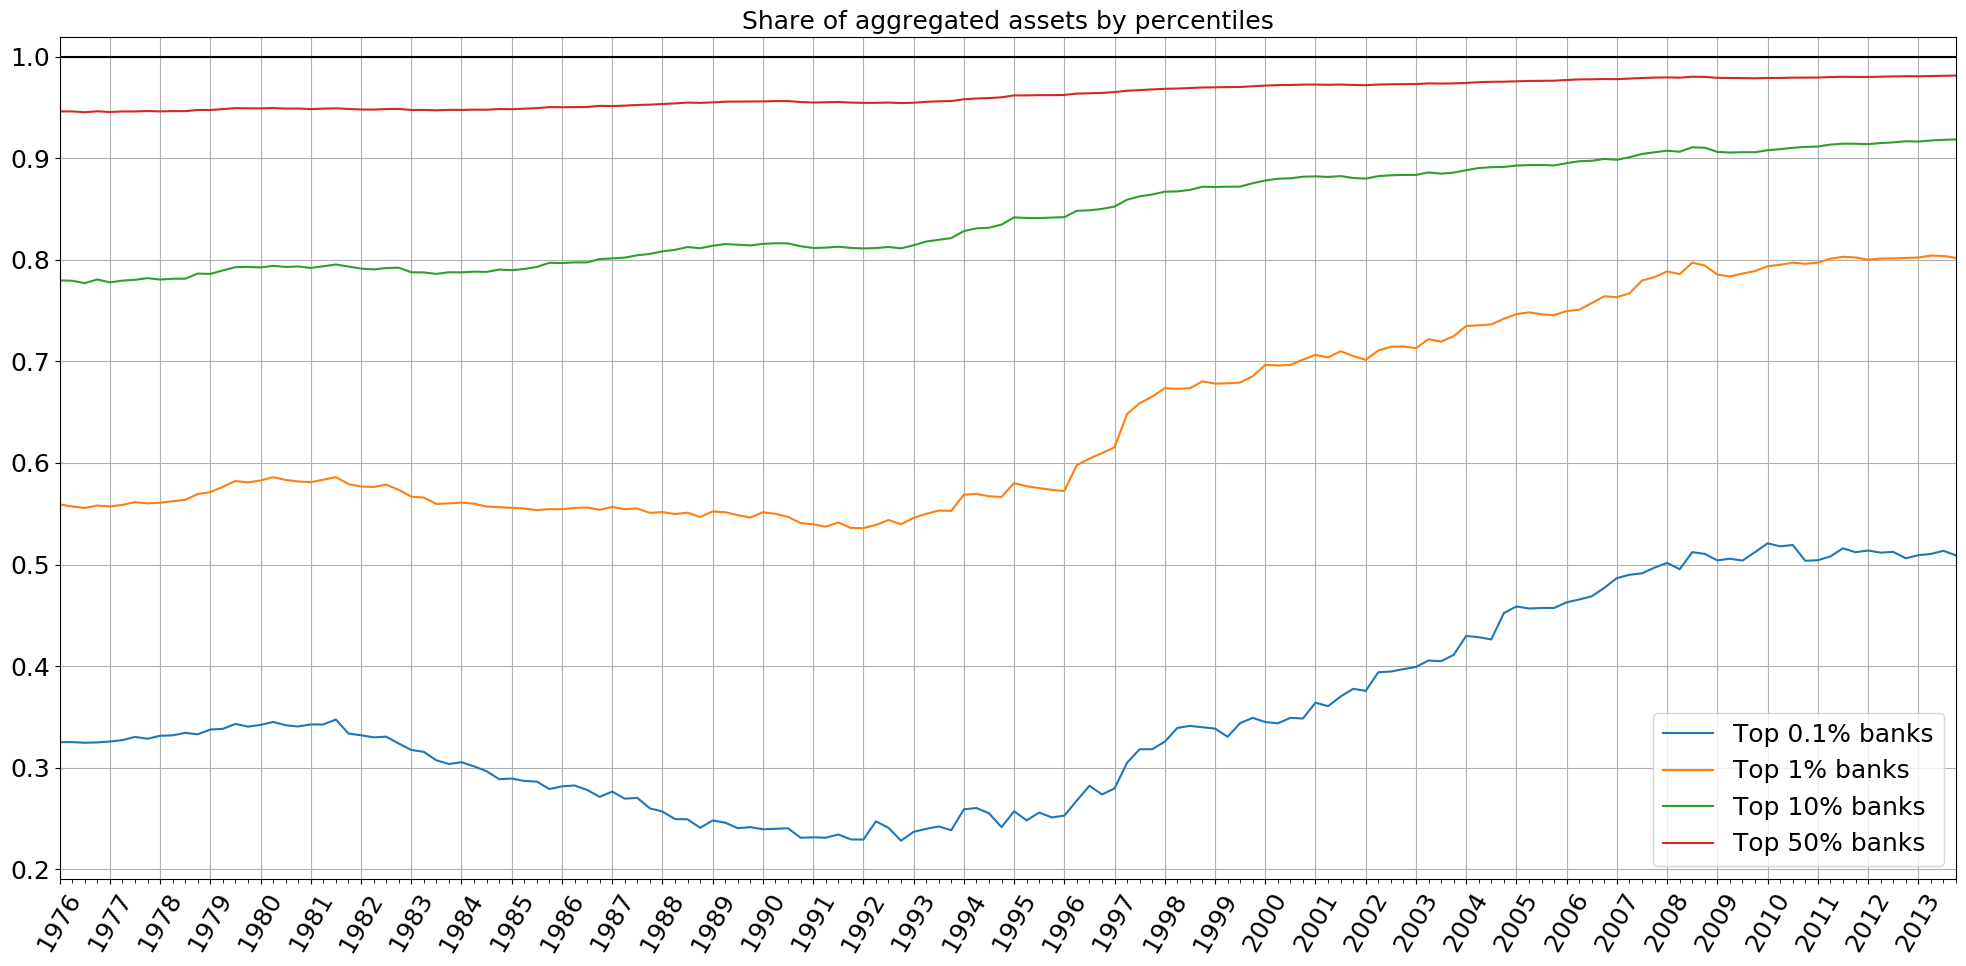

In [49]:
fig, ax = plt.subplots(figsize=(20,10))

#ax[0]
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of aggregated assets by percentiles")
ax.set_ylabel("")
#df_agg.assets.plot(ax=ax)
df_agg_share_percentiles.plot(ax=ax)

ax.axhline(y=1, color='black', linestyle='-')
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend(["Top 0.1% banks", "Top 1% banks", "Top 10% banks", "Top 50% banks"])
ax.grid(True)
ax.set_xlim(0, 151)


plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_ShareofAssetsByBanksPercentiles_7613.png')

In [75]:
result = pd.concat([df_agg_share_percentiles, bankCounts_df], axis=1, sort=False)

result = result[["Top 0.1%", "01Share", "Top 1%", "1PercentShare", "Top 10%", "10PercentShare", "Top 50%", "50PercentShare", "Total all banks"]]


result_everyfourthquarter = result.iloc[3::4,:]

years = [str(year) for year in range(1976,2014)]

result_everyfourthquarter.set_index(pd.Index(years), "year", inplace=True)
#banks_everyfourthquarter

result_everyfourthquarter.iloc[0::4,:].to_latex("LatexVorlage/graphs/Tables/LatexTables/OtherDescriptiveAnalysis_BankCounts.tex")

result_everyfourthquarter.iloc[0::4,:]

Top 0.1%   01Share  Top 1%  1PercentShare  Top 10%  10PercentShare  Top 50%  50PercentShare  Total all banks
1976        14  0.324922     144       0.558099     1442        0.780650     7210        0.946214            14419
1980        14  0.340622     144       0.581818     1442        0.793497     7208        0.948957            14417
1984        14  0.288709     144       0.556493     1439        0.790446     7194        0.948429            14389
1988        13  0.240856     130       0.546860     1298        0.811423     6491        0.954550            12982
1992        11  0.228150     114       0.539679     1136        0.811301     5682        0.954310            11363
1996         9  0.273671      95       0.609738      946        0.850118     4732        0.964386             9464
2000         8  0.348473      83       0.701729      825        0.881838     4126        0.972520             8252
2004         8  0.452258      76       0.741929      757        0.891446     3784        0.975372             7567
2008         7  0.510510      70       0.794367      702        0.910356     3511        0.980069             7022
2012         6  0.506170      60       0.801828      604        0.916754     3018        0.980764             6035

In [51]:
bankCounts_df

Top 0.1%  Top 1%  Top 10%  Top 50%  Total all banks
0          14     144     1437     7184            14367
1          14     144     1440     7199            14398
2          14     144     1439     7194            14388
3          14     144     1442     7210            14419
4          14     144     1440     7202            14405
5          14     144     1445     7223            14446
6          14     144     1442     7209            14418
7          14     144     1442     7208            14417
8          14     144     1437     7184            14369
9          14     144     1438     7189            14378
10         14     144     1438     7192            14385
11         14     144     1437     7187            14374
12         14     144     1437     7184            14367
13         14     144     1435     7176            14352
14         14     144     1438     7190            14380
15         14     143     1435     7174            14348
16         14     144     1437     7186            14373
17         14     144     1439     7194            14388
18         14     144     1441     7204            14407
19         14     144     1442     7208            14417
20         14     144     1442     7212            14425
21         14     144     1444     7220            14440
22         14     144     1444     7218            14435
23         14     144     1440     7200            14400
24         14     144     1440     7200            14400
25         14     144     1441     7205            14410
26         14     144     1444     7218            14437
27         14     144     1442     7212            14423
28         14     145     1446     7232            14465
29         14     145     1448     7238            14477
30         14     144     1444     7218            14435
31         14     144     1438     7192            14383
32         14     144     1440     7200            14399
33         14     144     1438     7190            14381
34         14     144     1439     7194            14388
35         14     144     1439     7194            14389
36         14     144     1438     7188            14377
37         14     144     1436     7178            14355
38         14     143     1434     7170            14341
39         14     143     1428     7138            14276
40         14     142     1425     7124            14249
41         14     142     1418     7090            14179
42         14     142     1417     7086            14173
43         14     141     1407     7033            14066
44         14     139     1395     6973            13946
45         14     138     1382     6910            13820
46         14     137     1372     6860            13721
47         14     136     1355     6777            13554
48         13     134     1340     6699            13398
49         13     133     1327     6634            13267
50         13     131     1310     6548            13096
51         13     130     1298     6491            12982
52         13     129     1286     6432            12864
53         13     128     1281     6404            12809
54         13     127     1269     6344            12689
55         13     126     1257     6286            12572
56         12     125     1246     6229            12458
57         12     124     1237     6184            12369
58         12     123     1228     6140            12279
59         12     122     1221     6106            12212
60         12     121     1212     6058            12117
61         12     120     1203     6014            12027
62         12     119     1195     5973            11946
63         12     118     1181     5904            11807
64         12     117     1170     5848            11695
65         12     116     1158     5788            11576
66         11     115     1149     5744            11487
67         11     114     1136     5682            11363
68         11     112     1124     5618            11236
69         11  

In [52]:
df_agg_share_percentiles

01Share  1PercentShare  10PercentShare  50PercentShare
0    0.325187       0.559245        0.779700        0.946187
1    0.325201       0.557200        0.779396        0.946095
2    0.324591       0.555734        0.777094        0.945331
3    0.324922       0.558099        0.780650        0.946214
4    0.325791       0.557207        0.777820        0.945541
5    0.327133       0.558746        0.779527        0.946050
6    0.330326       0.561450        0.780308        0.946079
7    0.328521       0.560258        0.781978        0.946509
8    0.331425       0.560834        0.780553        0.946116
9    0.331876       0.562397        0.781389        0.946396
10   0.334337       0.563676        0.781397        0.946371
11   0.332866       0.569369        0.786445        0.947574
12   0.337603       0.571358        0.786126        0.947511
13   0.338270       0.576515        0.789550        0.948431
14   0.343114       0.582205        0.792772        0.949307
15   0.340453       0.580903        0.793010        0.949181
16   0.342107       0.582785        0.792488        0.949088
17   0.345055       0.585967        0.794067        0.949429
18   0.341793       0.583316        0.792971        0.948876
19   0.340622       0.581818        0.793497        0.948957
20   0.342639       0.581107        0.792006        0.948438
21   0.342552       0.583539        0.793728        0.948839
22   0.347438       0.586090        0.795377        0.949129
23   0.333662       0.579251        0.793424        0.948531
24   0.331941       0.576790        0.791358        0.948009
25   0.329897       0.576404        0.790573        0.947930
26   0.330586       0.578646        0.791865        0.948392
27   0.323840       0.573596        0.792341        0.948596
28   0.317487       0.566906        0.787745        0.947501
29   0.315630       0.565951        0.787575        0.947612
30   0.307281       0.559656        0.786142        0.947206
31   0.303659       0.560236        0.787786        0.947622
32   0.305435       0.560966        0.787655        0.947545
33   0.301340       0.559932        0.788389        0.947852
34   0.296539       0.557115        0.788101        0.947796
35   0.288709       0.556493        0.790446        0.948429
36   0.289307       0.555973        0.789773        0.948318
37   0.287011       0.555207        0.791038        0.948874
38   0.286336       0.553545        0.793010        0.949323
39   0.278964       0.554617        0.797070        0.950367
40   0.281663       0.554487        0.796850        0.950256
41   0.282502       0.555753        0.797474        0.950316
42   0.278193       0.556223        0.797470        0.950474
43   0.271256       0.553914        0.800805        0.951594
44   0.276553       0.556804        0.801393        0.951359
45   0.269515       0.554497        0.802189        0.951810
46   0.270336       0.555198        0.804512        0.952446
47   0.259987       0.550907        0.805803        0.952772
48   0.256867       0.551690        0.808385        0.953399
49   0.249434       0.549737        0.809851        0.954003
50   0.249202       0.551069        0.812614        0.954784
51   0.240856       0.546860        0.811423        0.954550
52   0.248036       0.552241        0.813824        0.954975
53   0.245880       0.551528        0.815525        0.955709
54   0.240510       0.548691        0.814883        0.955840
55   0.241509       0.546213        0.814211        0.955895
56   0.239408       0.551520        0.815699        0.955975
57   0.239882       0.549919        0.816365        0.956247
58   0.240384       0.546957        0.816162        0.956301
59   0.231053       0.540840        0.813395        0.955364
60   0.231484       0.539685        0.811664        0.954866
61   0.231076       0.537242        0.812015        0.955066
62   0.234303       0.541561        0.812931        0.955355
63   0.229417       0.536016        0.811735        0.954812
64   0.229233       0.535865        0.811

Assets growth trend

In [53]:
df_agg

year  quarter        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets
0    1976.0      1.0  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07
1    1976.0      2.0  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07
2    1976.0      3.0  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07
3    1976.0      4.0  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07
4    1977.0      1.0  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07
5    1977.0      2.0  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07
6    1977.0      3.0  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07
7    1977.0      4.0  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07
8    1978.0      1.0  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07
9    1978.0      2.0  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07
10   1978.0      3.0  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07
11   1978.0      4.0  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07
12   1979.0      1.0  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07
13   1979.0      2.0  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08
14   1979.0      3.0  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08
15   1979.0      4.0  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08
16   1980.0      1.0  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08
17   1980.0      2.0  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08
18   1980.0      3.0  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08
19   1980.0      4.0  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08
20   1981.0      1.0  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08
21   1981.0      2.0  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         72471117.0  3.271157e+08  1.028881e+09            0.0  1.539774e+08
22   1981.0      3.0  7.409360e+09  6.059058e+09  1.966138e+09  3.361760e+08         72501641.0  3.315889e+08  1.063394e+09            0.0  1.624773e+08
23   1981.0      4.0  7.390566e+09  6.336821e+09  2.028818e+09  3.274177e+08         91010685.0  3.382640e+08  1.103819e+09            0.0  1.683060e+08
24   1982.0      1.0  7.392721e+09  6.589202e+09  2.031773e+09  3.132988e+08         88633552.0  3.403949e+08  1.114602e+09            0.0  1.748435e+08
25   1982.0      2.0  7.40628

In [54]:
df_agg_ts = df_agg.copy()
#index = pd.DatetimeIndex(start='1976Q1', end='2014Q1', freq='Q')
#index
#df_agg_ts.set_index(index, inplace=True)
#df_agg_ts

In [55]:
cycle, trend = sm.tsa.filters.hpfilter(df_agg_ts.assets, 1600)
assets_decomp = df_agg_ts[["assets"]]
assets_decomp["cycle"] = cycle
assets_decomp["trend"] = trend


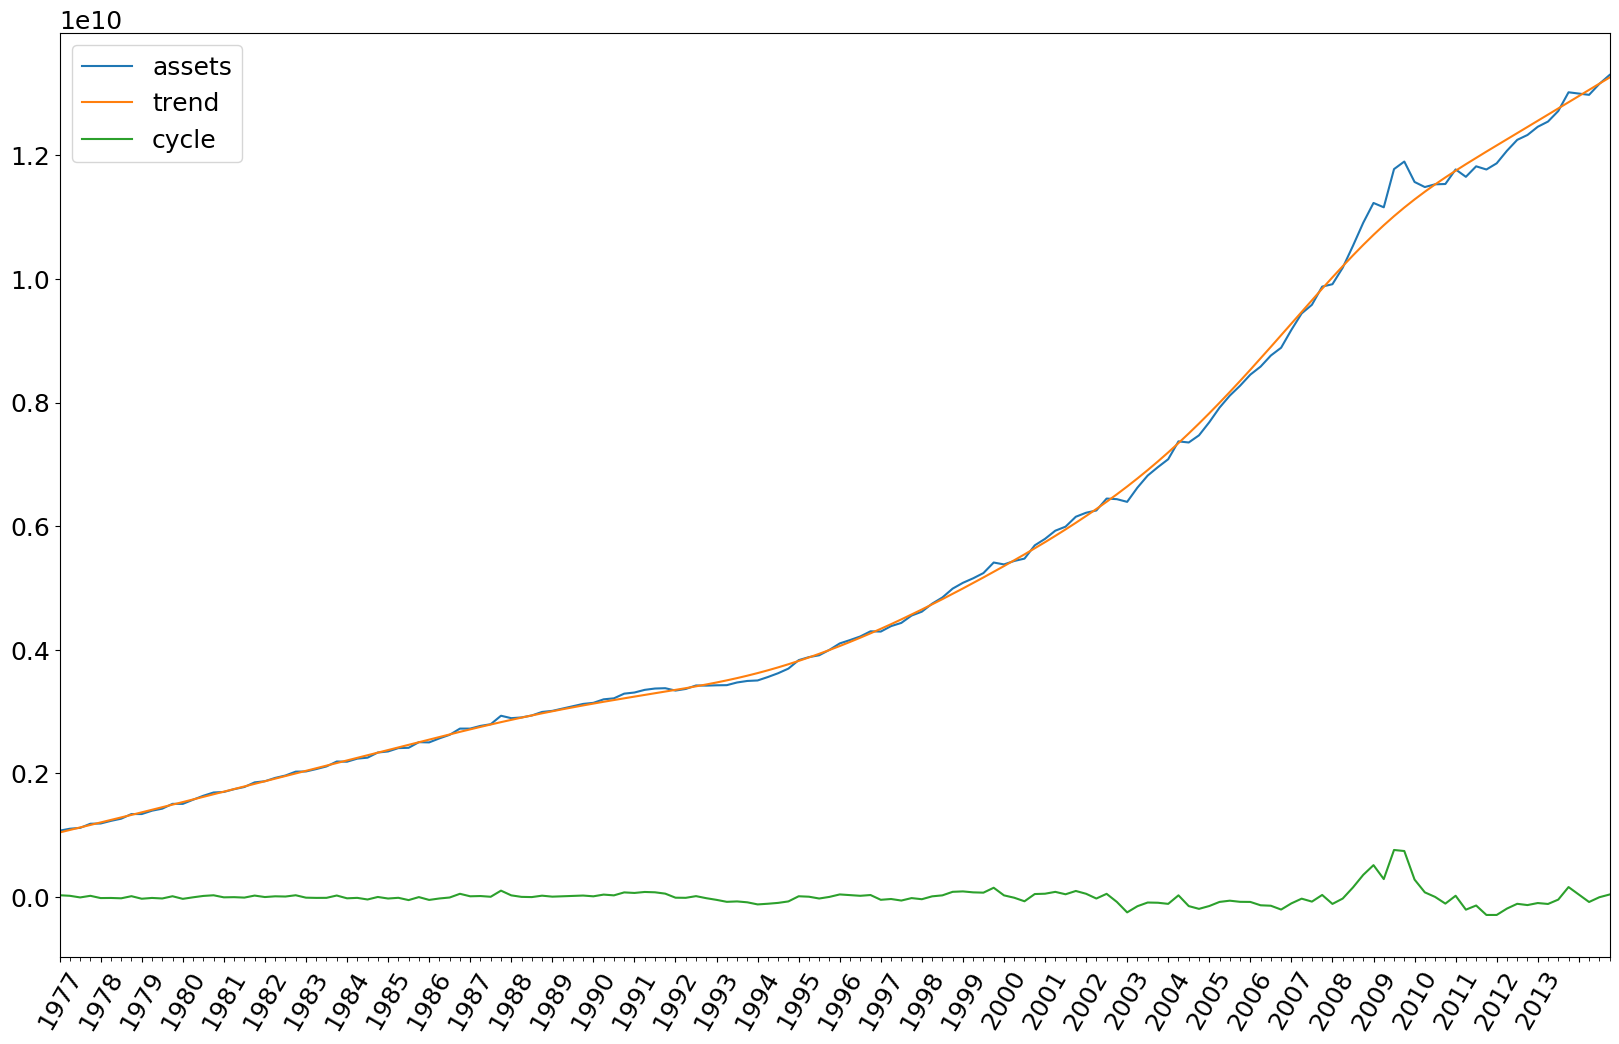

In [56]:

fig, ax = plt.subplots(figsize=(20,12))


assets_decomp[["assets", "trend", "cycle"]].plot(ax=ax)
ax.set_xticklabels(years, rotation=60)
ax.set_xlim(0,151)
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))

years = [str(year) for year in range(1975,2014)]


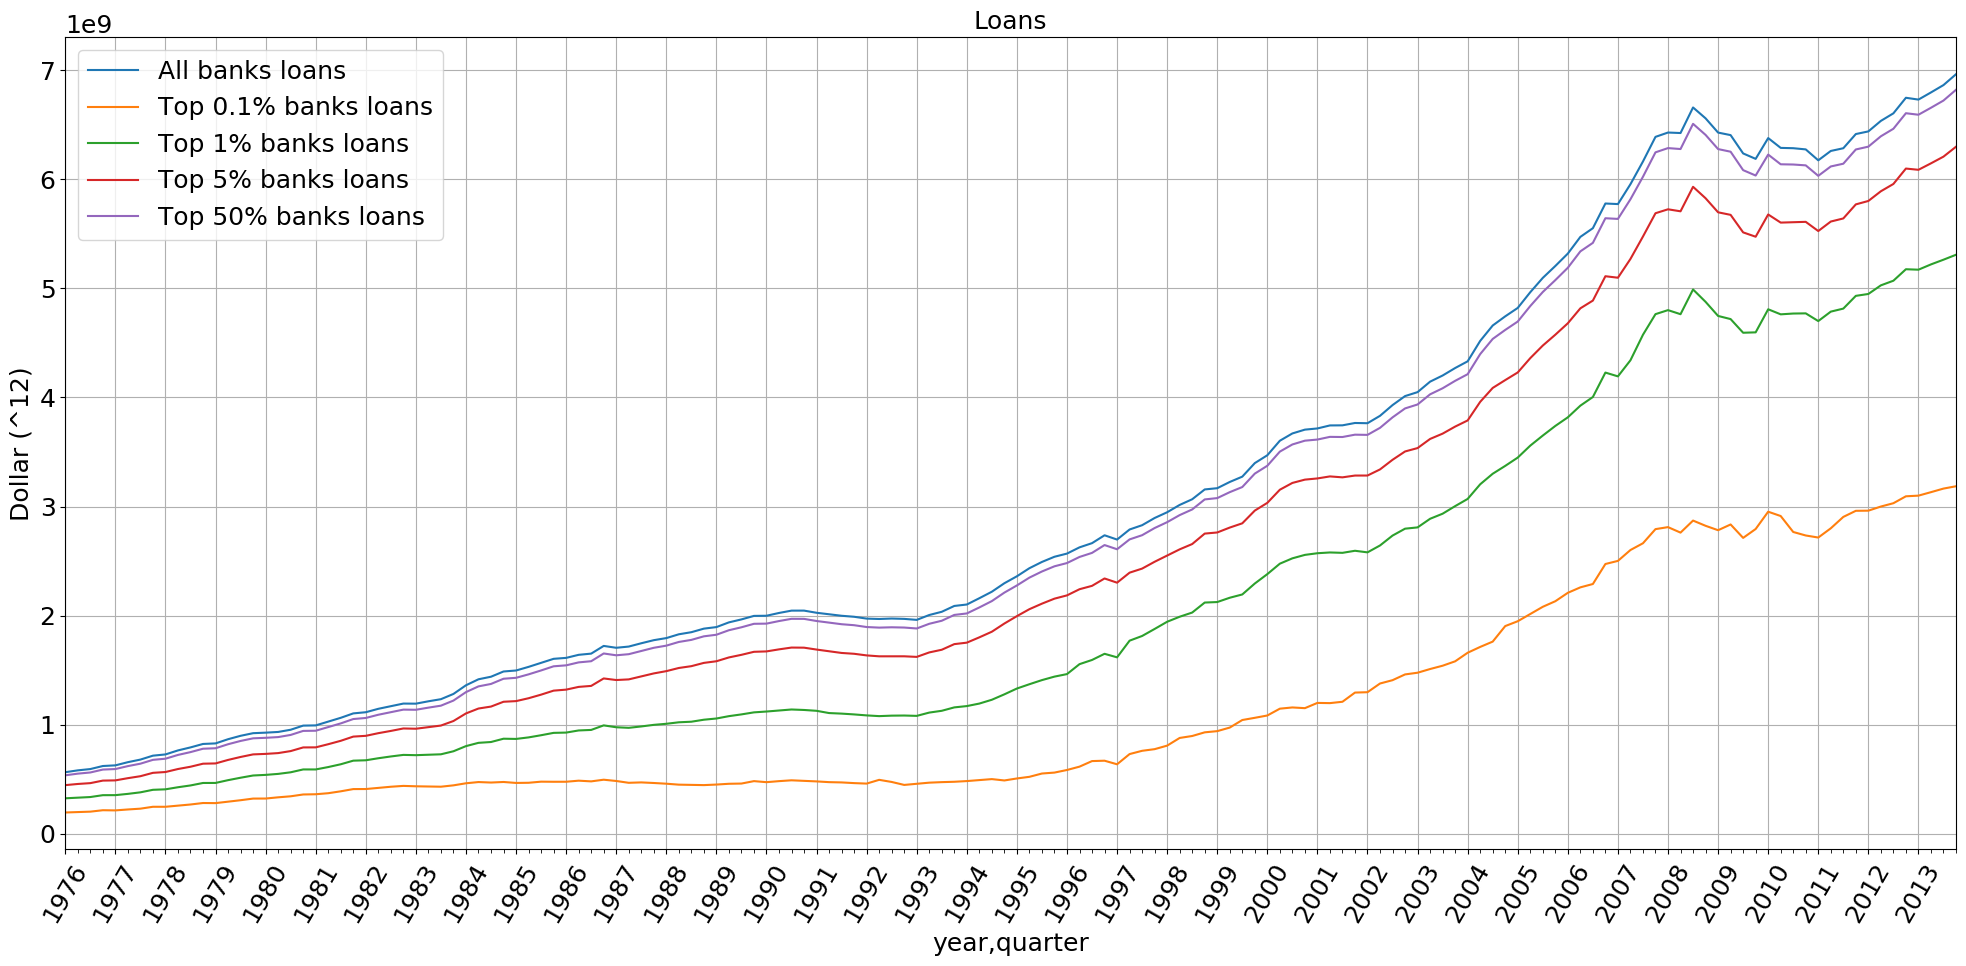

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Loans")
ax.set_ylabel("Dollar (^12)")
df_agg.loansnet.plot(ax=ax)
df_aggOnePercent.loansnet.plot(ax=ax)
df_aggFivePercent.loansnet.plot(ax=ax)
df_aggTenPercent.loansnet.plot(ax=ax)
df_aggFiftyPercent.loansnet.plot(ax=ax)
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["All banks loans","Top 0.1% banks loans", "Top 1% banks loans", "Top 5% banks loans", "Top 50% banks loans"])
ax.grid()
ax.set_xlim(0, 151)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksLoansPercentiles_7613.png')

Growth rates assets per quarter

In [58]:
df_agg_growth_test = df_agg.copy()

df_agg_growth_test["rtn_assets"] = df_agg_growth_test.assets.pct_change()

df_agg_growth_test["log_rtn_assets"] = np.log(df_agg_growth_test.assets/df_agg_growth_test.assets.shift(1))

df_agg_growth_test

year  quarter        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets  rtn_assets  log_rtn_assets
0    1976.0      1.0  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07         NaN             NaN
1    1976.0      2.0  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07    0.029340        0.028917
2    1976.0      3.0  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07    0.012763        0.012682
3    1976.0      4.0  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07    0.059559        0.057853
4    1977.0      1.0  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07    0.003328        0.003323
5    1977.0      2.0  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07    0.035642        0.035022
6    1977.0      3.0  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07    0.028634        0.028232
7    1977.0      4.0  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07    0.059458        0.057757
8    1978.0      1.0  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07   -0.000143       -0.000143
9    1978.0      2.0  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07    0.040380        0.039586
10   1978.0      3.0  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07    0.023531        0.023258
11   1978.0      4.0  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07    0.054510        0.053077
12   1979.0      1.0  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07   -0.000277       -0.000277
13   1979.0      2.0  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08    0.044423        0.043465
14   1979.0      3.0  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08    0.040812        0.040002
15   1979.0      4.0  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08    0.032280        0.031770
16   1980.0      1.0  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08    0.005181        0.005167
17   1980.0      2.0  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08    0.026447        0.026104
18   1980.0      3.0  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08    0.020133        0.019933
19   1980.0      4.0  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08    0.042058        0.041197
20   1981.0      1.0  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08    0.009935        0.009885
21   1981.0      2.0  7.4

In [59]:
#add growth column
df_agg_growth = df_agg.copy()
df_agg_growth.insert(2,"growth", 0)

print(df_agg_growth.iloc[1,4])

#loop
for i in range(1,152):
    df_agg_growth.iloc[i,2] = (df_agg_growth.iloc[i,5] - df_agg_growth.iloc[i-1,5]) / df_agg_growth.iloc[i-1,5]

df_agg_growth

4092732445.0


year  quarter    growth        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets
0    1976.0      1.0  0.000000  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07
1    1976.0      2.0  0.029340  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07
2    1976.0      3.0  0.012763  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07
3    1976.0      4.0  0.059559  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07
4    1977.0      1.0  0.003328  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07
5    1977.0      2.0  0.035642  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07
6    1977.0      3.0  0.028634  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07
7    1977.0      4.0  0.059458  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07
8    1978.0      1.0 -0.000143  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07
9    1978.0      2.0  0.040380  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07
10   1978.0      3.0  0.023531  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07
11   1978.0      4.0  0.054510  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07
12   1979.0      1.0 -0.000277  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07
13   1979.0      2.0  0.044423  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08
14   1979.0      3.0  0.040812  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08
15   1979.0      4.0  0.032280  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08
16   1980.0      1.0  0.005181  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08
17   1980.0      2.0  0.026447  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08
18   1980.0      3.0  0.020133  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08
19   1980.0      4.0  0.042058  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08
20   1981.0      1.0  0.009935  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08
21   1981.0      2.0  0.028775  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         72471117.0  3.271157e+08  1.028881e+09            0.0  1.539774e+08
22   1981.0      3.0  0.020039  7.409360e+09  6.059058e+09  1.966138e+09  3.361760e+08         72501641.0  3.315889e+08  1.063394e+09            0.0  1.624773e+08
23   1981.0      4.0  0.031880  7.390566e+09  6.336821e+09  2.028818e+09  3.274177e+08         

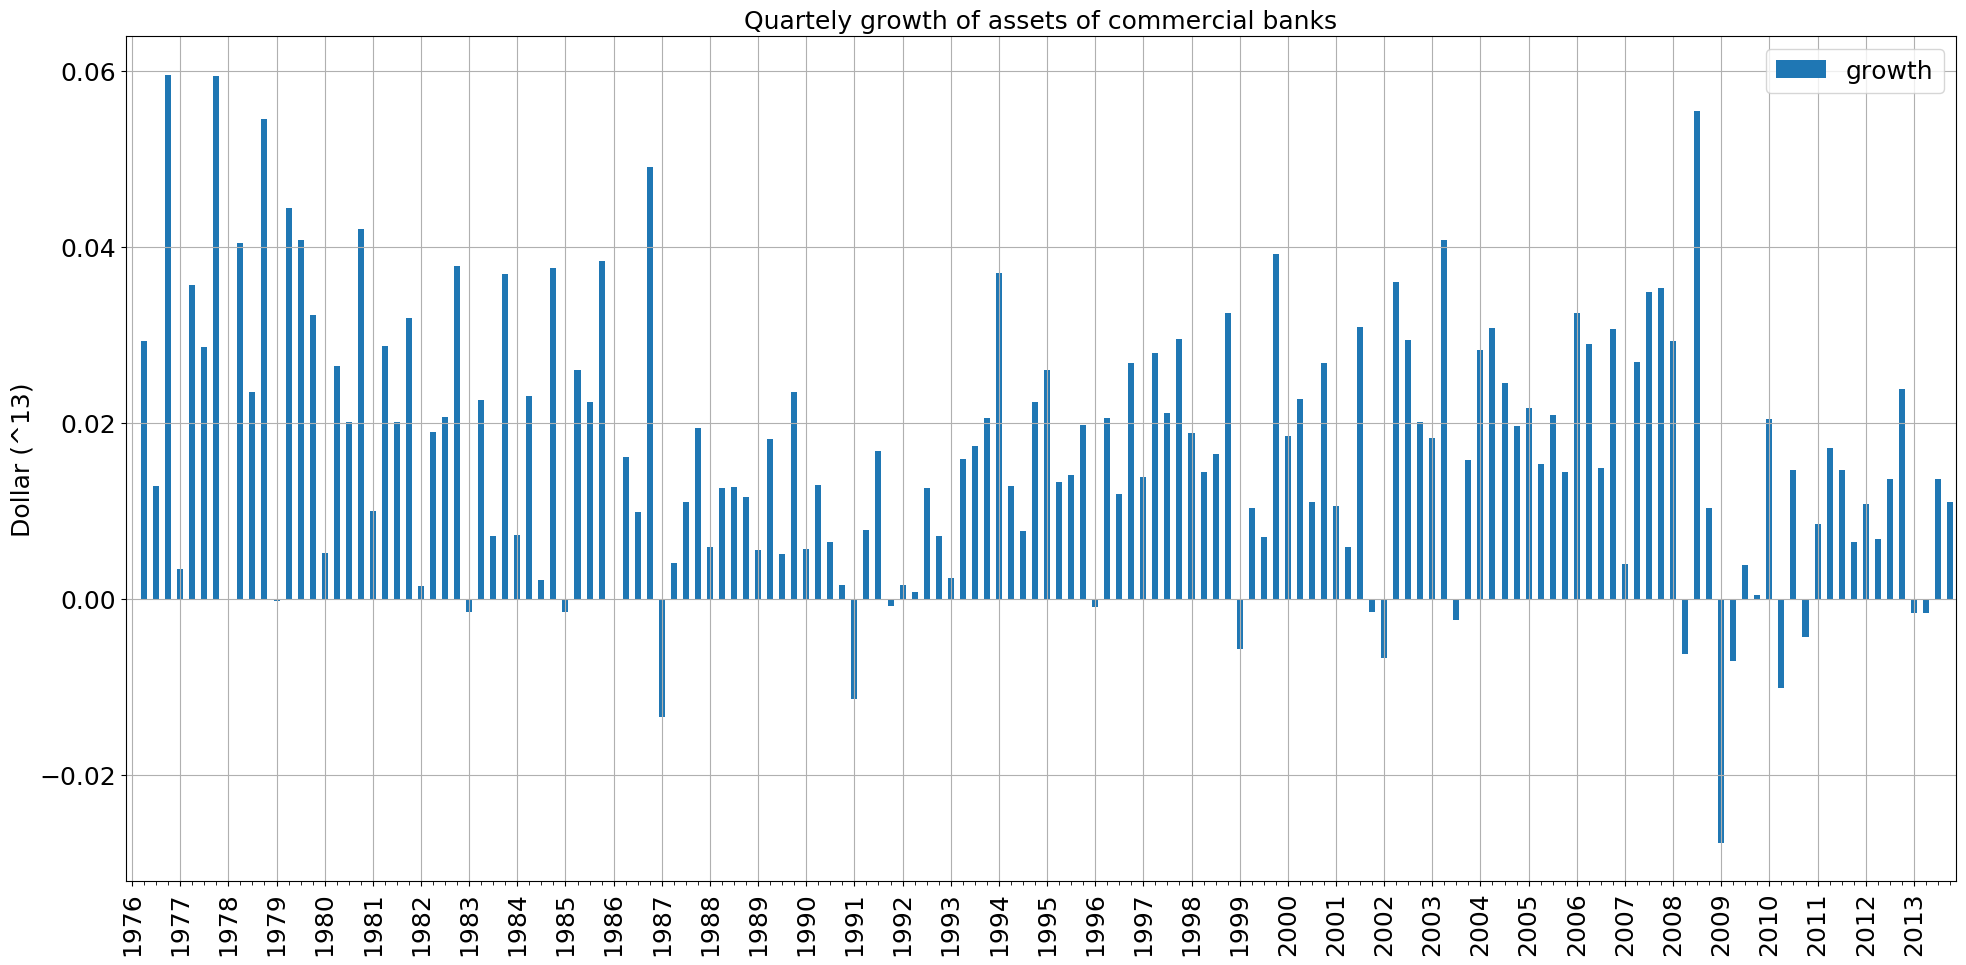

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Quartely growth of assets of commercial banks")
ax.set_ylabel("Dollar (^13)")
#ax.set_xticklabels(years, rotation=90)
df_agg_growth.plot.bar(ax=ax, y=["growth"])
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=90)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssets_7613.png')

Growth rates assets per year

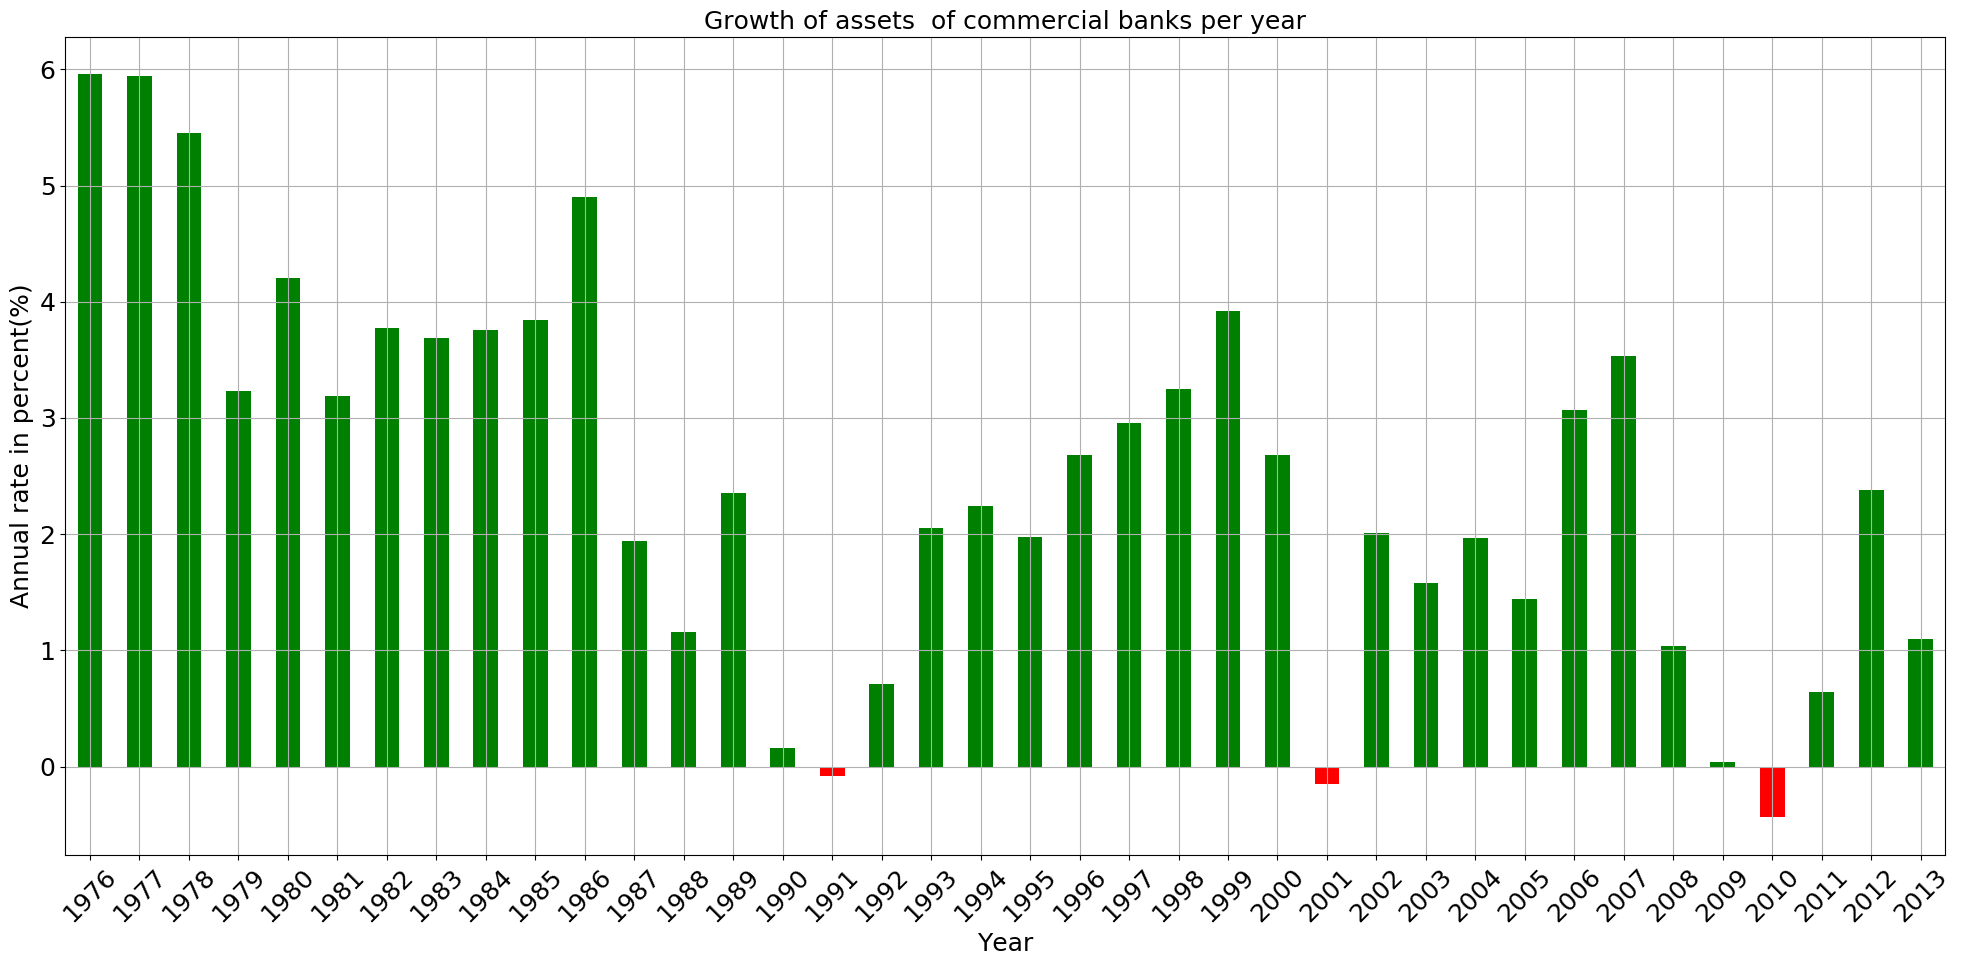

In [61]:
df_agg_growth_year = df_agg_growth.copy()
df_agg_growth_year = df_agg_growth_year[df_agg_growth_year.quarter==4] #filter dataset for quarter 4 entrys
#df_agg_growth_year = df_agg_growth_year.groupby(["year"]).mean()
df_agg_growth_year.growth = df_agg_growth_year.growth * 100

fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.set_title("Growth of assets  of commercial banks per year")
ax.set_ylabel("Annual rate in percent(%)")
ax.set_xlabel("Year")
#ax.set_xticklabels(years, rotation=90)
df_agg_growth_year["positive"] = df_agg_growth_year.growth > 0
#df_agg_growth_year.plot.bar(ax=ax, y=["growth"], color=df_agg_growth_year.positive.map({True: 'r', False: 'g'}))
df_agg_growth_year.growth.plot(kind="bar", color=df_agg_growth_year.positive.map({True: 'g', False: 'r'}))
ax.set_xticks(range(0,38))
ax.set_xticklabels(years, rotation=45)
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssetsYear_7613.png')
#df_agg_growth_year

Growth of assets of top 1%,5%,10%, 50% banks

In [62]:


#add growth column
df_aggOnePercent_growth = df_aggOnePercent.copy()
df_aggOnePercent_growth.insert(2,"growth", 0)

df_aggFivePercent_growth = df_aggFivePercent.copy()
df_aggFivePercent_growth.insert(2,"growth", 0)

df_aggTenPercent_growth = df_aggTenPercent.copy()
df_aggTenPercent_growth.insert(2,"growth", 0)

df_aggFiftyPercent_growth = df_aggFiftyPercent.copy()
df_aggFiftyPercent_growth.insert(2,"growth", 0)


#loop
for i in range(1,152):
    df_aggOnePercent_growth.iloc[i,2] = (df_aggOnePercent_growth.iloc[i,3] - df_aggOnePercent_growth.iloc[i-1,3]) / df_aggOnePercent_growth.iloc[i-1,3]

for i in range(1,152):
    df_aggFivePercent_growth.iloc[i,2] = (df_aggFivePercent_growth.iloc[i,3] - df_aggFivePercent_growth.iloc[i-1,3]) / df_aggFivePercent_growth.iloc[i-1,3]
    
    
for i in range(1,152):
    df_aggTenPercent_growth.iloc[i,2] = (df_aggTenPercent_growth.iloc[i,3] - df_aggTenPercent_growth.iloc[i-1,3]) / df_aggTenPercent_growth.iloc[i-1,3]
    

for i in range(1,152):
    df_aggFiftyPercent_growth.iloc[i,2] = (df_aggFiftyPercent_growth.iloc[i,3] - df_aggFiftyPercent_growth.iloc[i-1,3]) / df_aggFiftyPercent_growth.iloc[i-1,3]


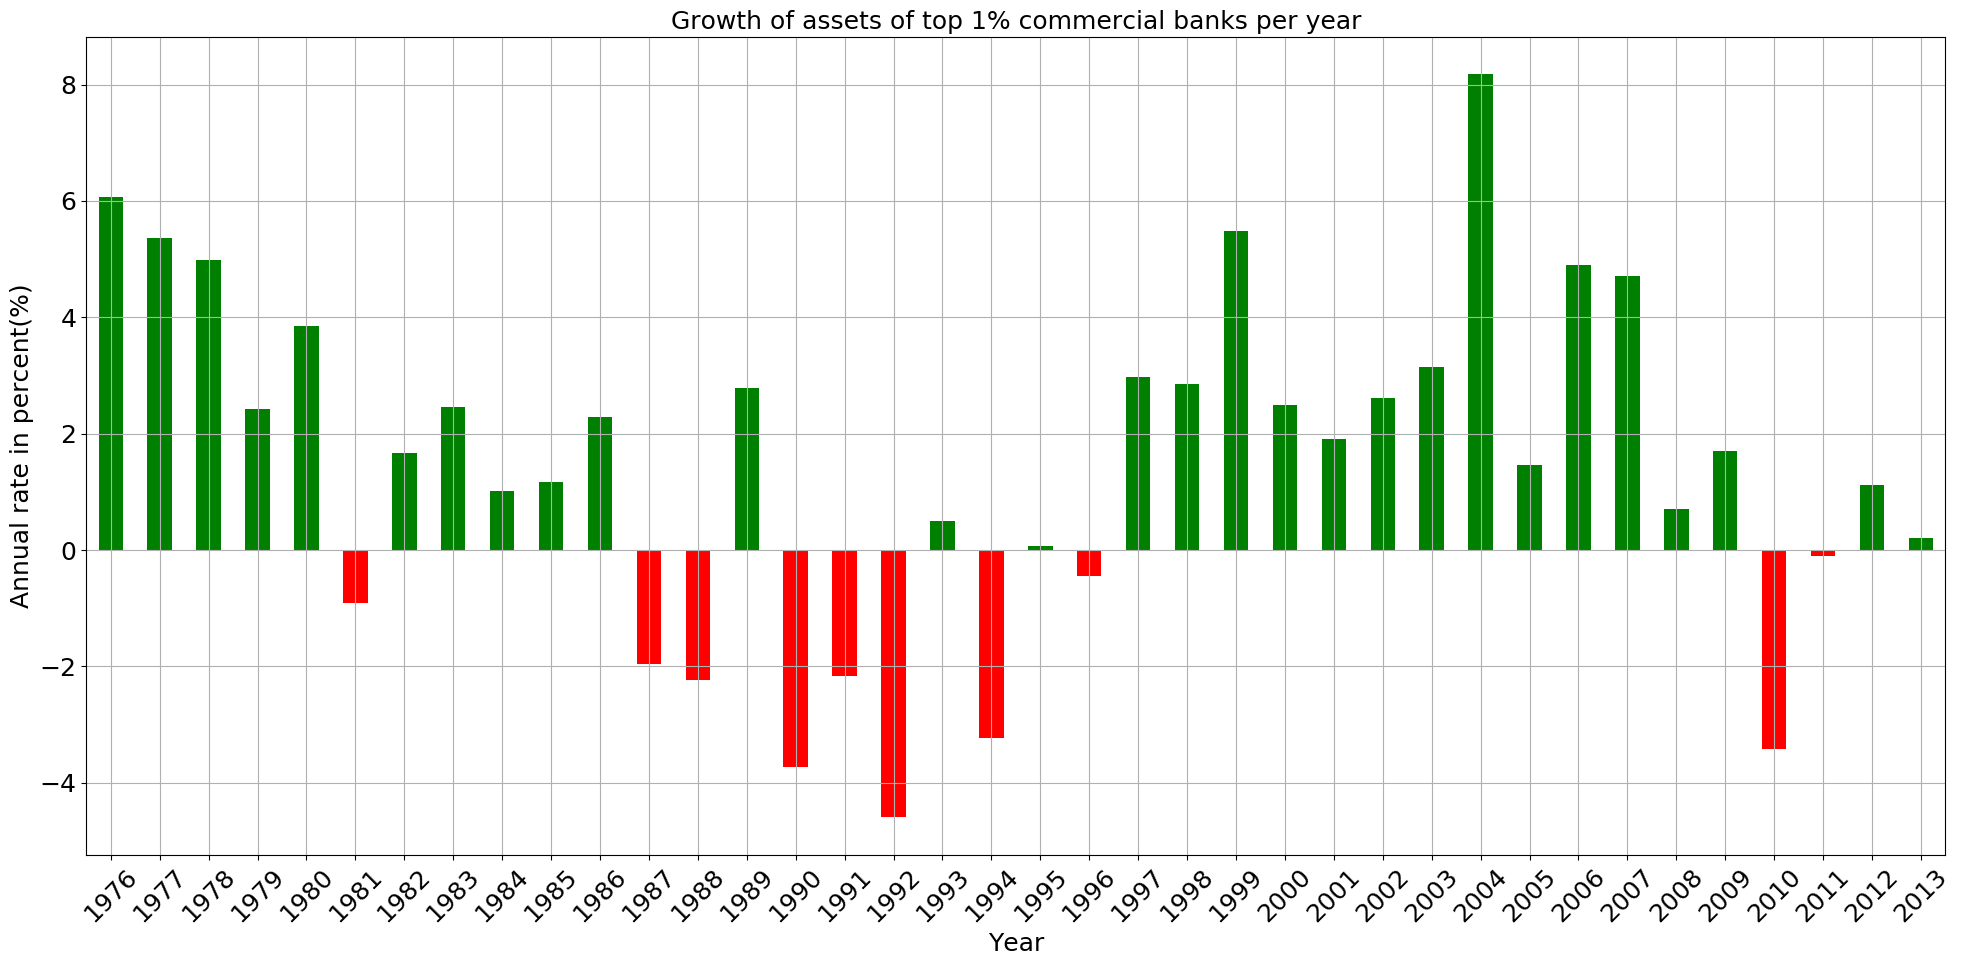

In [63]:

df_aggOnePercent_growth_year = df_aggOnePercent_growth.copy()
df_aggOnePercent_growth_year.reset_index(inplace=True)
df_aggOnePercent_growth_year = df_aggOnePercent_growth_year[df_aggOnePercent_growth_year.quarter==4] #filter dataset for quarter 4 entrys
#df_agg_growth_year = df_agg_growth_year.groupby(["year"]).mean()
df_aggOnePercent_growth_year.growth = df_aggOnePercent_growth_year.growth * 100

fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
#ax.set_xticks(range(0,152,4))
ax.set_title("Growth of assets of top 1% commercial banks per year")
ax.set_ylabel("Annual rate in percent(%)")
ax.set_xlabel("Year")
#ax.set_xticklabels(years, rotation=90)
df_aggOnePercent_growth_year["positive"] = df_aggOnePercent_growth_year.growth > 0
#df_agg_growth_year.plot.bar(ax=ax, y=["growth"], color=df_agg_growth_year.positive.map({True: 'r', False: 'g'}))
df_aggOnePercent_growth_year.growth.plot(kind="bar", color=df_aggOnePercent_growth_year.positive.map({True: 'g', False: 'r'}))
ax.set_xticks(range(0,38))
ax.set_xticklabels(years, rotation=45)
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthAssetsYear1_7613.png')
#df_agg_growth_year

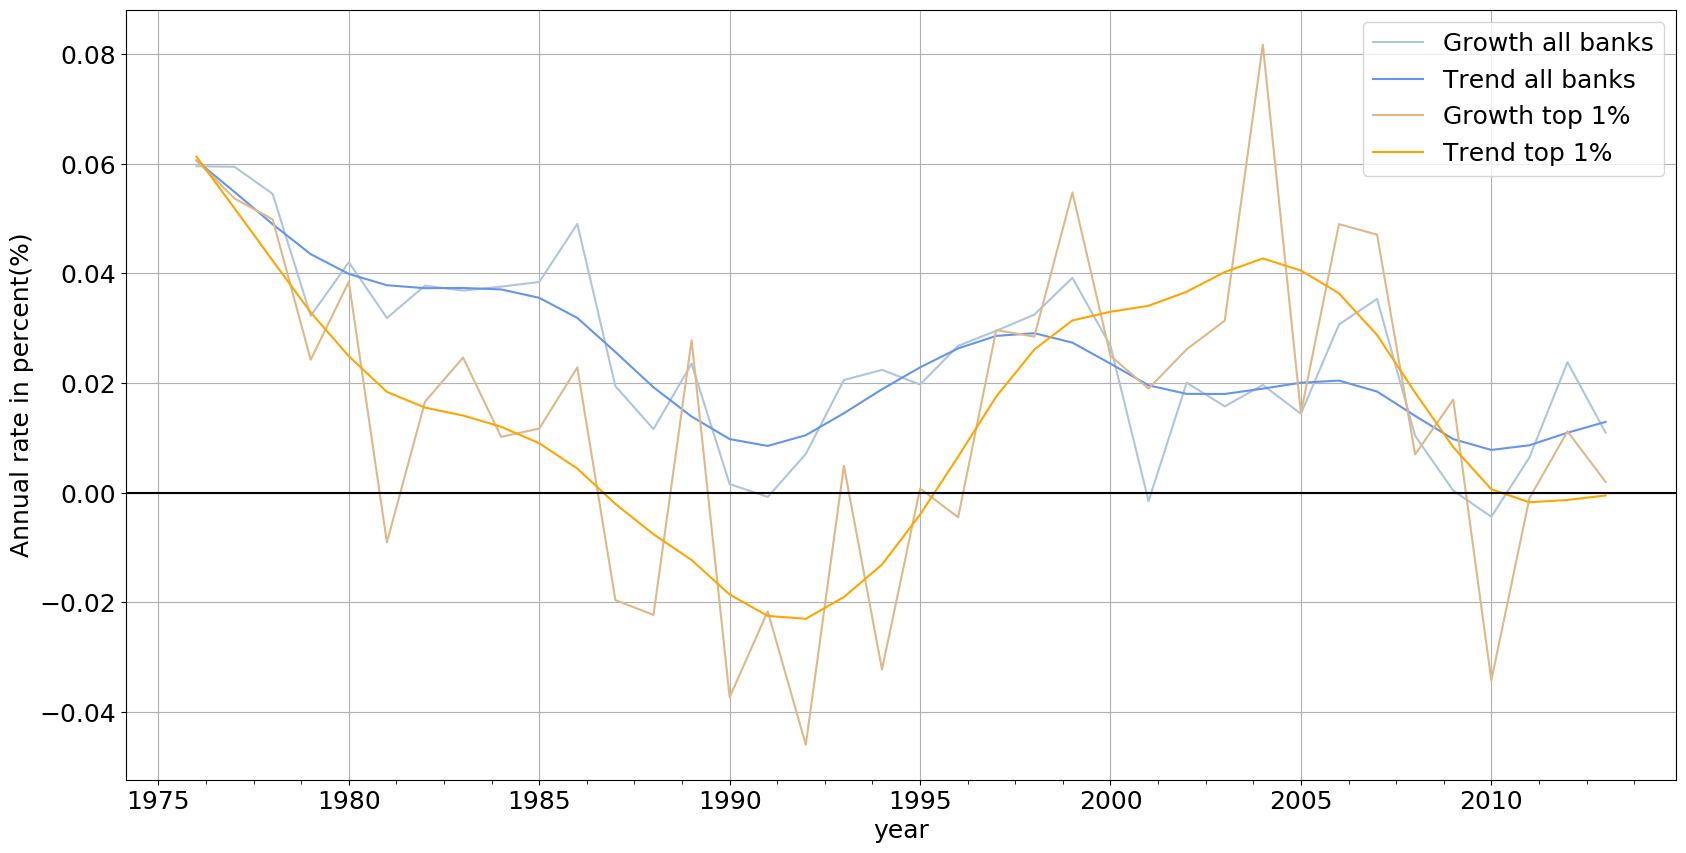

In [64]:
#prepare data
#top 1%
temp_df_1 = df_aggOnePercent_growth.copy()
temp_df_1.reset_index(level="quarter", inplace=True)
temp_df_1 = temp_df_1[temp_df_1.quarter==4]
#all banks
temp_df_all = df_agg_growth.copy()
temp_df_all.set_index("year", inplace=True)
temp_df_all = temp_df_all[temp_df_all.quarter==4]
#top 5%
temp_df_5 = df_aggFivePercent_growth.copy()
temp_df_5.reset_index(level="quarter", inplace=True)
temp_df_5 = temp_df_5[temp_df_5.quarter==4]
#top 10%
temp_df_10 = df_aggTenPercent_growth.copy()
temp_df_10.reset_index(level="quarter", inplace=True)
temp_df_10 = temp_df_10[temp_df_10.quarter==4]

#trends

cycle, trend = sm.tsa.filters.hpfilter(temp_df_all.growth, 6.25)
assets_decomp = temp_df_all[["growth"]]
assets_decomp["cycle"] = cycle
assets_decomp["trend"] = trend

cycle, trend = sm.tsa.filters.hpfilter(temp_df_1.growth, 6.25)
assets_decomp1 = temp_df_1[["growth"]]
assets_decomp1["cycle"] = cycle
assets_decomp1["trend"] = trend

#plot
fig, ax = plt.subplots(figsize=(20,10))
#ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))

temp_df_all.growth.plot(ax=ax, color="lightsteelblue")
assets_decomp.trend.plot(ax=ax, color="cornflowerblue")
#assets_decomp.cycle.plot(ax=ax, color="cornflowerblue")

temp_df_1.growth.plot(ax=ax, color="burlywood")
assets_decomp1.trend.plot(ax=ax, color="orange")
#assets_decomp1.cycle.plot(ax=ax, color="orange")

plt.axhline(y=0, color='black', linestyle='-')
ax.legend(["Growth all banks","Trend all banks" ,"Growth top 1%", "Trend top 1%"])
ax.set_ylabel("Annual rate in percent(%)")
ax.grid(True)


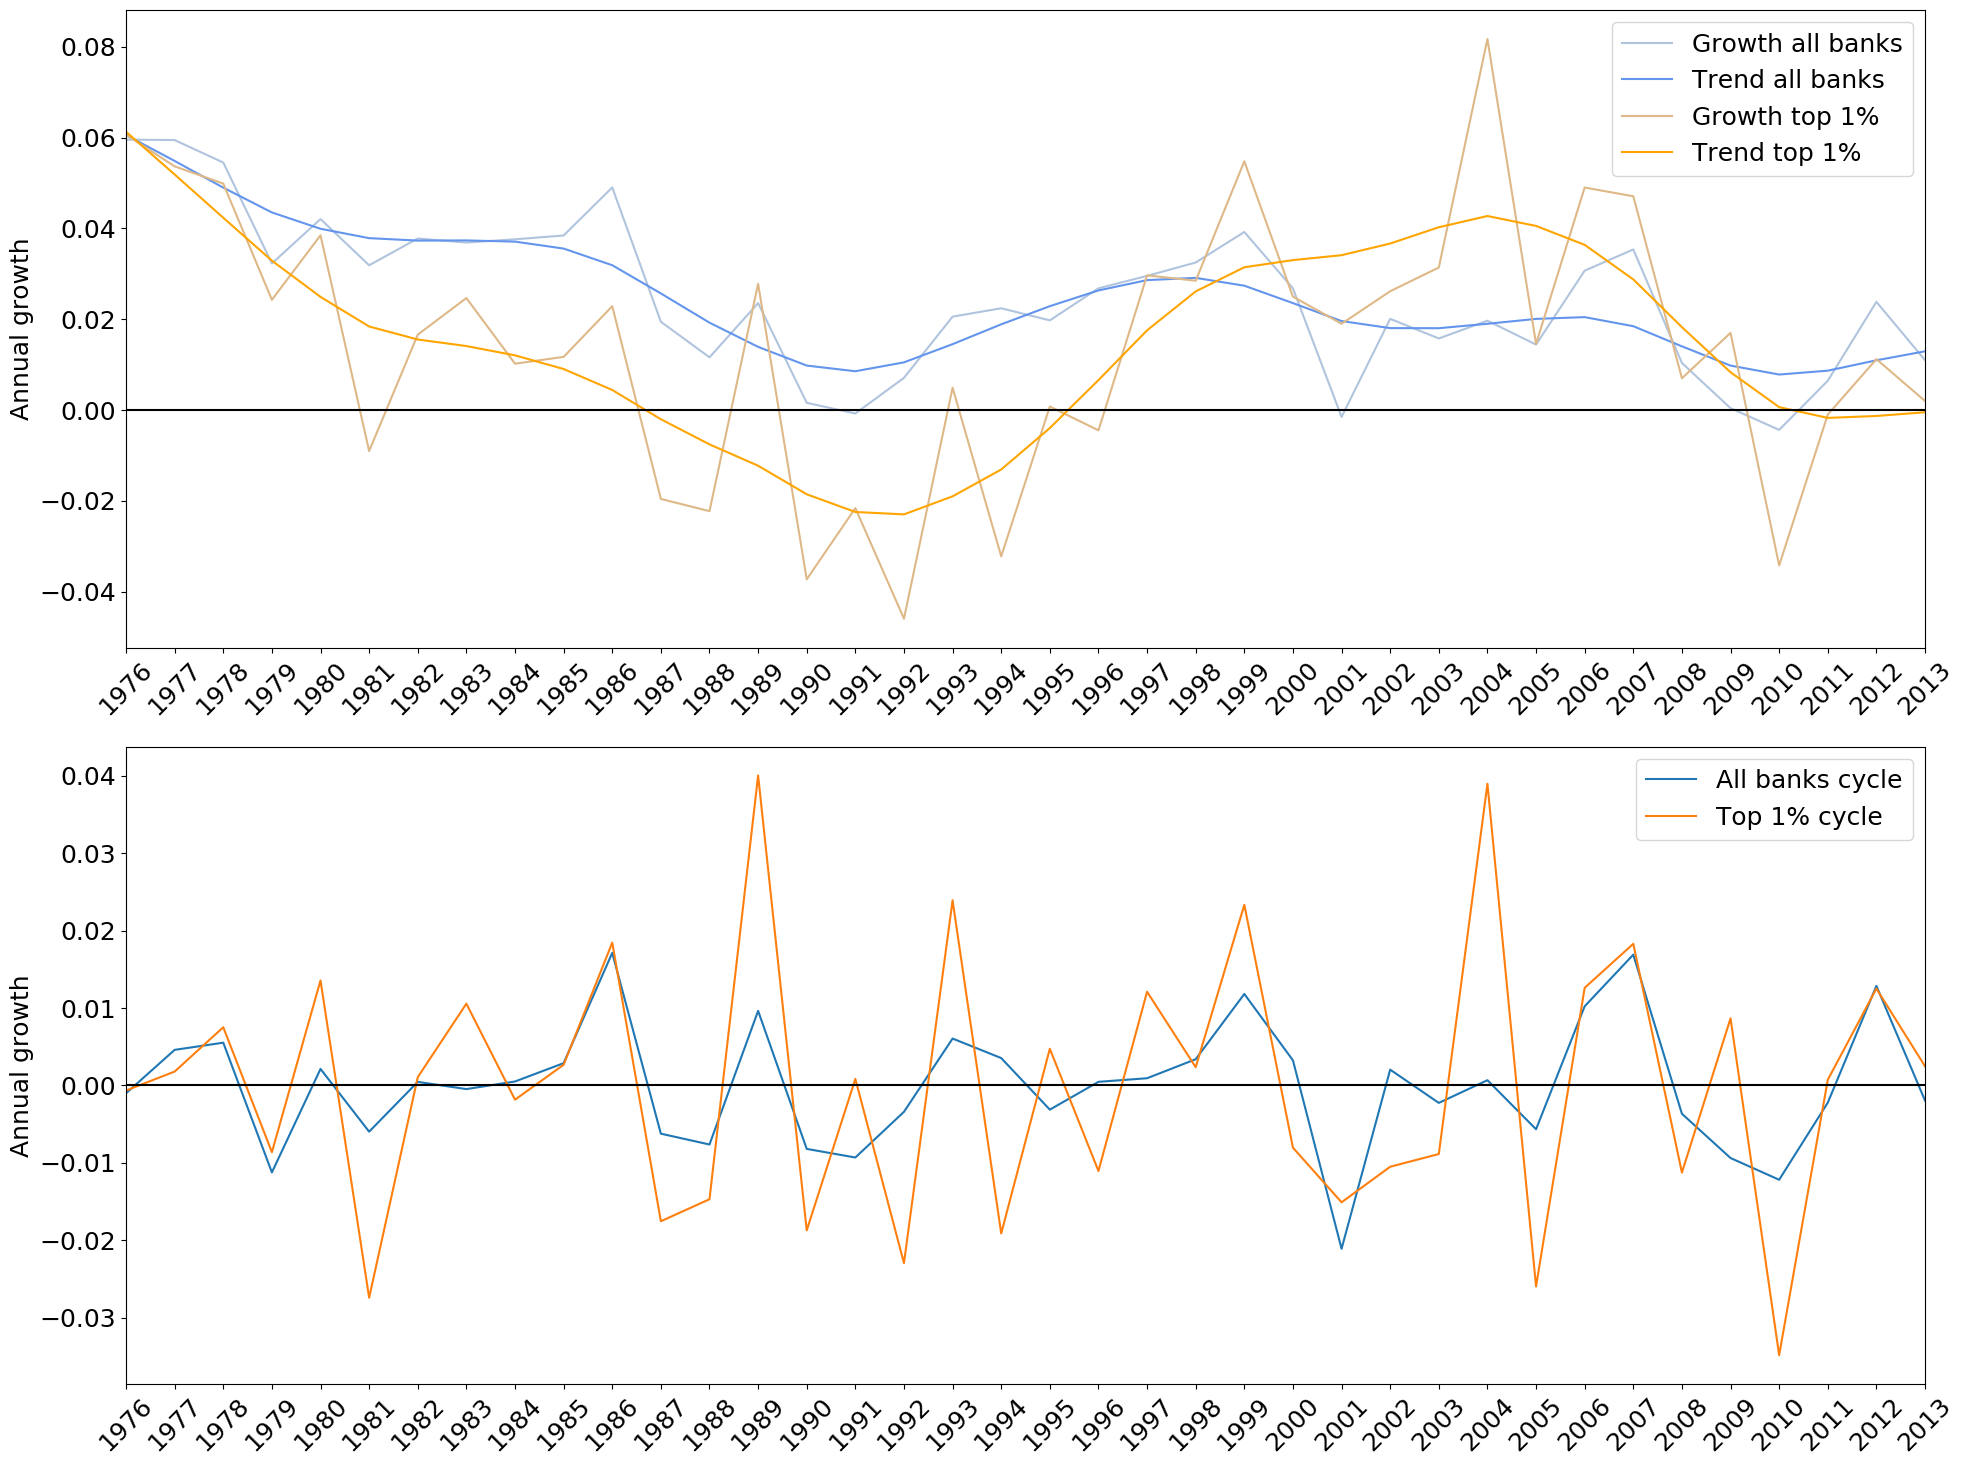

In [65]:
fig, ax = plt.subplots(2,1,figsize=(20,15))

#ravel ax to make it adressable as an array
ax.ravel()


#Plot graphs
ax[0].plot(temp_df_all.growth, color="lightsteelblue")
ax[0].plot(assets_decomp.trend, color="cornflowerblue")
ax[0].plot(temp_df_1.growth, color="burlywood")
ax[0].plot(assets_decomp1.trend, color="orange")

ax[1].plot(assets_decomp.cycle)
ax[1].plot(assets_decomp1.cycle)

#plot horizontal line
ax[0].axhline(y=0, color='black', linestyle='-')
ax[1].axhline(y=0, color='black', linestyle='-')

ax[0].legend(["Growth all banks","Trend all banks" ,"Growth top 1%", "Trend top 1%"])
ax[1].legend(["All banks cycle","Top 1% cycle"])
ax[0].set_ylabel("Annual growth")
ax[1].set_ylabel("Annual growth")

#set rotation of ticklabels
years = [str(year) for year in range(1975, 2014)]
ax[0].set_xticklabels(years, rotation=45)
ax[1].set_xticklabels(years, rotation=45)

#set tick every year
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))

#set data limits for xaxis
ax[0].set_xlim(1976, 2013)
ax[1].set_xlim(1976, 2013)


plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_GrowthTrends_7613.png')

In [66]:
import scipy.stats  as stats
print(assets_decomp.cycle.corr(assets_decomp1.cycle))

stats.pearsonr(assets_decomp.cycle, assets_decomp1.cycle )

#fig, ax = plt.subplots(figsize=(20,15))

#ax.scatter(assets_decomp.cycle,assets_decomp1.cycle )


0.6371607133788253


(0.6371607133788253, 1.696703469447756e-05)

Median Bank: Assets and Liabilities

In [67]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median


year  quarter    rssdid    assets   equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
0    1976.0      1.0  518859.0   15427.0   1256.0               0.0   13999.0         0.0                 0.0                 NaN      14197.0
1    1976.0      2.0  519300.0   15886.5   1295.0               0.0   14327.5         0.0                 0.0                 NaN      14636.5
2    1976.0      3.0  519183.5   16266.0   1346.0               0.0   14676.5         0.0                 0.0                 NaN      14952.0
3    1976.0      4.0  519146.0   16866.0   1348.0               0.0   15269.0         0.0                 0.0                 NaN      15524.0
4    1977.0      1.0  518859.0   17211.0   1398.0               0.0   15547.0         0.0                 0.0                 NaN      15790.0
5    1977.0      2.0  518849.5   17659.0   1433.5               0.0   15846.0         0.0                 0.0                 NaN      16161.5
6    1977.0      3.0  518429.5   18157.5   1488.5               0.0   16296.5         0.0                 0.0                 NaN      16683.5
7    1977.0      4.0  518279.0   19128.0   1492.0               0.0   17300.0         0.0                 0.0                 NaN      17569.0
8    1978.0      1.0  518550.0   19297.0   1551.0               0.0   17410.0         0.0                 0.0                 NaN      17753.0
9    1978.0      2.0  518617.0   20070.0   1602.5               0.0   18026.0         0.0                 0.0                 NaN      18469.0
10   1978.0      3.0  518550.0   20534.0   1664.0               0.0   18419.0         0.0                 0.0                 NaN      18894.0
11   1978.0      4.0  518265.0   21073.5   1672.0               0.0   18956.5         0.0                 0.0                 NaN      19378.5
12   1979.0      1.0  518251.0   21175.5   1738.0               0.0   18903.5         0.0                 0.0                 NaN      19415.0
13   1979.0      2.0  518639.5   21814.5   1798.5               0.0   19394.0         0.0                 0.0                 NaN      19921.5
14   1979.0      3.0  518485.0   22259.0   1870.0               0.0   19783.5         0.0                 0.0                 NaN      20348.0
15   1979.0      4.0  518718.0   22988.0   1880.0               0.0   20528.0         0.0                 0.0                 NaN      21029.0
16   1980.0      1.0  518765.0   23175.0   1967.0               0.0   20609.0         0.0                 0.0                 NaN      21156.0
17   1980.0      2.0  519300.0   23550.0   2023.0               0.0   20912.0         0.0                 0.0                 NaN      21483.5
18   1980.0      3.0  519436.0   24102.0   2076.0               0.0   21442.0         0.0                 0.0                 NaN      21970.0
19   1980.0      4.0  518952.0   24995.5   2109.5               0.0   22208.5         0.0                 0.0                 NaN      22840.0
20   1981.0      1.0  518671.0   25451.0   2198.0               0.0   22539.0         0.0                 0.0                 NaN      23307.0
21   1981.0      2.0  518485.0   25927.0   2261.5               0.0   22908.0         0.0                 0.0                 NaN      23692.5
22   1981.0      3.0  518251.0   26225.5   2339.0               0.0   23101.0         0.0                 0.0                 NaN      23948.5
23   1981.0      4.0  518265.0   27495.0   2336.0               0.0   24259.0         0.0                 0.0                 NaN      25218.0
24   1982.0      1.0  518387.0   27889.0   2408.0               0.0   24497.0         0.0                 0.0                 NaN      25507.0
25   1982.0      2.0  519244.0   28511.0   2490.0               0.0   24858.0         0.0                 0.0                 NaN      25998.0
26   1982.0      3.0  518608.0   28918.0   2545.0               0.0   25266.0         0.0                 0.0                 NaN      26343.0
27 

In [68]:
df_liab_median_2000 = df_liab_median[(df_liab_median.year==2000) & (df_liab_median.quarter==4)]
df_liab_median_2000_T = df_liab_median_2000.T
df_liab_median_2000_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2000_T = df_liab_median_2000_T[df_liab_median_2000_T[99]!=0]

df_liab_median_2009 = df_liab_median[(df_liab_median.year==2009) & (df_liab_median.quarter==4)]
df_liab_median_2009_T = df_liab_median_2009.T
df_liab_median_2009_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2009_T.rename(columns={"data":135}, inplace=True)
df_liab_median_2009_T = df_liab_median_2009_T[df_liab_median_2009_T[135]!=0]

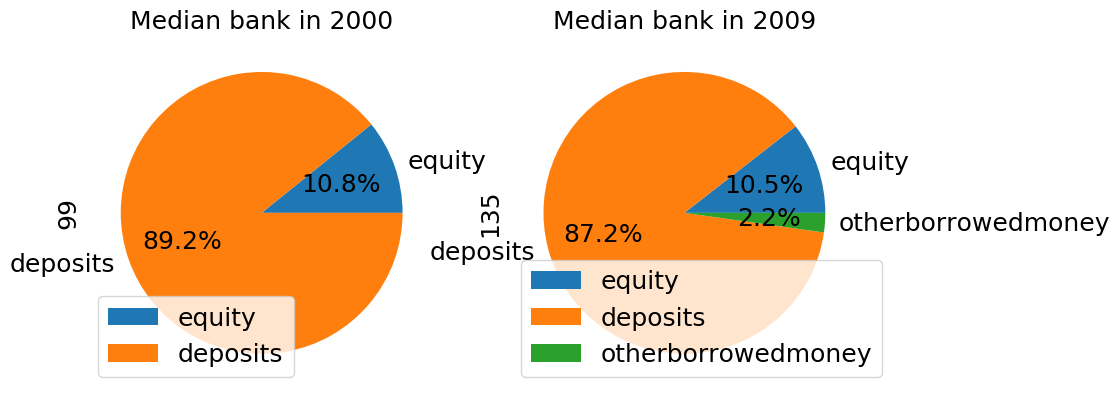

In [69]:
fig, ax = plt.subplots(1,2,figsize=(10,15)) 
#spezifische columns auswählen
#df_liab_median_2000.rename(columns={"99":"medianbank"}, inplace=True)
ax[0].set_title("Median bank in 2000")
ax[1].set_title("Median bank in 2009")
df_liab_median_2000_T.plot.pie(ax=ax[0], y=99,autopct='%1.1f%%')
df_liab_median_2009_T.plot.pie(ax=ax[1], y=135,autopct='%1.1f%%')

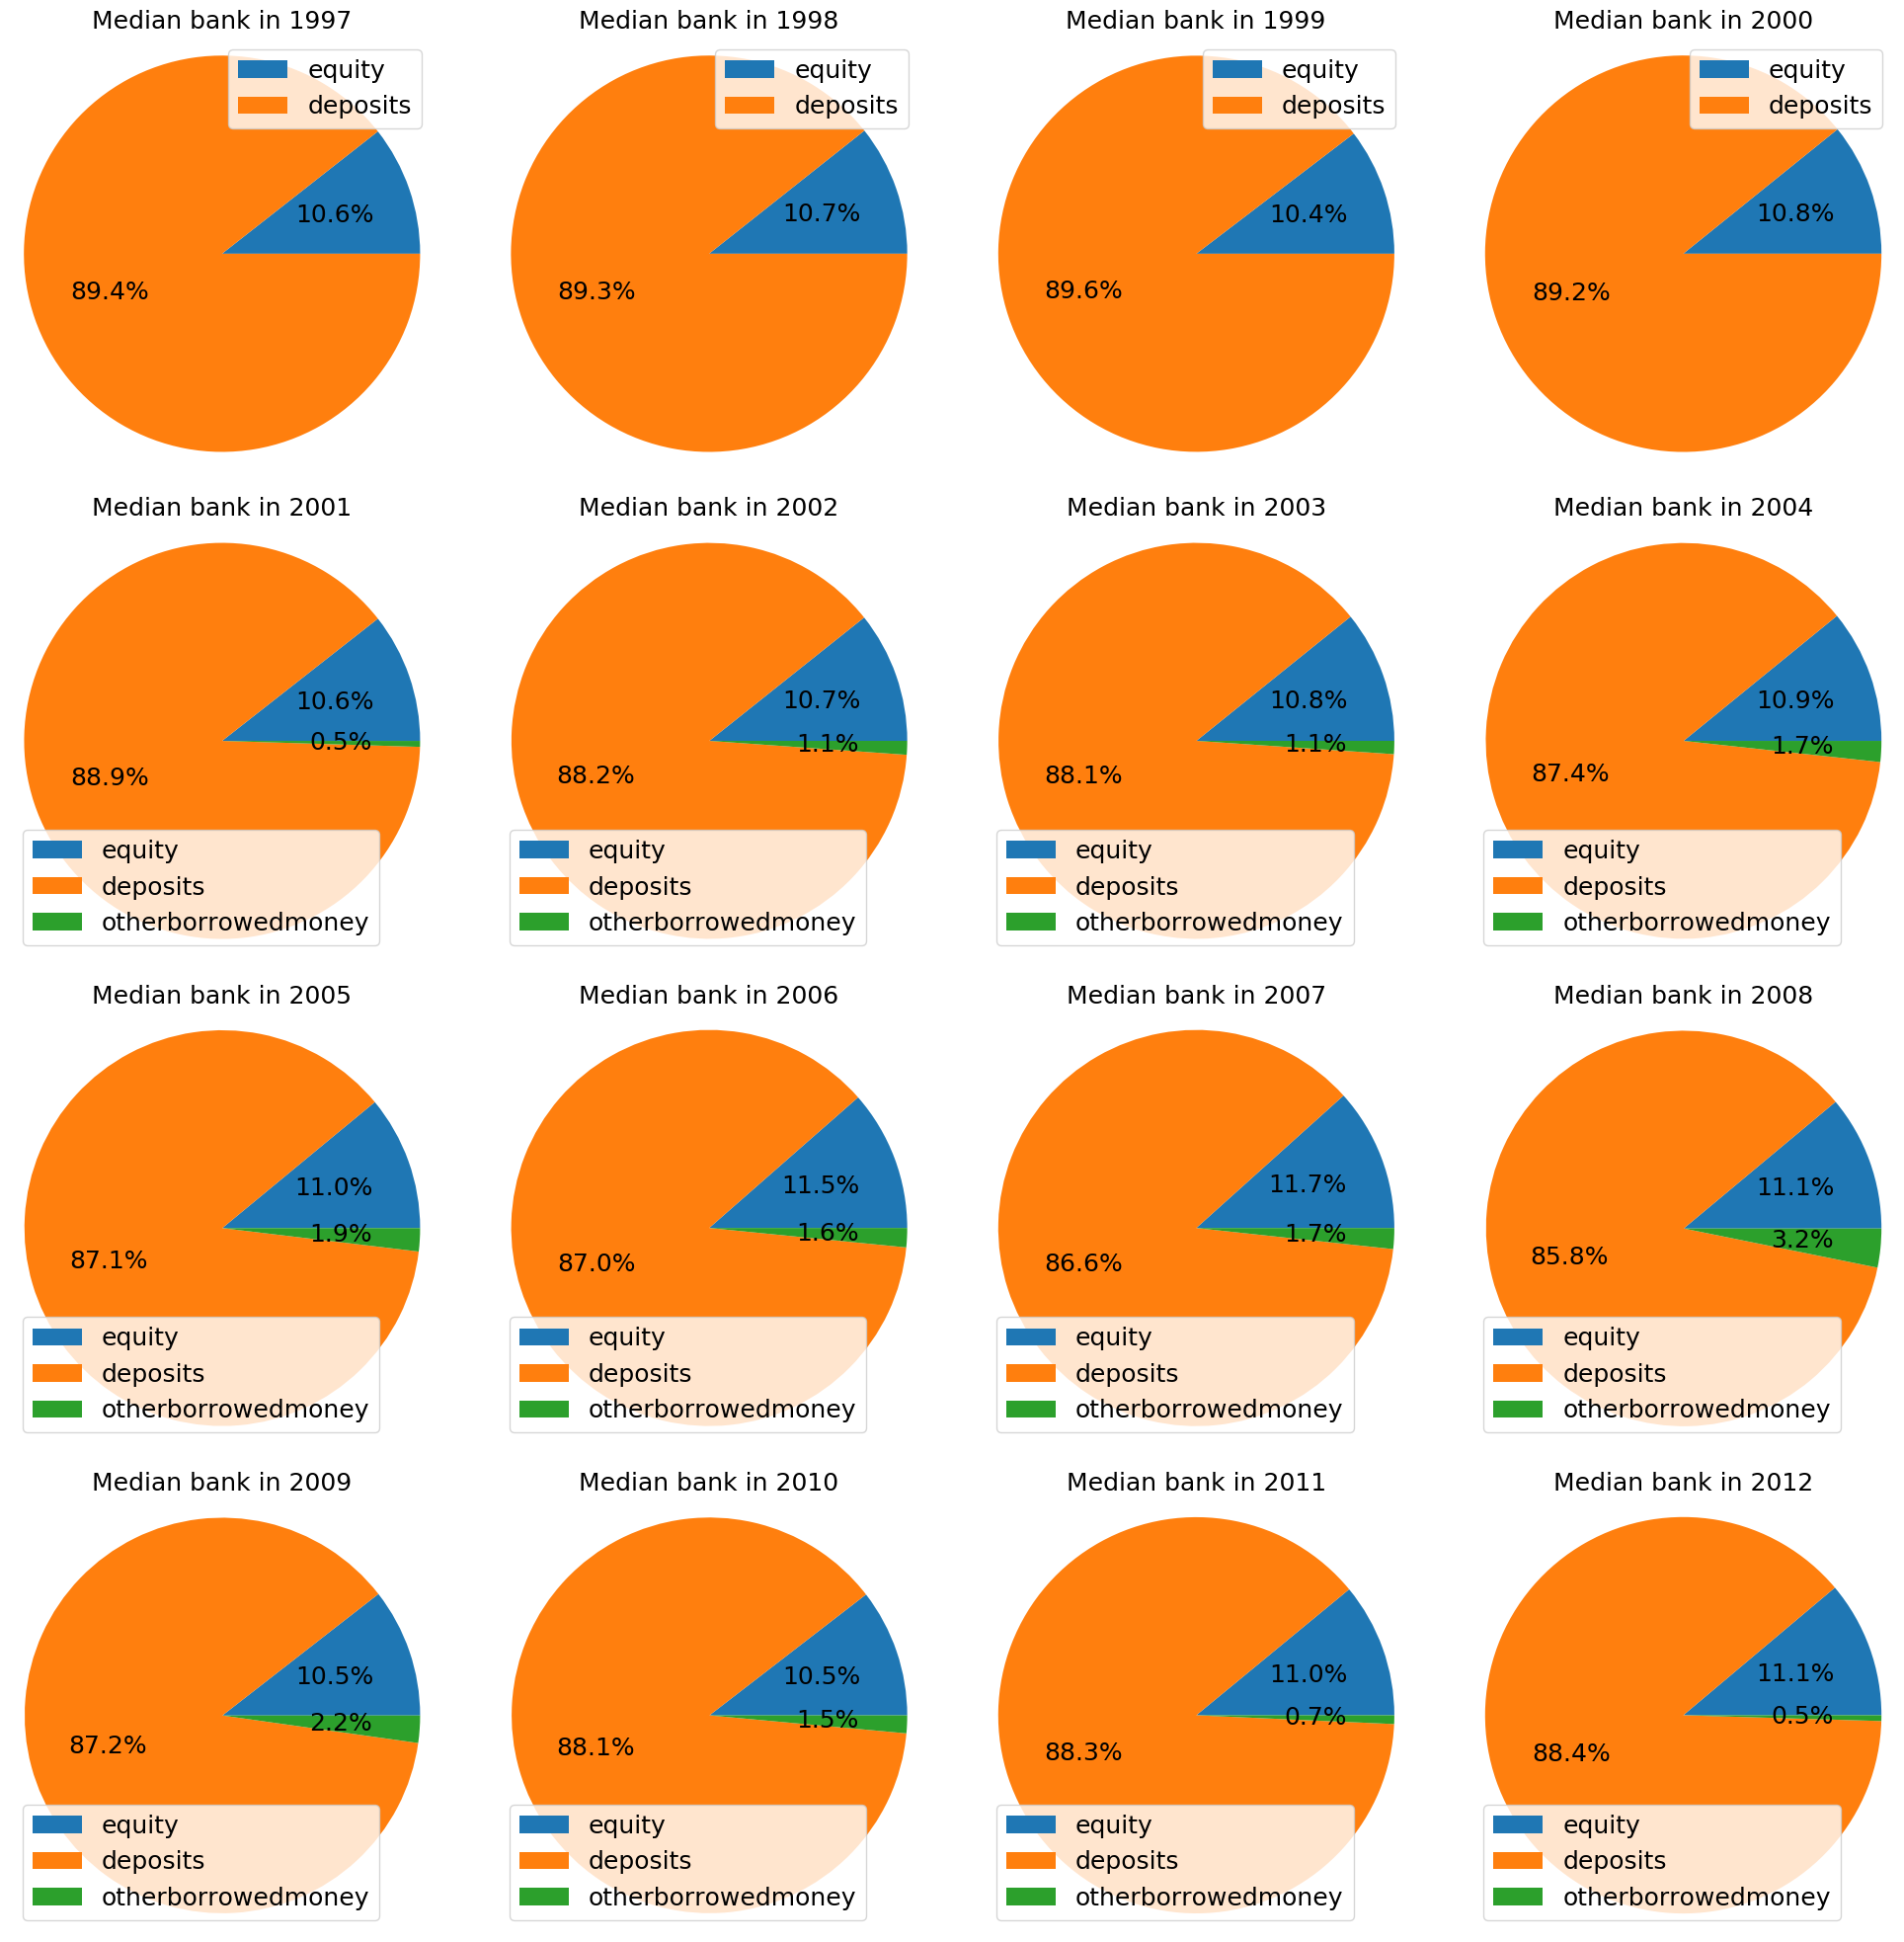

In [70]:

fig, ax = plt.subplots(4,4,figsize=(20,20))
ax = ax.ravel() 
year = 1997

for x in range(0,16):
    temp_df_liab = df_liab_median[(df_liab_median.year==year) & (df_liab_median.quarter==4)]
    
    temp_df_liab_T = temp_df_liab.T
    temp_df_liab_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
    column_name = temp_df_liab_T.columns[0]
    temp_df_liab_T = temp_df_liab_T[temp_df_liab_T[column_name]!=0]
    ax[x].set_title("Median bank in " + str(year))
    #print(temp_df_liab_T.index.values)
    #temp_df_liab_T.plot.pie(ax=ax[x], labels=None, y=column_name,autopct='%1.1f%%')
    ax[x].pie(temp_df_liab_T[column_name], labels=None,autopct='%1.1f%%' )
    ax[x].axis('equal')
    ax[x].legend(temp_df_liab_T.index.values)
    year = year + 1

    
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_MedianBankEveryYear_7613.png')

In [71]:
df_agg

year  quarter        rssdid         bhcid        assets          cash  fedfundsrepoasset    securities      loansnet  tradingassets   otherassets
0    1976.0      1.0  7.380992e+09  4.057292e+09  1.073635e+09  1.838978e+08         36018634.0  2.292715e+08  5.646476e+08            0.0  5.979932e+07
1    1976.0      2.0  7.400314e+09  4.092732e+09  1.105135e+09  1.898554e+08         34720718.0  2.356722e+08  5.817447e+08            0.0  6.314197e+07
2    1976.0      3.0  7.392513e+09  4.127212e+09  1.119239e+09  1.874489e+08         36602041.0  2.361238e+08  5.936392e+08            0.0  6.542551e+07
3    1976.0      4.0  7.409692e+09  4.168581e+09  1.185900e+09  2.039932e+08         46401229.0  2.480889e+08  6.215177e+08            0.0  6.589929e+07
4    1977.0      1.0  7.398205e+09  4.183515e+09  1.189848e+09  1.983163e+08         44699487.0  2.508496e+08  6.275057e+08            0.0  6.847658e+07
5    1977.0      2.0  7.418879e+09  4.228996e+09  1.232257e+09  2.084960e+08         42159541.0  2.538045e+08  6.567370e+08            0.0  7.105964e+07
6    1977.0      3.0  7.398497e+09  4.258692e+09  1.267541e+09  2.200393e+08         42300589.0  2.536145e+08  6.804410e+08            0.0  7.114599e+07
7    1977.0      4.0  7.396260e+09  4.283876e+09  1.342907e+09  2.432755e+08         51116863.0  2.585585e+08  7.163844e+08            0.0  7.357152e+07
8    1978.0      1.0  7.373350e+09  4.310468e+09  1.342715e+09  2.342740e+08         46278307.0  2.585122e+08  7.276929e+08            0.0  7.595768e+07
9    1978.0      2.0  7.378716e+09  4.362155e+09  1.396934e+09  2.459044e+08         44191687.0  2.605611e+08  7.645133e+08            0.0  8.176384e+07
10   1978.0      3.0  7.381422e+09  4.430192e+09  1.429805e+09  2.461988e+08         41772489.0  2.644360e+08  7.920620e+08            0.0  8.533574e+07
11   1978.0      4.0  7.374510e+09  4.498698e+09  1.507744e+09  2.739988e+08         48845976.0  2.677335e+08  8.237131e+08            0.0  9.345297e+07
12   1979.0      1.0  7.369830e+09  4.535153e+09  1.507327e+09  2.635392e+08         47055488.0  2.704009e+08  8.287741e+08            0.0  9.755706e+07
13   1979.0      2.0  7.365740e+09  4.552543e+09  1.574287e+09  2.790653e+08         52396398.0  2.696948e+08  8.671805e+08            0.0  1.059503e+08
14   1979.0      3.0  7.378515e+09  4.639805e+09  1.638538e+09  2.927604e+08         58223560.0  2.756033e+08  8.984105e+08            0.0  1.135400e+08
15   1979.0      4.0  7.366007e+09  4.719376e+09  1.691431e+09  3.065656e+08         61236049.0  2.835504e+08  9.224396e+08            0.0  1.176389e+08
16   1980.0      1.0  7.380078e+09  4.885527e+09  1.700193e+09  3.034960e+08         58789707.0  2.854188e+08  9.273319e+08            0.0  1.251570e+08
17   1980.0      2.0  7.394501e+09  5.037110e+09  1.745159e+09  3.198338e+08         64390675.0  2.969393e+08  9.337381e+08            0.0  1.302572e+08
18   1980.0      3.0  7.404915e+09  5.206644e+09  1.780294e+09  3.152945e+08         69300265.0  3.113122e+08  9.539920e+08            0.0  1.303950e+08
19   1980.0      4.0  7.406875e+09  5.499918e+09  1.855169e+09  3.319660e+08         70207589.0  3.235437e+08  9.918298e+08            0.0  1.376221e+08
20   1981.0      1.0  7.408022e+09  5.646504e+09  1.873599e+09  3.300174e+08         76283068.0  3.257950e+08  9.937908e+08            0.0  1.477132e+08
21   1981.0      2.0  7.413774e+09  5.854609e+09  1.927512e+09  3.450669e+08         72471117.0  3.271157e+08  1.028881e+09            0.0  1.539774e+08
22   1981.0      3.0  7.409360e+09  6.059058e+09  1.966138e+09  3.361760e+08         72501641.0  3.315889e+08  1.063394e+09            0.0  1.624773e+08
23   1981.0      4.0  7.390566e+09  6.336821e+09  2.028818e+09  3.274177e+08         91010685.0  3.382640e+08  1.103819e+09            0.0  1.683060e+08
24   1982.0      1.0  7.392721e+09  6.589202e+09  2.031773e+09  3.132988e+08         88633552.0  3.403949e+08  1.114602e+09            0.0  1.748435e+08
25   1982.0      2.0  7.40628

In [72]:
df_agg_corr = df_agg[["cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives", "otherassets", "equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"]]

KeyError: "['otherborrowedmoney', 'interestratederivatives', 'otherliab', 'deposits', 'equity', 'subordinateddebt', 'fedfundsrepoliab', 'tradingliabilities', 'foreigndep'] not in index"

In [ ]:
corr = df_agg_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=0.5, vmax=1, center=0.75,
    cmap=sns.color_palette("Blues"),
    square=True
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_AssetsCorrelationHeatMap_7613.png', bbox_inches = "tight")

In [ ]:
df_sb = df_raw[["assets", "equity","deposits", "tradingliabilities", "liabilities"]]
sns.pairplot(df_sb)